## Introduction

The purpose of this notebook is a basic exploration of the NSL-KDD dataset. Here are the goals of this exploration:
* Gain a basic understanding of the data set
* Look at how the data set might be used to predict network anomalies or attacks
* Walk through some fundemental concepts of building machine learning models

Throughout we'll do some work by hand that could be done in more effective ways using delivered functionality within sci-kit. The intent here is to be more deliberate about the process of understanding what we're doing and why. We will look at how to approach some of these problems using the built-in toools in a later notebook.

## Dataset

#### Description

NSL-KDD dataset is a refined version of the KDD cup 99 dataset (a well
known benchmark for the research of Intrusion Detection techniques). It contains
the essential records of its predecessor balancing the proportion of normal versus
attack traces, and excluding redundant records. Each record is composed of 41
attributes unfolding four different types of features of the flow, and its assigned
label which classifies it as an attack or as normal. These features include basic
characteristics of each network connection vector such as the duration or the
number of bytes transferred, content related features like the number of "root"
accesses, contextual time related traffic features such as the number of connections
to the same destination, and host based traffic features like the number of
connections to the same port number. The whole amount of records covers one
normal class and four attack classes grouped as denial of service (DoS), surveillance
(Probe), unauthorized access to local super user (R2L) and unauthorized
access from a remote machine (U2R).

#### Feature description

- Duration: duration of connection(in seconds)
- protocol_type: type of protocol
- Service: Network type
- Flag: Flag status
- Src_bytes: Number of bytes transferred from source to destination
- Dst_bytes: Number of bytes transferred from destination to source
- Land: If connection is to same host land=1, else 0
- Wrong_fragment: Number of wrong fragments
- Urgent: Number of urgent packets
- Hot: Number of “hot” indicators
- Num_failed_logins: Number of failed logins
- Logged_in: If logged in logged_in=1, else 0
- num_compromised: Number of compromised conditions
- root_shell: If root shell is obtained root_shell=1, else 0
- su_attempted: If “su root” accesses, su_attempted=1, else 0
- num_root: Number of accessed roots
- num_file_creations: Number of file creations
- num_shells Number: of shell prompt
- num_access_files: Number of operations on access files
- num_outbound_cmds: Number of outbound commands
- is_host_login: If login is hot is_host_login=1, else 0
- is_guest_login: If login is guest is_guest_login=1, else 0
- Count: No. Number of connections to the same host in last 2 seconds
- srv_count: Number of connections to the same service in last 2 seconds
- serror_rate: Percentage of connection with syn error
- srv_serror_rate: Percentage of connection with syn error
- rerror_rate: Percentage of connection with rej error
- srv_rerror_rate: Percentage of connection with rej error
- same_srv_rate: Percentage of connection of same service
- diff_srv_rate: Percentage of connection of different service
- srv_diff_host_rate: Percentage of connection of different hosts
- dst_host_count: Number of connections of same destination host
- dst_host_srv_count: Number of connections of same destination host and service
- dst_host_same_srv_rate: Percentage of connections having same destination host and service
- dst_host_diff_srv_rate: Percentage of connections having different service on current host
- dst_host_same_src_port_rate: Percentage of connections of current host having same src port
- dst_host_srv_diff_host_rate: Percentage of connection of same service and different hosts
- dst_host_serror_rate: Percentage of connections of current host having S0 error
- dst_host_srv_serror_rate: Percentage of connections of current host of a service having S0 error
- dst_host_rerror_rate: Percentage of connections of current host that have rst error
- dst_host_srv_rerror_rate: Percentage of connections of current host of service that have rst error
- xAttack: Type of attack

There are 4 basic type of class:
- DoS(Denial of Service): It is one of the most harmful attacks. These type of attacks restrict the user from using certain services. The attacker tries to overload the system or keep the resources busy in the network and does not allow the user to access services.
- U2R: In this kind of attack, the attacker tries to gain access to the system as a root user. The attacker tries to gain access to all data of the system and have full control on the server.
- R2L: In this attack, the attacker tries to gain access to a system by sending some message to the server and gaining access to system from a remote machine. The attacker makes some changes to the server to get access to resources. One of the examples being guessing passwords.
- Probe attacks: This attack aims to analysing the network, gather information. This attack is generally performed to be able to attack through some other methods later.

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Importing libraries</p> 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel, VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.mixture import GaussianMixture 
from sklearn import metrics
from sklearn.decomposition import PCA
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

from sklearn.preprocessing import normalize
import scipy.stats
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,  roc_auc_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import GridSearchCV

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Reading and understanding the dataset</p> 

We've put features names in `feature_names` variable so we can assign it later to our training data.

In [2]:
feature_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","xAttack","level"]

Let's load our training and test data with assigned features names.

In [3]:
train = pd.read_csv('KDDTrain+.txt', header=None, names=feature_names)
test = pd.read_csv('KDDTest+.txt', header=None, names=feature_names)

## Training data at first sight

Let's look at first 5 records of our training data.

In [4]:
train.head(20)

duration protocol_type     service flag  src_bytes  dst_bytes  land  \
0          0           tcp    ftp_data   SF        491          0     0   
1          0           udp       other   SF        146          0     0   
2          0           tcp     private   S0          0          0     0   
3          0           tcp        http   SF        232       8153     0   
4          0           tcp        http   SF        199        420     0   
5          0           tcp     private  REJ          0          0     0   
6          0           tcp     private   S0          0          0     0   
7          0           tcp     private   S0          0          0     0   
8          0           tcp  remote_job   S0          0          0     0   
9          0           tcp     private   S0          0          0     0   
10         0           tcp     private  REJ          0          0     0   
11         0           tcp     private   S0          0          0     0   
12         0           tcp        http   SF        287       2251     0   
13         0           tcp    ftp_data   SF        334          0     0   
14         0           tcp        name   S0          0          0     0   
15         0           tcp  netbios_ns   S0          0          0     0   
16         0           tcp        http   SF        300      13788     0   
17         0          icmp       eco_i   SF         18          0     0   
18         0           tcp        http   SF        233        616     0   
19         0           tcp        http   SF        343       1178     0   

    wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0                0       0    0  ...                    0.17   
1                0       0    0  ...                    0.00   
2                0       0    0  ...                    0.10   
3                0       0    0  ...                    1.00   
4                0       0    0  ...                    1.00   
5                0       0    0  ...                    0.07   
6                0       0    0  ...                    0.04   
7                0       0    0  ...                    0.06   
8                0       0    0  ...                    0.09   
9                0       0    0  ...                    0.05   
10               0       0    0  ...                    0.05   
11               0       0    0  ...                    0.05   
12               0       0    0  ...                    1.00   
13               0       0    0  ...                    1.00   
14               0       0    0  ...                    0.00   
15               0       0    0  ...                    0.01   
16               0       0    0  ...                    1.00   
17               0       0    0  ...                    1.00   
18               0       0    0  ...                    1.00   
19               0       0    0  ...                    1.00   

    dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                     0.03                         0.17   
1                     0.60                         0.88   
2                     0.05                         0.00   
3                     0.00                         0.03   
4                     0.00                         0.00   
5                     0.07                         0.00   
6                     0.05                         0.00   
7                     0.07                         0.00   
8                     0.05                         0.00   
9                     0.06                         0.00   
10                    0.07                         0.00   
11                    0.07                         0.00   
12                    0.00                         0.12   
13                    0.00                         1.00   
14                    0.07                         0.00   
15                    0.06                         0.00   
16                    0.00                         0.01   
17                   

Let's look at last 5 records of our training data.

In [5]:
train.tail()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
125968               0       0    0  ...                    0.10   
125969               0       0    0  ...                    0.96   
125970               0       0    0  ...                    0.12   
125971               0       0    0  ...                    0.03   
125972               0       0    0  ...                    0.30   

        dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
125968                    0.06                         0.00   
125969                    0.01                         0.01   
125970                    0.06                         0.00   
125971                    0.05                         0.00   
125972                    0.03                         0.30   

        dst_host_srv_diff_host_rate  dst_host_serror_rate  \
125968                          0.0                  1.00   
125969                          0.0                  0.00   
125970                          0.0                  0.72   
125971                          0.0                  1.00   
125972                          0.0                  0.00   

        dst_host_srv_serror_rate  dst_host_rerror_rate  \
125968                       1.0                  0.00   
125969                       0.0                  0.00   
125970                       0.0                  0.01   
125971                       1.0                  0.00   
125972                       0.0                  0.00   

        dst_host_srv_rerror_rate  xAttack  level  
125968                       0.0  neptune     20  
125969                       0.0   normal     21  
125970                       0.0   normal     18  
125971                       0.0  neptune     20  
125972                       0.0   normal     21  

[5 rows x 43 columns]

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
    <strong>📝 Data Information</strong> 
    <br>
    
We indeed see the following: <br>
- binary variables <br>
- categorical variables <br>
- Numerical variables

Let's look at our training data dimensions

In [6]:
train.shape

(125973, 43)

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
We have 43 variables and 125973 rows. Let's see if we have the same number of variables in the test data.

In [7]:
test.shape

(22544, 43)

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">    
We realize that we have the same number of variables in test data.

## Test data at first sight

Let's look at first 5 records of our test data.

In [8]:
test.head()

duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.04   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.61   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    0.31   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

   xAttack  level  
0  neptune     21  
1  neptune     21  
2   normal     21  
3    saint     15  
4    mscan     11  

[5 rows x 43 columns]

Let's look at last 5 records of our test data.

In [9]:
test.tail()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
22539         0           tcp      smtp   SF        794        333     0   
22540         0           tcp      http   SF        317        938     0   
22541         0           tcp      http   SF      54540       8314     0   
22542         0           udp  domain_u   SF         42         42     0   
22543         0           tcp    sunrpc  REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
22539               0       0    0  ...                    0.72   
22540               0       0    0  ...                    1.00   
22541               0       0    2  ...                    1.00   
22542               0       0    0  ...                    0.99   
22543               0       0    0  ...                    0.08   

       dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
22539                    0.06                         0.01   
22540                    0.00                         0.01   
22541                    0.00                         0.00   
22542                    0.01                         0.00   
22543                    0.03                         0.00   

       dst_host_srv_diff_host_rate  dst_host_serror_rate  \
22539                         0.01                  0.01   
22540                         0.01                  0.01   
22541                         0.00                  0.00   
22542                         0.00                  0.00   
22543                         0.00                  0.00   

       dst_host_srv_serror_rate  dst_host_rerror_rate  \
22539                       0.0                  0.00   
22540                       0.0                  0.00   
22541                       0.0                  0.07   
22542                       0.0                  0.00   
22543                       0.0                  0.44   

       dst_host_srv_rerror_rate  xAttack  level  
22539                      0.00   normal     21  
22540                      0.00   normal     21  
22541                      0.07     back     15  
22542                      0.00   normal     21  
22543                      1.00    mscan     14  

[5 rows x 43 columns]

## Statistical summary

Let's get a statistical information on our training dataset

In [10]:
train.describe()

duration     src_bytes     dst_bytes           land  \
count  125973.00000  1.259730e+05  1.259730e+05  125973.000000   
mean      287.14465  4.556674e+04  1.977911e+04       0.000198   
std      2604.51531  5.870331e+06  4.021269e+06       0.014086   
min         0.00000  0.000000e+00  0.000000e+00       0.000000   
25%         0.00000  0.000000e+00  0.000000e+00       0.000000   
50%         0.00000  4.400000e+01  0.000000e+00       0.000000   
75%         0.00000  2.760000e+02  5.160000e+02       0.000000   
max     42908.00000  1.379964e+09  1.309937e+09       1.000000   

       wrong_fragment         urgent            hot  num_failed_logins  \
count   125973.000000  125973.000000  125973.000000      125973.000000   
mean         0.022687       0.000111       0.204409           0.001222   
std          0.253530       0.014366       2.149968           0.045239   
min          0.000000       0.000000       0.000000           0.000000   
25%          0.000000       0.000000       0.000000           0.000000   
50%          0.000000       0.000000       0.000000           0.000000   
75%          0.000000       0.000000       0.000000           0.000000   
max          3.000000       3.000000      77.000000           5.000000   

           logged_in  num_compromised  ...  dst_host_srv_count  \
count  125973.000000    125973.000000  ...       125973.000000   
mean        0.395736         0.279250  ...          115.653005   
std         0.489010        23.942042  ...          110.702741   
min         0.000000         0.000000  ...            0.000000   
25%         0.000000         0.000000  ...           10.000000   
50%         0.000000         0.000000  ...           63.000000   
75%         1.000000         0.000000  ...          255.000000   
max         1.000000      7479.000000  ...          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count           125973.000000           125973.000000   
mean                 0.521242                0.082951   
std                  0.448949                0.188922   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.020000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                125973.000000                125973.000000   
mean                      0.148379                     0.032542   
std                       0.308997                     0.112564   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count         125973.000000             125973.000000         125973.000000   
mean               0.284452                  0.278485              0.118832   
std                0.444784                  0.445669              0.306557   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate          level  
count             125973.000000  125973.000000  
mean                   0.120240      19.504060  
std                    0.319459       2.291503  
min                    0.000000       0.000000  
25%                    0.000000      18.000000  
50%                    0.00000

Let's now invesigate how many variables of each type we have.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

Before we create any visualization, we need to understand the type of data for each of the columns of the dataset.
As we can see, we have both of the numerical and cateogrical features.

#### Numerical features

We identify numerical features and assign them to `numerical_features` variable.

In [12]:
numerical_features = [col for col in train.columns if train[col].dtype in ['int64', 'float64']]
numerical_features

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'level']

After, we will display the frequency distribution for each numerical features using histograms.

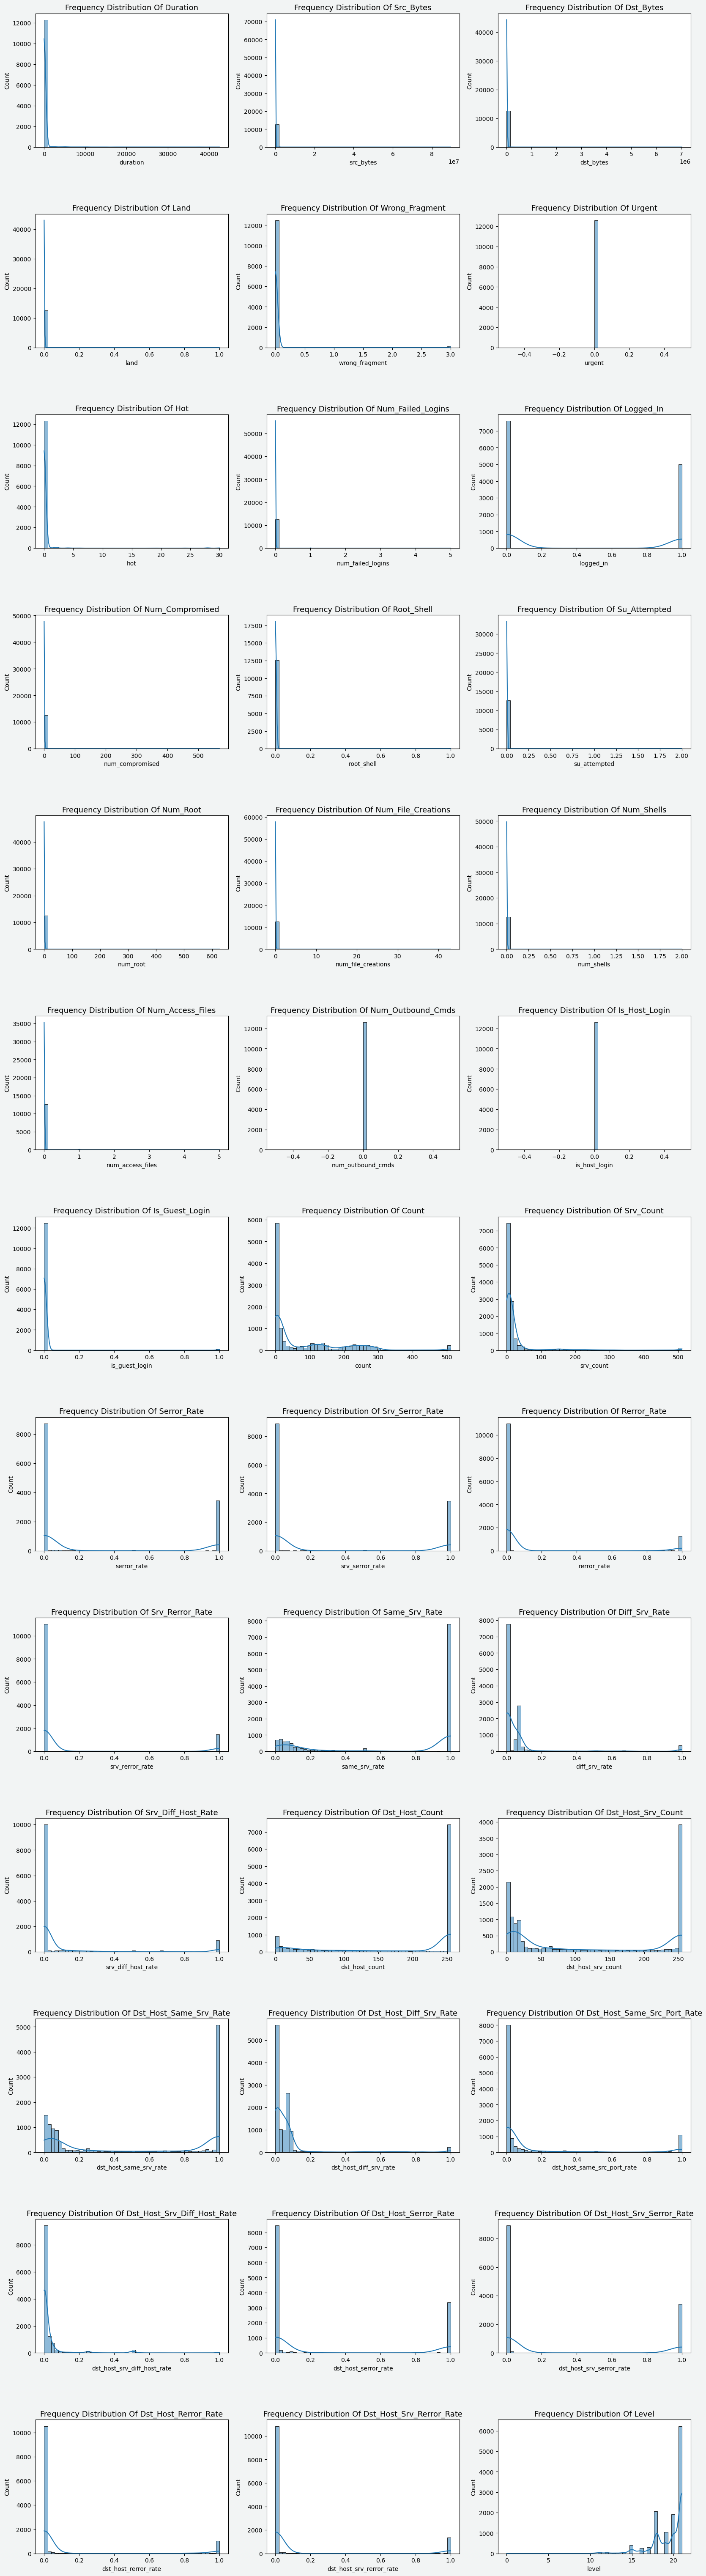

In [13]:
subsampled_data = train[numerical_features].sample(frac=0.1, random_state=42)

num_rows = (len(numerical_features) + 2) // 3  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6), facecolor='#F2F4F4')
fig.subplots_adjust(wspace=0.2, hspace=0.5)

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    h = sns.histplot(x=feature, kde=True, data=subsampled_data, bins=50, ax=axes[i])
    h.set_title(('Frequency Distribution of ' + feature).title(), fontsize=13)

if len(numerical_features) % 3 != 0:
    for i in range(len(numerical_features), num_rows * num_cols):
        fig.delaxes(axes[i])

plt.show()

#### Categorical features

We identify categorical features and assign them to `categorical_features` variable.

In [14]:
categorical_features = [col for col in train.columns if train[col].dtype == "object" and col != 'xAttack']
print(categorical_features)

['protocol_type', 'service', 'flag']


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">
    
- Our data contains only 3 categorical features

In [15]:
cat = train[categorical_features]
cat.head()

protocol_type   service flag
0           tcp  ftp_data   SF
1           udp     other   SF
2           tcp   private   S0
3           tcp      http   SF
4           tcp      http   SF

We will then use count plots to understand the distribution of categorical data.

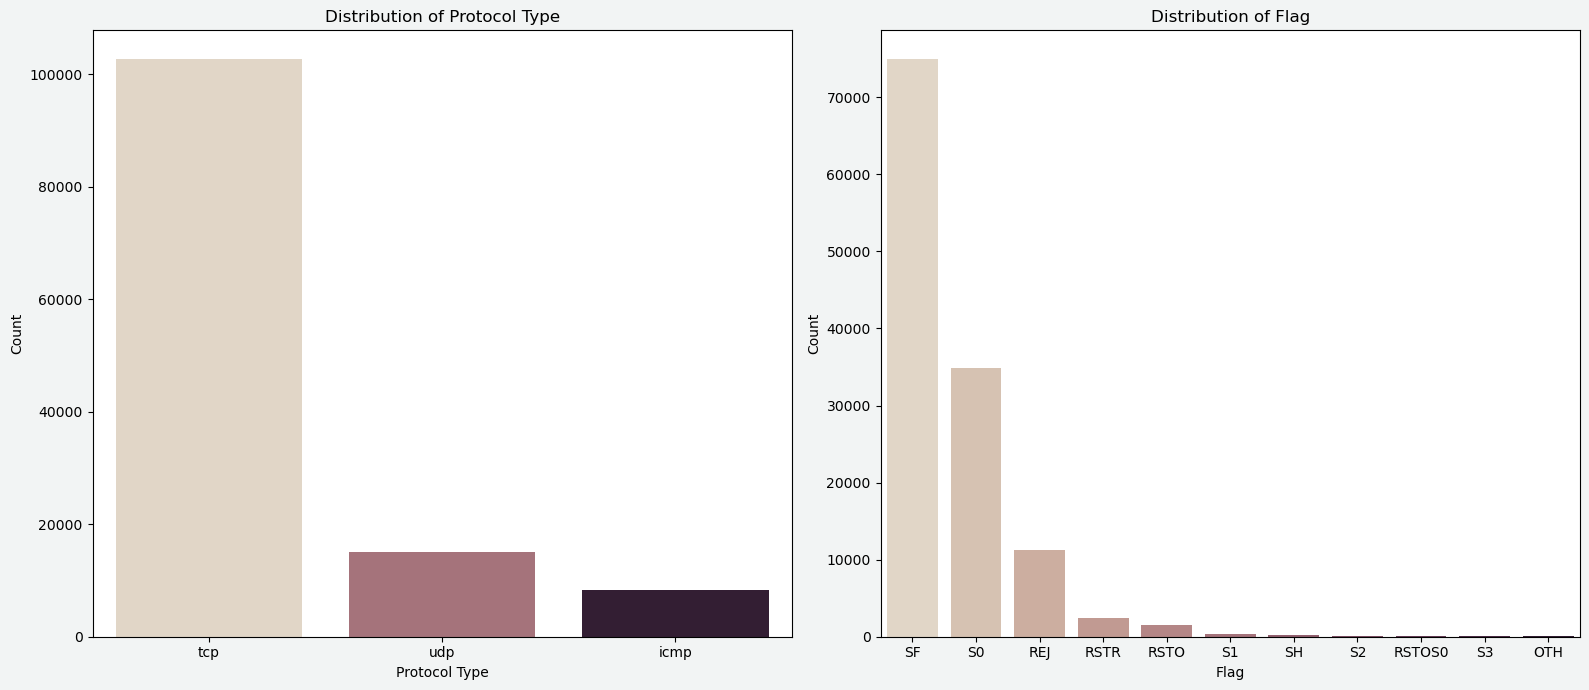

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7), facecolor='#F2F4F4')

sns.countplot(x='protocol_type', data=train, order=train['protocol_type'].value_counts().index, ax=axes[0], palette='ch:.25')
axes[0].set_title('Distribution of Protocol Type', fontsize=12)
axes[0].set_xlabel('Protocol Type')
axes[0].set_ylabel('Count')

sns.countplot(x='flag', data=train, order=train['flag'].value_counts().index, ax=axes[1], palette='ch:.25')
axes[1].set_title('Distribution of Flag', fontsize=12)
axes[1].set_xlabel('Flag')
axes[1].set_ylabel('Count')

plt.tight_layout()

plt.show()


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">
    
- We can see that the tcp value is taking over in the protocole type value (surpassing 10000).
- The SF value is also taking over in flag variable.

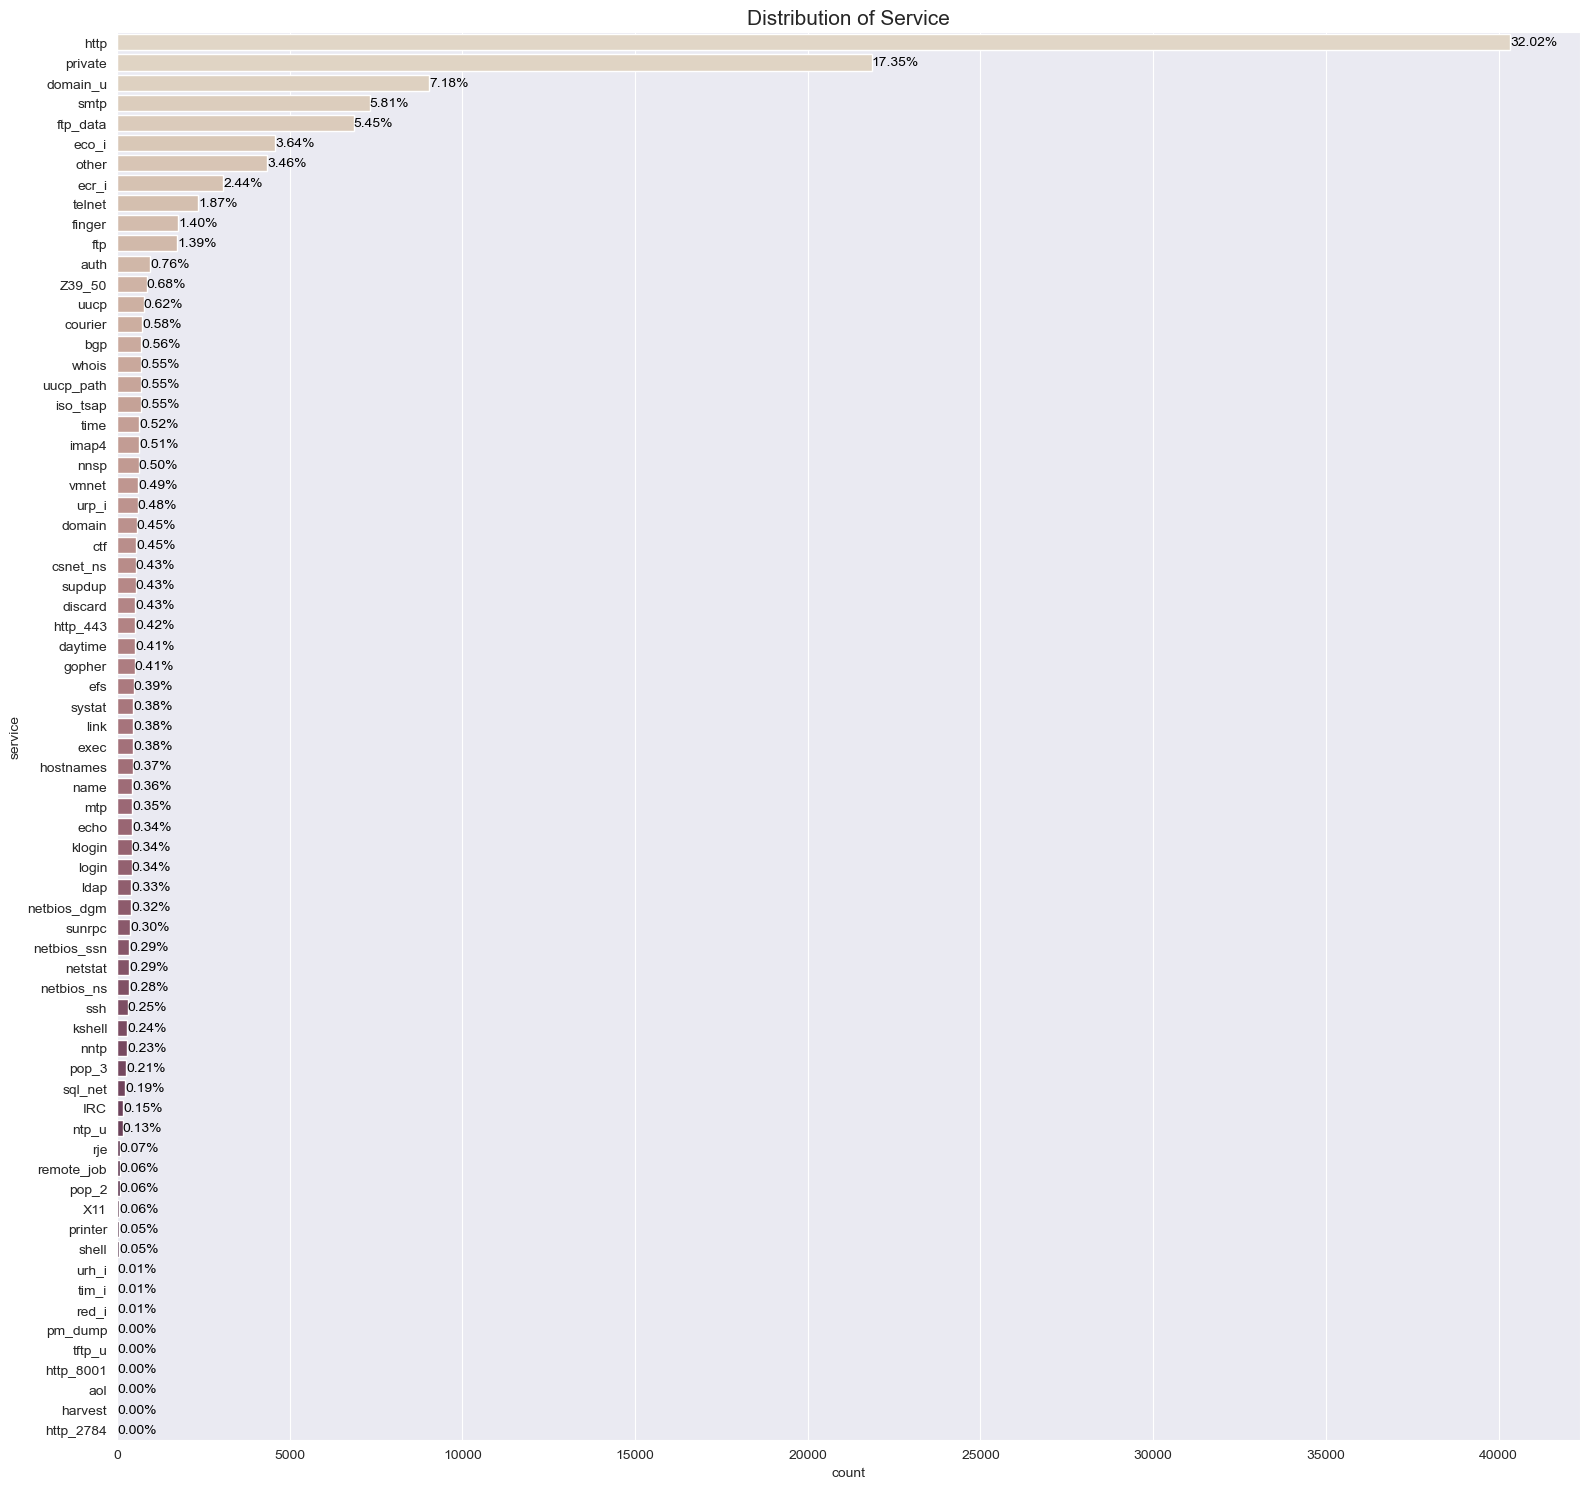

In [17]:
plt.figure(figsize=(16, 15))
sns.set_style('darkgrid')

ax = sns.countplot(y='service', data=train, order=train['service'].value_counts().index, palette='ch:.25')

total = len(train['service'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, color='black')

plt.title('Distribution of Service', fontsize=15)
plt.tight_layout()

plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px">
    
- We can see 32.02 % of the service value are matching to http. Despite having 70 unique values, service variable seems having unbalanced distribution.

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Data preprocessing</p> 

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
In this step we have to analyze, filter, transform and encode data so that a machine learning algorithm can understand and work with the processed output.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Handling missing data</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
Missing values are a recurrent problem in real-world datasets because real-life data has physical and manual limitations.

We will identify missing values

In [18]:
missing_val_count_by_column = (train.isnull().sum())
columns_with_missing_values =  [col for col in train.columns
                     if train[col].isnull().any()]
columns_with_missing_values

[]

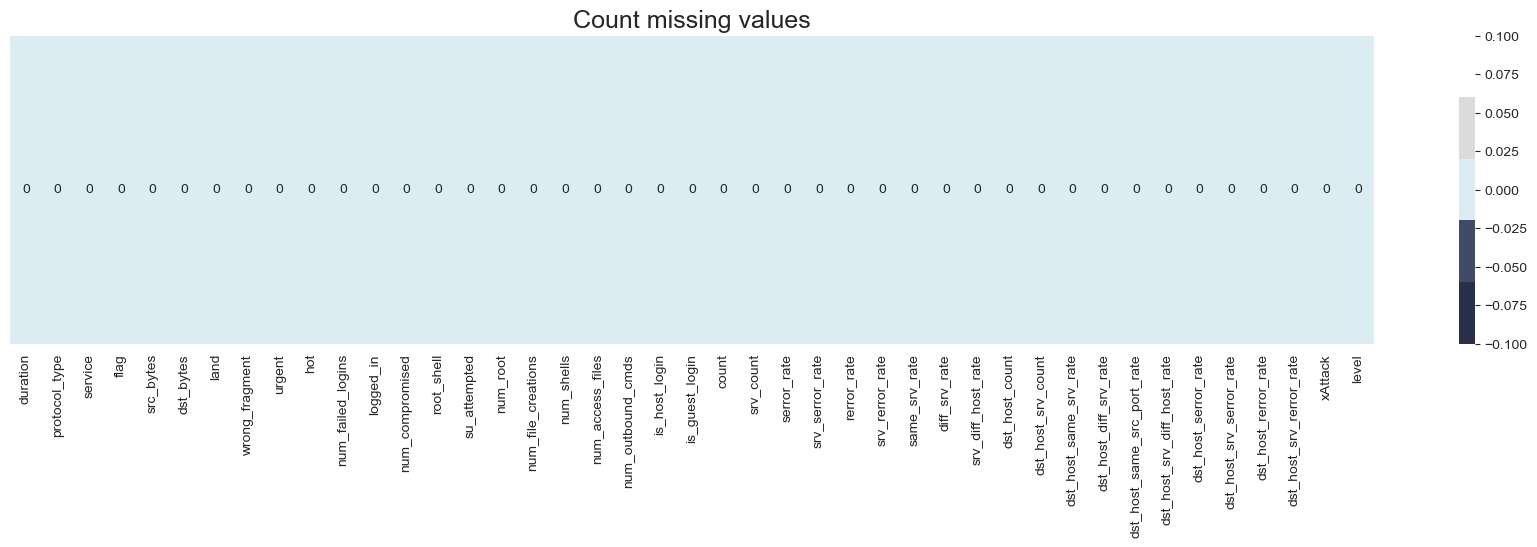

In [19]:
# Missing values
plt.figure(figsize=(22,4))
sns.heatmap((train.isna().sum()).to_frame(name='').T,cmap=sns.color_palette(["#283149", "#404B69", "#DBEDF3", "#DBDBDB", "#FFFFFF"]), annot=True,
             fmt='0.0f').set_title('Count missing values', fontsize=18)
plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Our training data is already cleaned and doesn't contain any missing values.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Duplicated Data</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
📌**Duplicate data** refers to the presence of identical records in a dataset, which can distort the analysis and lead to incorrect conclusions. Removing duplicates is crucial for accurate analysis and modeling.

We will check our duplicated data.

In [20]:
train.duplicated().sum()

0

In [21]:
test.duplicated().sum()

0

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Our training data doesn't contain any duplicated rows.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Exploring target "xAttack"</p>

In [ ]:
We will now explore our qualitative target "xAttack"

xAttack (label attribute) is classified into five categories 'normal', 'U2R', 'R2L', 'Probe', 'DoS'

we'll classify each of the attacks according to attack type for a more granular prediction model. 
* Denial of Service attacks (DoS):
  * apache2
  * back
  * land
  * neptune
  * mailbomb
  * pod
  * processtable
  * smurf
  * teardrop
  * udpstorm
  * worm
* Probe attacks (Probe):
  * ipsweep
  * mscan
  * nmap
  * portsweep
  * saint
  * satan
* Privilege escalation attacks (U2R)
  * buffer_overflow
  * loadmdoule
  * perl
  * ps
  * rootkit
  * sqlattack
  * xterm
* Remote access attacks (R2L)
  * ftp_write
  * guess_passwd
  * http_tunnel
  * imap
  * multihop
  * named
  * phf
  * sendmail
  * snmpgetattack
  * snmpguess
  * spy
  * warezclient
  * warezmaster
  * xclock
  * xsnoop

Changing xAttack values to their respective attack class just to see the distribution of the attack families we just mentioned.

In [22]:
attack_mapping = {
    'neptune': 'DoS', 'back':'DoS', 'land': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS', 'mailbomb': 'DoS', 'apache2': 'DoS',
    'processtable': 'DoS', 'udpstorm': 'DoS', 'worm': 'DoS',
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R', 'ps': 'U2R', 'sqlattack': 'U2R', 'xterm': 'U2R',
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'multihop': 'R2L', 'phf': 'R2L', 'spy': 'R2L', 'warezclient': 'R2L',
    'warezmaster': 'R2L', 'sendmail': 'R2L', 'named': 'R2L', 'snmpgetattack': 'R2L', 'snmpguess': 'R2L', 'xlock': 'R2L', 'xsnoop': 'R2L',
    'httptunnel': 'R2L',
    'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'satan': 'Probe', 'mscan': 'Probe', 'saint': 'Probe'
}
train['xAttack'] = train['xAttack'].replace(attack_mapping)
test['xAttack'] = test['xAttack'].replace(attack_mapping)
train.head()

duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

   xAttack  level  
0   normal     20  
1   normal     15  
2      DoS     19  
3   normal     21  
4   normal     21  

[5 rows x 43 columns]

We will checking the distribution of attack families.

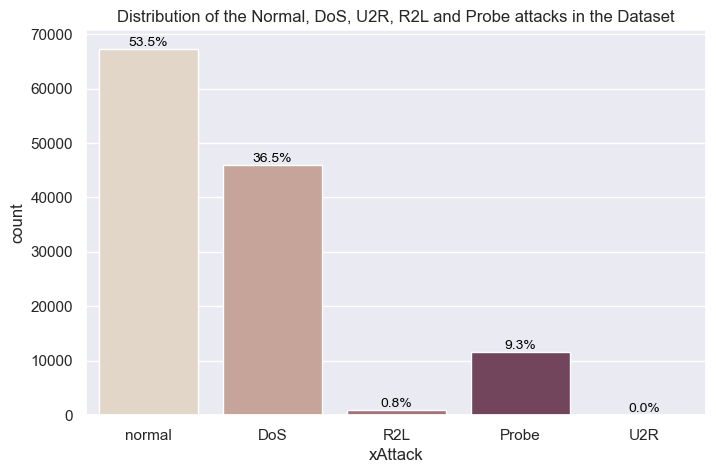

In [23]:
sns.set(style="darkgrid")
colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='xAttack', data=train, palette='ch:.25')

total = len(train['xAttack'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Distribution of the Normal, DoS, U2R, R2L and Probe attacks in the Dataset')
plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- We see that the normal attacks values are taking more than 50% while all the attack families are taking less.
- If we take a look at the chart we'll se that U2R family doesn't exit in our dataset.

We will Check the cardinality of the categorical features

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
Cardinality refers to the number of different values in a variable. As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.

In [24]:
object_nunique = list(map(lambda col: train[col].nunique(), categorical_features))
d = dict(zip(categorical_features, object_nunique))

sorted(d.items(), key=lambda x: x[1])

[('protocol_type', 3), ('flag', 11), ('service', 70)]

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- service has a very high cardinality. It should be dealt with or either removed.

Based on the high or low cardinality of our categorical features, we will apply later on hot encoding on those with low cardinality. <br>
- Low cardinality: < 10 
- High cardinality: > 10

In [25]:
low_cardinality_cols = [col for col in categorical_features if train[col].nunique() < 10]

high_cardinality_cols = list(set(categorical_features)-set(low_cardinality_cols))
print("Low cardinality columns:", low_cardinality_cols)
print("High cardinality columns:",high_cardinality_cols)

Low cardinality columns: ['protocol_type']
High cardinality columns: ['service', 'flag']


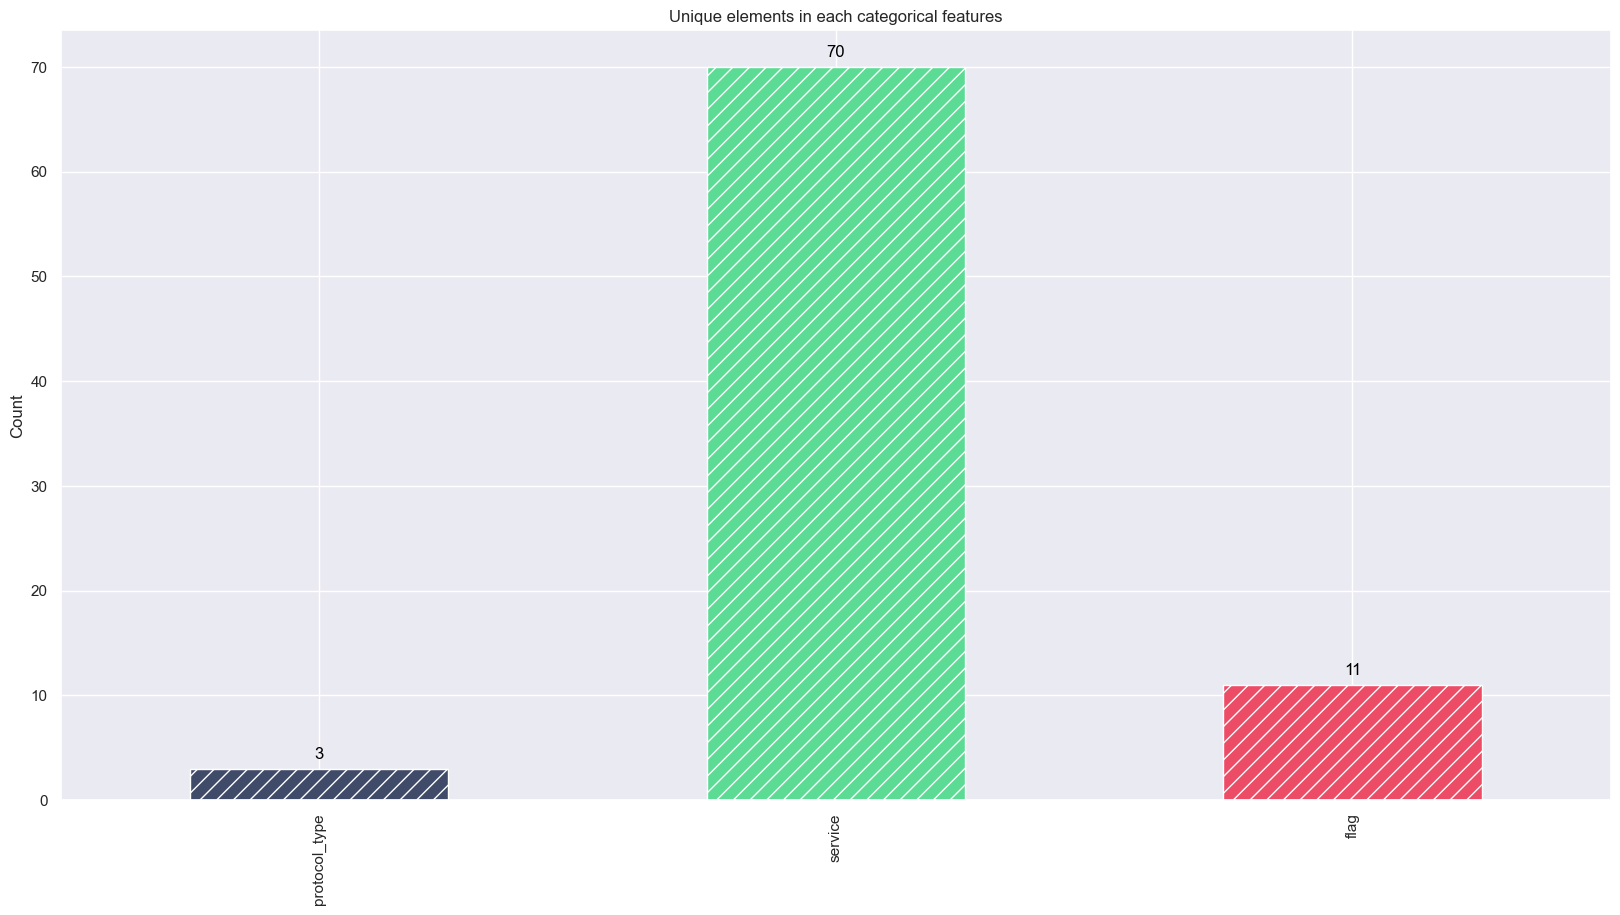

In [26]:
unique = train[categorical_features].nunique()
plt.figure(figsize=(20, 10))
unique.plot(kind='bar', color=['#404B69', '#5CDB95', '#ED4C67', '#F7DC6F'], hatch='//')
plt.title('Unique elements in each categorical features')
plt.ylabel('Count')
for i, v in enumerate(unique.values):
    plt.text(i, v+1, str(v), color='black', ha='center')
plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Another histogram that explains the higher number of unique values service variable has.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Univariate analysis</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
In every technique which comes under the hood of **Univariate Selection**, every feature is individually studied and the relationship it shares with the target variable is taken into account.

We will see at first the distribution of the numerical values data using mean, median, Q1 and Q3.

In [ ]:
# Check variables distribution
subsampled_data = train[numerical_features].sample(frac=0.1, random_state=42)

num_rows = (len(numerical_features) + 2) // 3  # Adjust the number of columns as needed
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(26, num_rows * 6))

# Define colors to use for each feature
colors = ["#283149"]

# Loop through each column and plot distribution
for i, column in enumerate(numerical_features):
    # Plot histogram with density curve
    sns.histplot(x=column, data=subsampled_data, color=colors[i%1], ax=axes[i//2, i%2], kde=True)
    
    # Add vertical lines for mean, median, Q1 and Q3
    axes[i//2, i%2].axvline(x=train[column].median(), color='#e33434', linestyle='--', linewidth=2, label='Median')
    axes[i//2, i%2].axvline(x=train[column].quantile(0.25), color='orange', linestyle='--', linewidth=2, label='Q1')
    axes[i//2, i%2].axvline(x=train[column].quantile(0.75), color='#177ab0', linestyle='--', linewidth=2, label='Q3')
    
    # Add text box with important statistics
    median = train[column].median()
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)
    iqr = q3 - q1
    axes[i//2, i%2].text(0.95, 0.95, 
                          'Mean: {:.2f}\nMedian: {:.2f}\nQ1: {:.2f}\nQ3: {:.2f}\nIQR: {:.2f}\nMin: {:.2f}\nMax: {:.2f}'.format(
                              train[column].mean(), median, q1, q3, iqr, train[column].min(), train[column].max()),
                          transform=axes[i//2, i%2].transAxes,
                          fontsize=10, va='top', ha='right')
    
    # Add legend
    axes[i//2, i%2].legend(loc = "upper left")
    
    # Set title of subplot
    axes[i//2, i%2].set_title('Distribution of '+ column)

# Remove any empty subplots if the number of features is not a multiple of 3
if len(numerical_features) % 3 != 0:
    for i in range(len(numerical_features), num_rows * num_cols):
        fig.delaxes(axes[i])
        
# Add overall title and adjust spacing
fig.suptitle('Distribution of Numerical Variables', fontsize=16)
fig.tight_layout()

We have to seperate categorical features from the training and test datasets to perform univariate selection methods.

In [27]:
train_data_without_categorical_features = train.drop(categorical_features, axis=1)
test_data_without_categorical_features = test.drop(categorical_features, axis=1)

In [28]:
X_univariate_train = train_data_without_categorical_features.drop('xAttack', axis=1)
X_univariate_test = test_data_without_categorical_features.drop('xAttack', axis=1)

In [29]:
y_univariate_train = train['xAttack']
y_univariate_test = test['xAttack']

### Variance

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
**Variance** is the measure of change in a given feature. For example, if all the samples in a feature have the same values, it would mean that the variance of that feature is zero. It’s essential to understand that a column which doesn’t have enough variance is as good as a column with all ‘nan’ or missing values. If there’s no change in the feature, it’s impossible to derive any pattern from it. So, we check the variance and eliminate any feature that shows low or no variation.

Variance thresholds might be a good way to eliminate features in datasets, but in cases where there are minority classes (say, 5% 0s and 95% 1s), even good features can have very low variance and still end up being very strong predictors. So, be advised – keep the target ratio in mind and use correlation methods before eliminating features solely based on variance.

#### Variance Thresholding
- Calculate the variance of each feature.
- Features with very low variance may not provide much information and can be dropped.

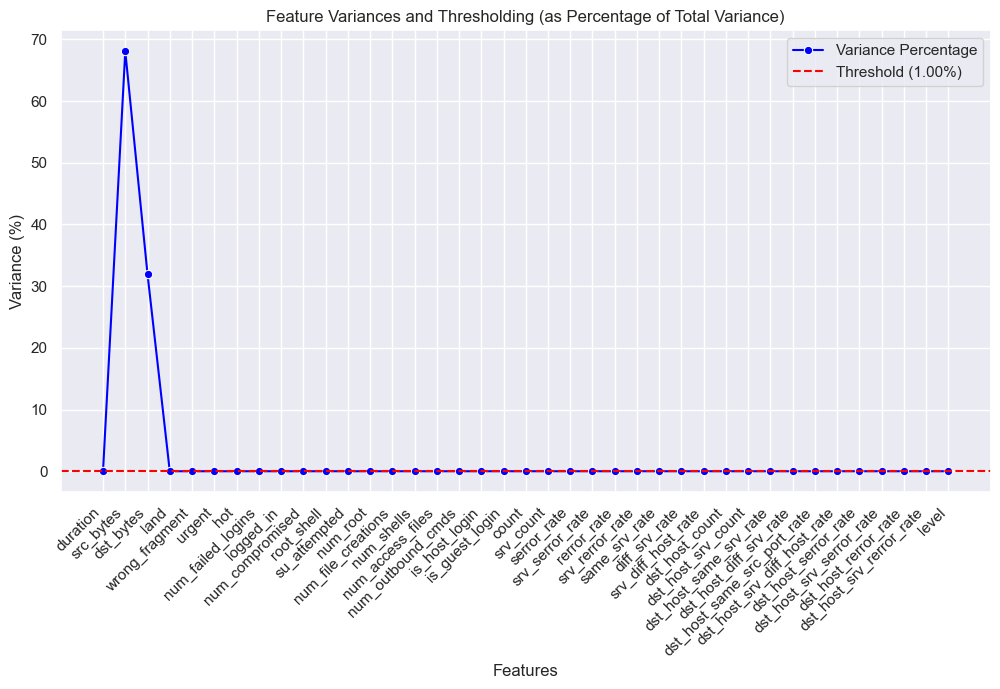

Columns that can be dropped based on variance threshold: Index(['land', 'urgent', 'num_failed_logins', 'root_shell', 'su_attempted',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login'],
      dtype='object')


In [32]:
threshold_value = 0.01
selector = VarianceThreshold(threshold=threshold_value)
selector.fit(X_univariate_train)

feature_variances = selector.variances_

total_variance = sum(feature_variances)
feature_variances_percentage = (feature_variances / total_variance) * 100

# Create a line plot for the feature variances using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=X_univariate_train.columns, y=feature_variances_percentage, marker='o', color='blue', label='Variance Percentage', linestyle='-')

plt.axhline(y=threshold_value / total_variance * 100, color='red', linestyle='--', label=f'Threshold ({threshold_value * 100:.2f}%)')
plt.xlabel('Features')
plt.ylabel('Variance (%)')
plt.title('Feature Variances and Thresholding (as Percentage of Total Variance)')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

# Identify columns to drop based on variance threshold
columns_to_drop_variance = X_univariate_train.columns[~selector.get_support()]
print("Columns that can be dropped based on variance threshold:", columns_to_drop_variance)

### Correlation

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
Correlation is a univariate analysis technique. It detects linear relationships between two variables. Think of correlation as a measure of proportionality, which simply measures how the increase or decrease of a variable affects the other variable.

#### Finding Correlation among Features

Correlation Heatmap

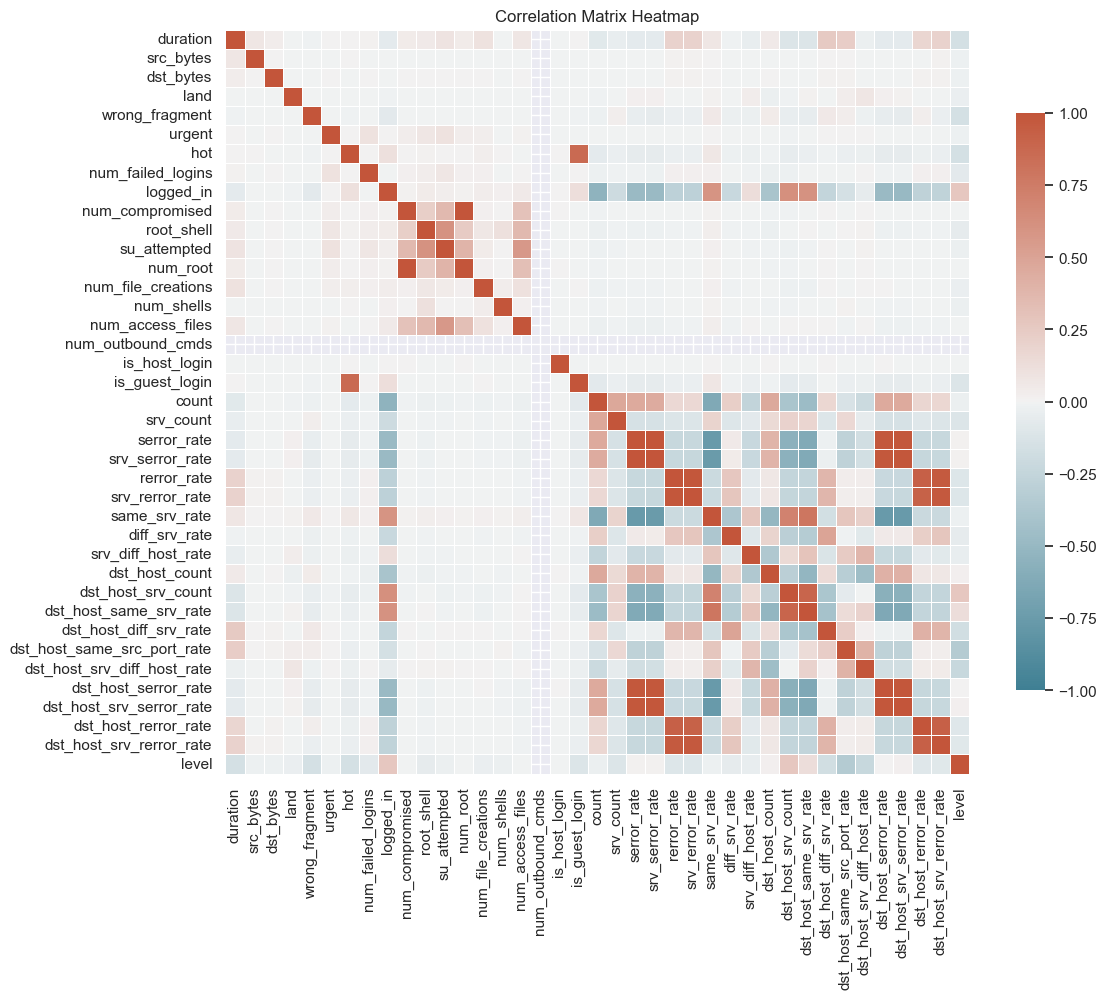

In [33]:
corr = X_univariate_train.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Create a custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75})

plt.title('Correlation Matrix Heatmap')
plt.show()

#### Correlation Analysis:
- Calculate the correlation matrix for our features.
- Identify pairs of highly correlated features.
- If two features are highly correlated, you might consider keeping only one of them.

In [34]:
# Correlation Analysis
correlation_matrix = X_univariate_train.corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
columns_to_drop_correlation = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
print("Columns that can be dropped using correlation:",columns_to_drop_correlation)

Columns that can be dropped using correlation: ['num_root', 'srv_serror_rate', 'srv_rerror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


### Chi-Square

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
**Chi-square** is a statistical tool, or test, which can be used on groups of categorical features to evaluate the likelihood of association, or correlation, with the help of frequency distributions.

We will define the top features of our training dataset.

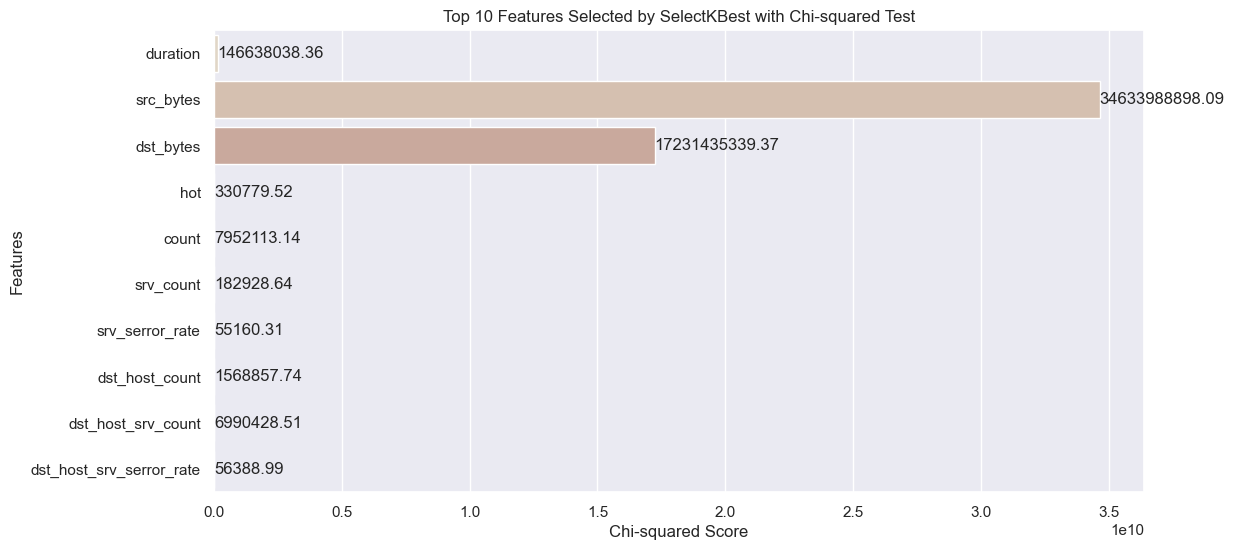

In [35]:
selector = SelectKBest(chi2, k=10)

# Fit the selector to the features and target variable
selector.fit(X_univariate_train, y_univariate_train)

# Get the selected features
selected_features = X_univariate_train.columns[selector.get_support(indices=True)]
feature_scores = selector.scores_[selector.get_support(indices=True)]

# Create a horizontal bar plot with color gradient using Seaborn
plt.figure(figsize=(12, 6))
bar_colors = sns.color_palette("ch:.25", n_colors=len(selected_features))  # Color gradient based on scores
sns.barplot(x=feature_scores, y=selected_features, palette=bar_colors)

# Add score values on top of each bar
for idx, score in enumerate(feature_scores):
    plt.text(score + 0.02, idx, f'{score:.2f}', ha='left', va='center')

plt.xlabel('Chi-squared Score')
plt.ylabel('Features')
plt.title('Top 10 Features Selected by SelectKBest with Chi-squared Test')
plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- We can see that src_bytes and dst_bytes are averaging higher chi2 score than the other features. We will consider their importance.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Bivariate analysis</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
**Bivariate analysis** refers to the statistical analysis or examination of the relationship between two variables. It involves studying how changes in one variable are associated with changes in another variable. The primary goal of bivariate analysis is to understand the correlation, association, or interaction between two distinct sets of data or measurements.

We will examine the relationship between two variables at the time and we will focus especially on the target variable.

Firstly, we will user scatter plots to plot the relation between "xAttack" and the rest of the features to try find the define the most important features to the target.

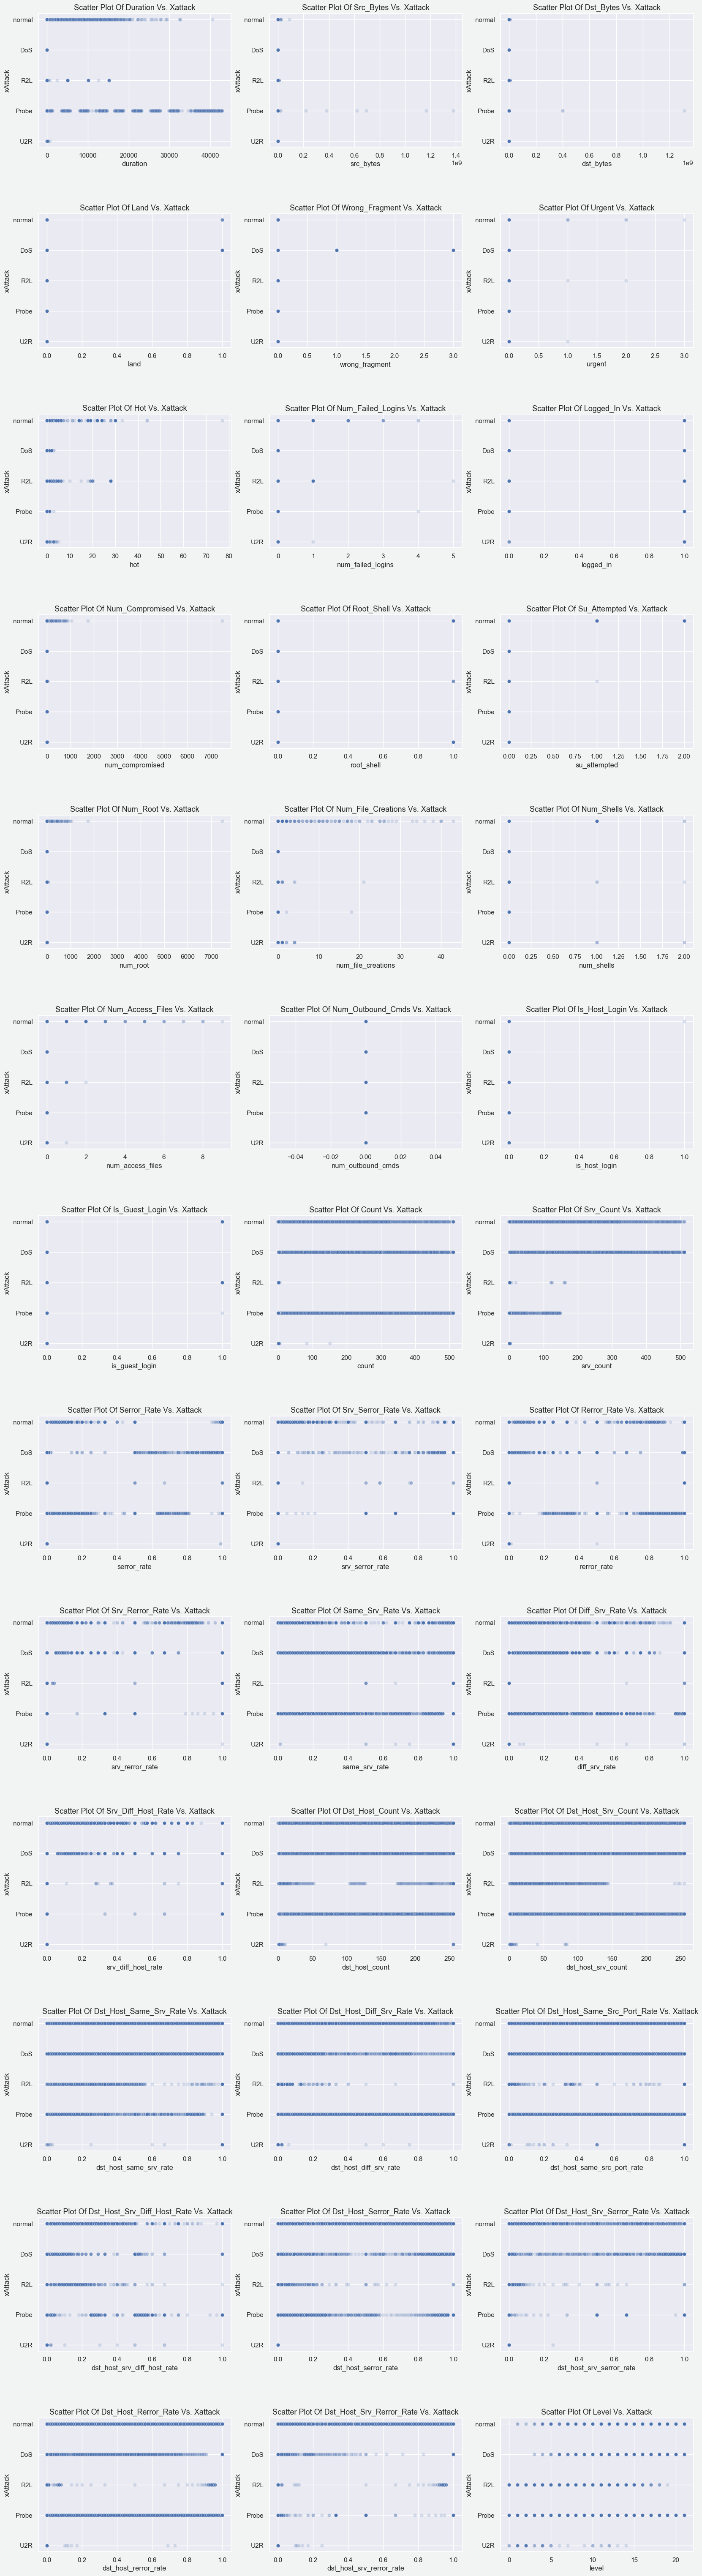

In [36]:
num_rows = (len(numerical_features) + 2) // 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6), facecolor='#F2F4F4')
fig.subplots_adjust(wspace=0.2, hspace=0.5)

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    s = sns.scatterplot(x=feature, y='xAttack', data=train, ax=axes[i], alpha=0.2)
    s.set_title(('Scatter Plot of ' + feature + ' vs. xAttack').title(), fontsize=13)

if len(numerical_features) % 3 != 0:
    for i in range(len(numerical_features), num_rows * num_cols):
        fig.delaxes(axes[i])

plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- We can see that many features including src_bytes and dst_bytes doesn't have an impact on our target despite them having a high importance.
- Many features are vulnerable to the target as we can the more scatter points are distrbuted, the more they form a line together.

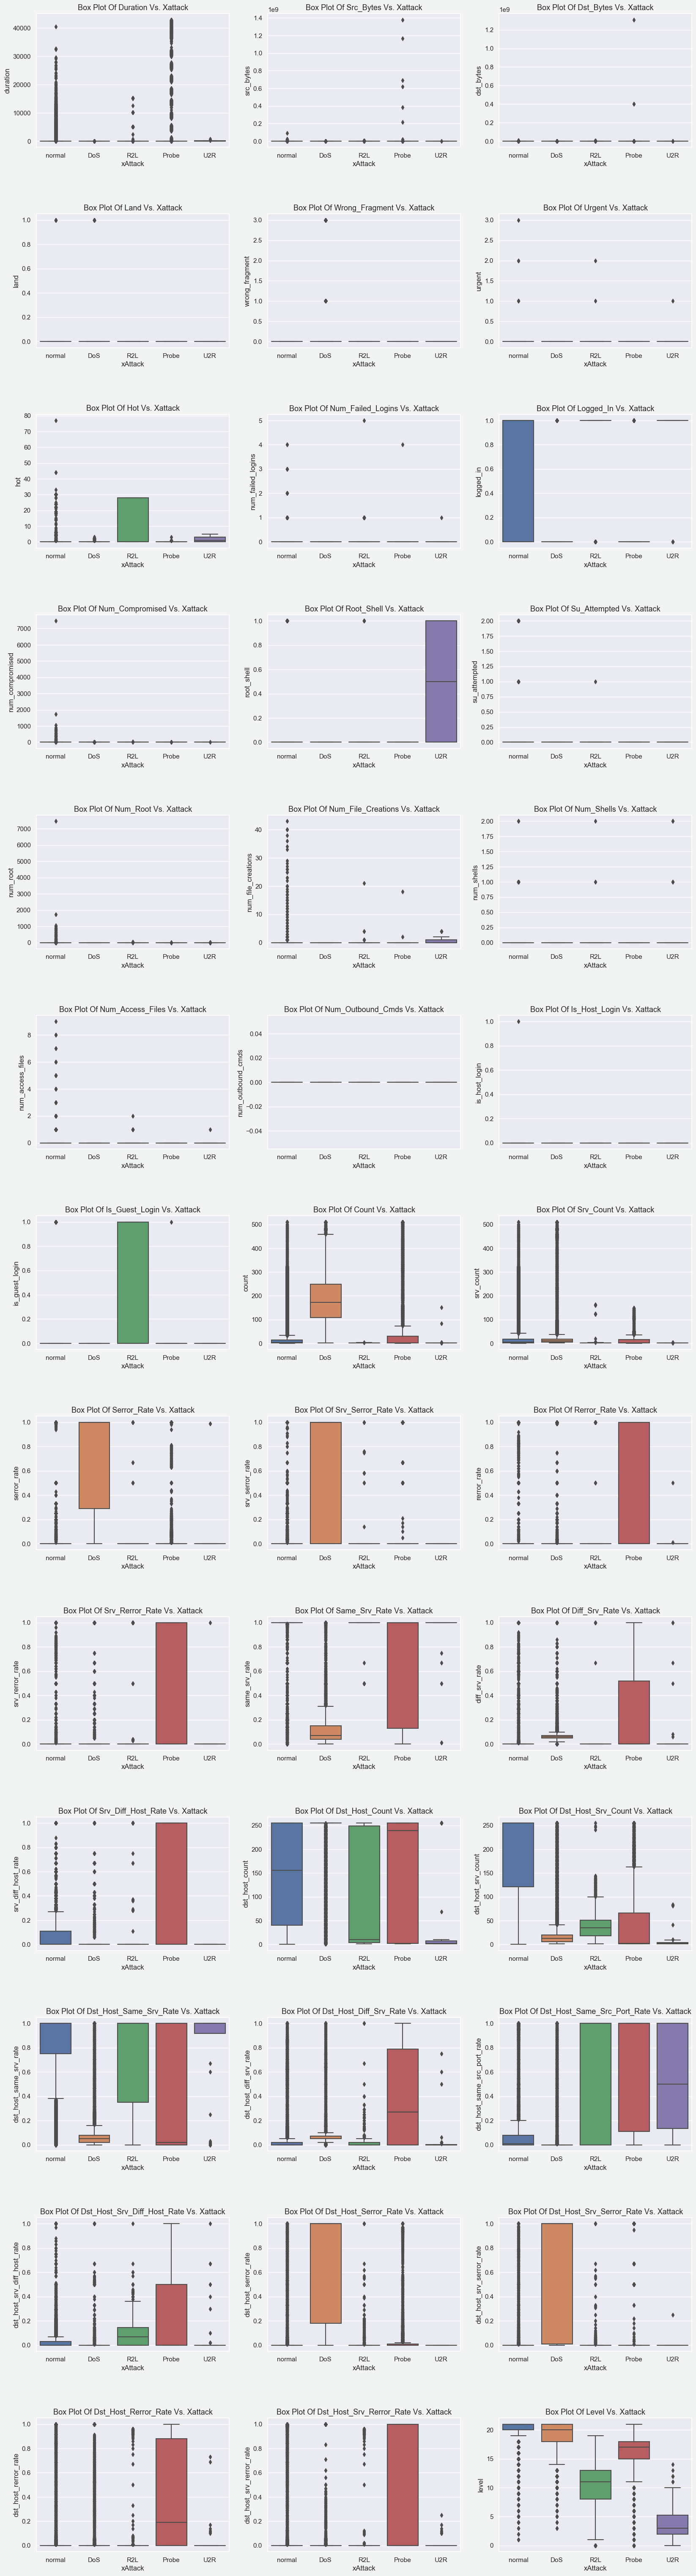

In [37]:
num_rows = (len(numerical_features) + 2) // 3
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6), facecolor='#F2F4F4')
fig.subplots_adjust(wspace=0.2, hspace=0.5)

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    b = sns.boxplot(x='xAttack', y=feature, data=train, ax=axes[i])
    b.set_title(('Box Plot of ' + feature + ' vs. xAttack').title(), fontsize=13)

if len(numerical_features) % 3 != 0:
    for i in range(len(numerical_features), num_rows * num_cols):
        fig.delaxes(axes[i])

plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Boxplots basically give the insights as the scatter plots but in a different way. If we have to compare plot by plot, we can see many similatries between the two types of plots
- We used the boxplots to confirm our feature selection especially those who are vulnerable we detected using scatter plots.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Multivariate analysis</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
**Multivariate analysis** involves the simultaneous examination and analysis of relationships among multiple variables. Unlike bivariate analysis, which focuses on the relationship between two variables, multivariate analysis considers three or more variables to understand complex patterns and interactions among them.
    
Also referred to as Wrapper methods, multivariate selection techniques take a group of features at a time and test the group’s competence in predicting the target variable.

In [38]:
X_multivariate_train = train_data_without_categorical_features.drop('xAttack', axis=1)
X_multivariate_test = test_data_without_categorical_features.drop('xAttack', axis=1)

We will explore the relationships between numerical features using a pair plot.

We'll be using only 5 random features because 38 numerical features will take a lot of time to compile.

C:\Users\hamdi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


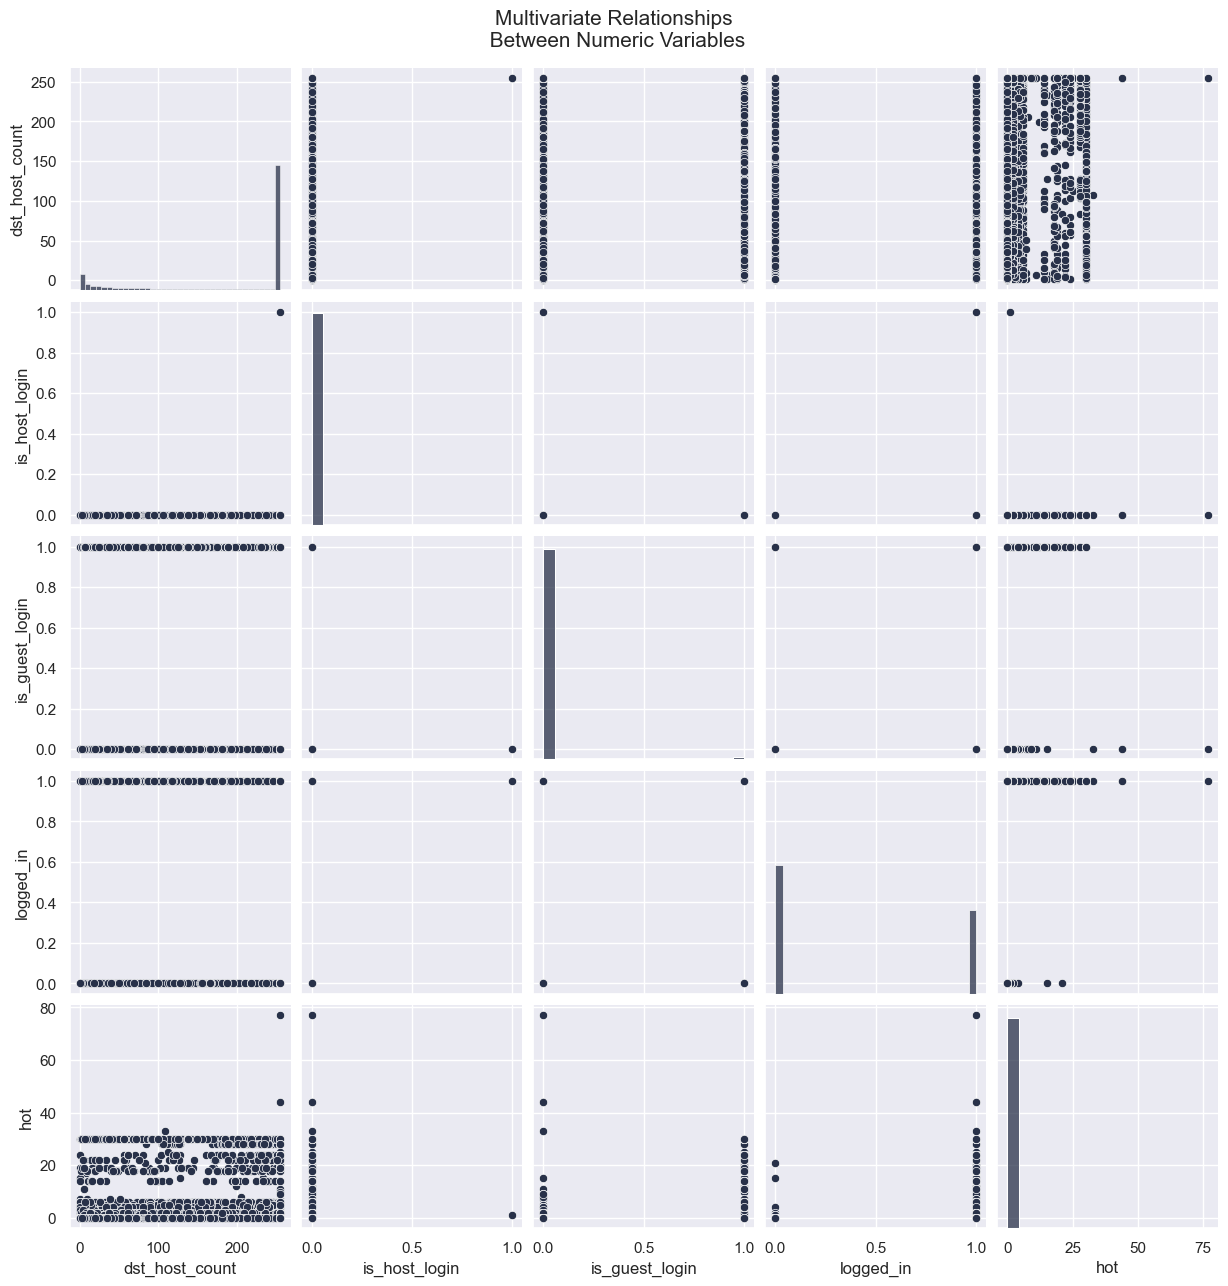

In [815]:
selected_features = X_multivariate_train.sample(5, axis=1)

colors = ["#283149", "#404B69", "#DBEDF3"]
sns.set(style='darkgrid', palette=colors)

sns.pairplot(selected_features)
plt.suptitle('Multivariate Relationships\n Between Numeric Variables', y=1.03, fontsize=15)
plt.show()

### Importance of features using Wrapper Method

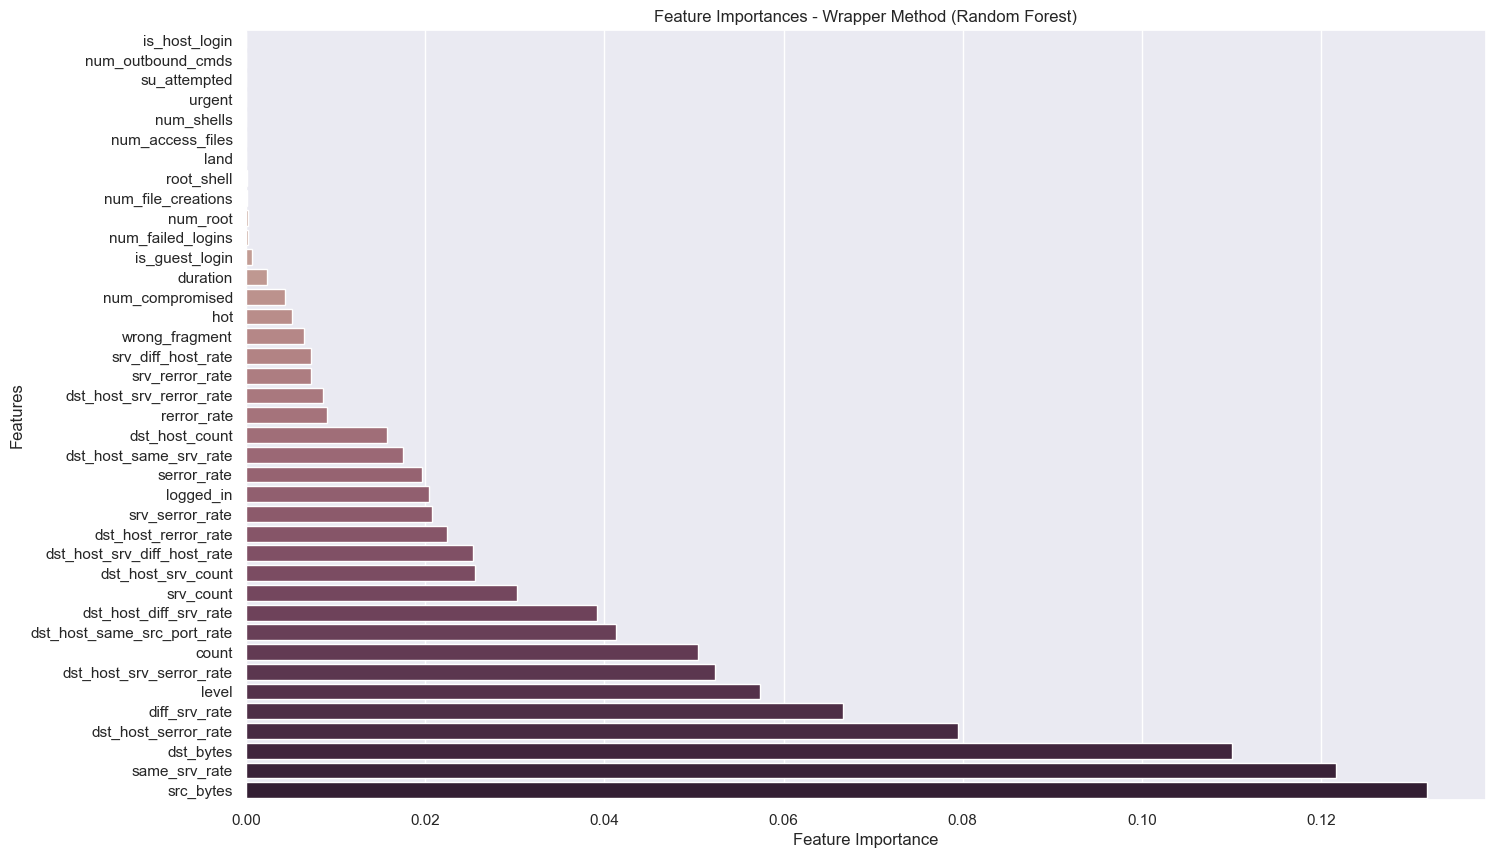

In [39]:
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(X_univariate_train, y_univariate_train)

support = selector.get_support()
features = X_univariate_train.loc[:, support].columns.tolist()

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_univariate_train, y_univariate_train)

feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(16, 10))
sns.set_style('darkgrid')
sns.barplot(x=feature_importances[sorted_idx], y=X_univariate_train.columns[sorted_idx], palette='ch:.25')
plt.title('Feature Importances - Wrapper Method (Random Forest)')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- If we compare this feature importance method to the chi-square method, we will find basically the same important features.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Column dropping</p>

### High cardinality features (flag and service)

We will drop columns with high cardinality

In [40]:
filtered_data = train.drop('xAttack', axis=1)

In [41]:
filtered_data = filtered_data.drop(high_cardinality_cols,axis=1)

duration protocol_type  src_bytes  dst_bytes  land  wrong_fragment  urgent  \
0         0           tcp        491          0     0               0       0   
1         0           udp        146          0     0               0       0   
2         0           tcp          0          0     0               0       0   
3         0           tcp        232       8153     0               0       0   
4         0           tcp        199        420     0               0       0   

   hot  num_failed_logins  logged_in  ...  dst_host_srv_count  \
0    0                  0          0  ...                  25   
1    0                  0          0  ...                   1   
2    0                  0          0  ...                  26   
3    0                  0          1  ...                 255   
4    0                  0          1  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   dst_host_srv_rerror_rate  level  
0                      0.00     20  
1                      0.00     15  
2                      0.00     19  
3                      0.01     21  
4                      0.00     21  

[5 rows x 40 columns]

In [42]:
test_filtered_data = test.drop('xAttack', axis=1)

In [43]:
test_filtered_data = test_filtered_data.drop(high_cardinality_cols,axis=1)

duration protocol_type  src_bytes  dst_bytes  land  wrong_fragment  urgent  \
0         0           tcp          0          0     0               0       0   
1         0           tcp          0          0     0               0       0   
2         2           tcp      12983          0     0               0       0   
3         0          icmp         20          0     0               0       0   
4         1           tcp          0         15     0               0       0   

   hot  num_failed_logins  logged_in  ...  dst_host_srv_count  \
0    0                  0          0  ...                  10   
1    0                  0          0  ...                   1   
2    0                  0          0  ...                  86   
3    0                  0          0  ...                  57   
4    0                  0          0  ...                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
3                    1.00                    0.00   
4                    0.31                    0.17   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
3                         1.00                         0.28   
4                         0.03                         0.02   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.0                       0.0                  1.00   
1                   0.0                       0.0                  1.00   
2                   0.0                       0.0                  0.00   
3                   0.0                       0.0                  0.00   
4                   0.0                       0.0                  0.83   

   dst_host_srv_rerror_rate  level  
0                      1.00     21  
1                      1.00     21  
2                      0.00     21  
3                      0.00     15  
4                      0.71     11  

[5 rows x 40 columns]

### Content-related features

Based on all the methods we used to identify columns to remove including variance thresholding, correlation and wrapper importances, we've decided to drop content-related features which the router should not be able to reach. Almost all of them where mentioned by the univariaye methods we've used.

In [44]:
content_related_columns_to_drop = ['src_bytes','dst_bytes','urgent','num_failed_logins','num_compromised','root_shell'
    ,'su_attempted','num_root','num_file_creations','num_shells','num_access_files','is_host_login','is_guest_login'
    ,'num_outbound_cmds','wrong_fragment']

In [45]:
filtered_data = filtered_data.drop(content_related_columns_to_drop, axis=1)

(125973, 25)

In [46]:
filtered_data = filtered_data[filtered_data['protocol_type'] == 'tcp']
filtered_data.head()

duration protocol_type  land  hot  logged_in  count  srv_count  \
0         0           tcp     0    0          0      2          2   
2         0           tcp     0    0          0    123          6   
3         0           tcp     0    0          1      5          5   
4         0           tcp     0    0          1     30         32   
5         0           tcp     0    0          0    121         19   

   serror_rate  srv_serror_rate  rerror_rate  ...  dst_host_srv_count  \
0          0.0              0.0          0.0  ...                  25   
2          1.0              1.0          0.0  ...                  26   
3          0.2              0.2          0.0  ...                 255   
4          0.0              0.0          0.0  ...                 255   
5          0.0              0.0          1.0  ...                  19   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   
5                    0.07                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   
5                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   
5                  0.00                      0.00                  1.00   

   dst_host_srv_rerror_rate  level  
0                      0.00     20  
2                      0.00     19  
3                      0.01     21  
4                      0.00     21  
5                      1.00     21  

[5 rows x 25 columns]

In [47]:
test_filtered_data = test_filtered_data.drop(content_related_columns_to_drop, axis=1)

test_filtered_data.shape

(22544, 25)

In [48]:
test_filtered_data = test_filtered_data[test_filtered_data['protocol_type'] == 'tcp']
test_filtered_data.head()

duration protocol_type  land  hot  logged_in  count  srv_count  \
0         0           tcp     0    0          0    229         10   
1         0           tcp     0    0          0    136          1   
2         2           tcp     0    0          0      1          1   
4         1           tcp     0    0          0      1          8   
5         0           tcp     0    0          1      4          4   

   serror_rate  srv_serror_rate  rerror_rate  ...  dst_host_srv_count  \
0          0.0             0.00          1.0  ...                  10   
1          0.0             0.00          1.0  ...                   1   
2          0.0             0.00          0.0  ...                  86   
4          0.0             0.12          1.0  ...                  86   
5          0.0             0.00          0.0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
4                    0.31                    0.17   
5                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
4                         0.03                         0.02   
5                         0.01                         0.03   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                       0.0                  1.00   
1                  0.00                       0.0                  1.00   
2                  0.00                       0.0                  0.00   
4                  0.00                       0.0                  0.83   
5                  0.01                       0.0                  0.00   

   dst_host_srv_rerror_rate  level  
0                      1.00     21  
1                      1.00     21  
2                      0.00     21  
4                      0.71     11  
5                      0.00     21  

[5 rows x 25 columns]

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Outliers</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
📌 Investigating **Outliers** is an essential step in data analysis because they can significantly affect the statistical measures used to describe a dataset. Outliers are observations that differ significantly from other observations in the same dataset and can result from measurement errors, sampling issues, or genuine differences in the population. Identifying and dealing with outliers can help to improve the accuracy and reliability of statistical models and results, leading to more informed decisions and better outcomes. Therefore, outlier investigation is a crucial step in any data analysis process.

Before we define outliers, we will need to drop protocol_type feature since it's a categorical feature.

In [49]:
filtered_data_numerical = filtered_data.drop(['protocol_type'], axis=1)
test_filtered_data_numerical = test_filtered_data.drop(['protocol_type'], axis=1)

Then, we us a boxplot to identify outliers within each column.

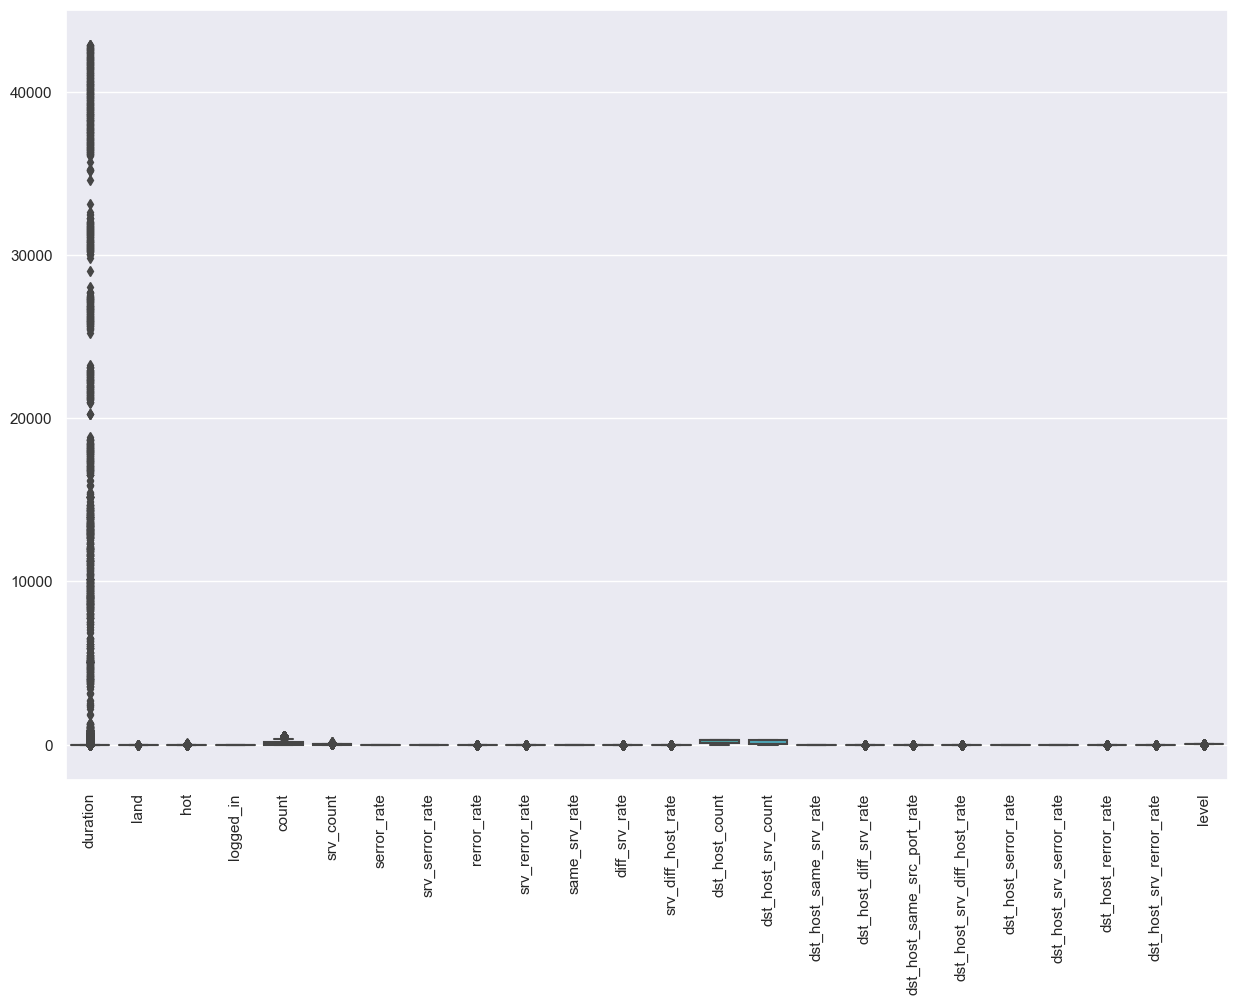

In [50]:
plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
sns.boxplot(data=filtered_data_numerical)
plt.xticks(rotation=90)
plt.show()

We also defined boxplots to define outliers seperately within each column

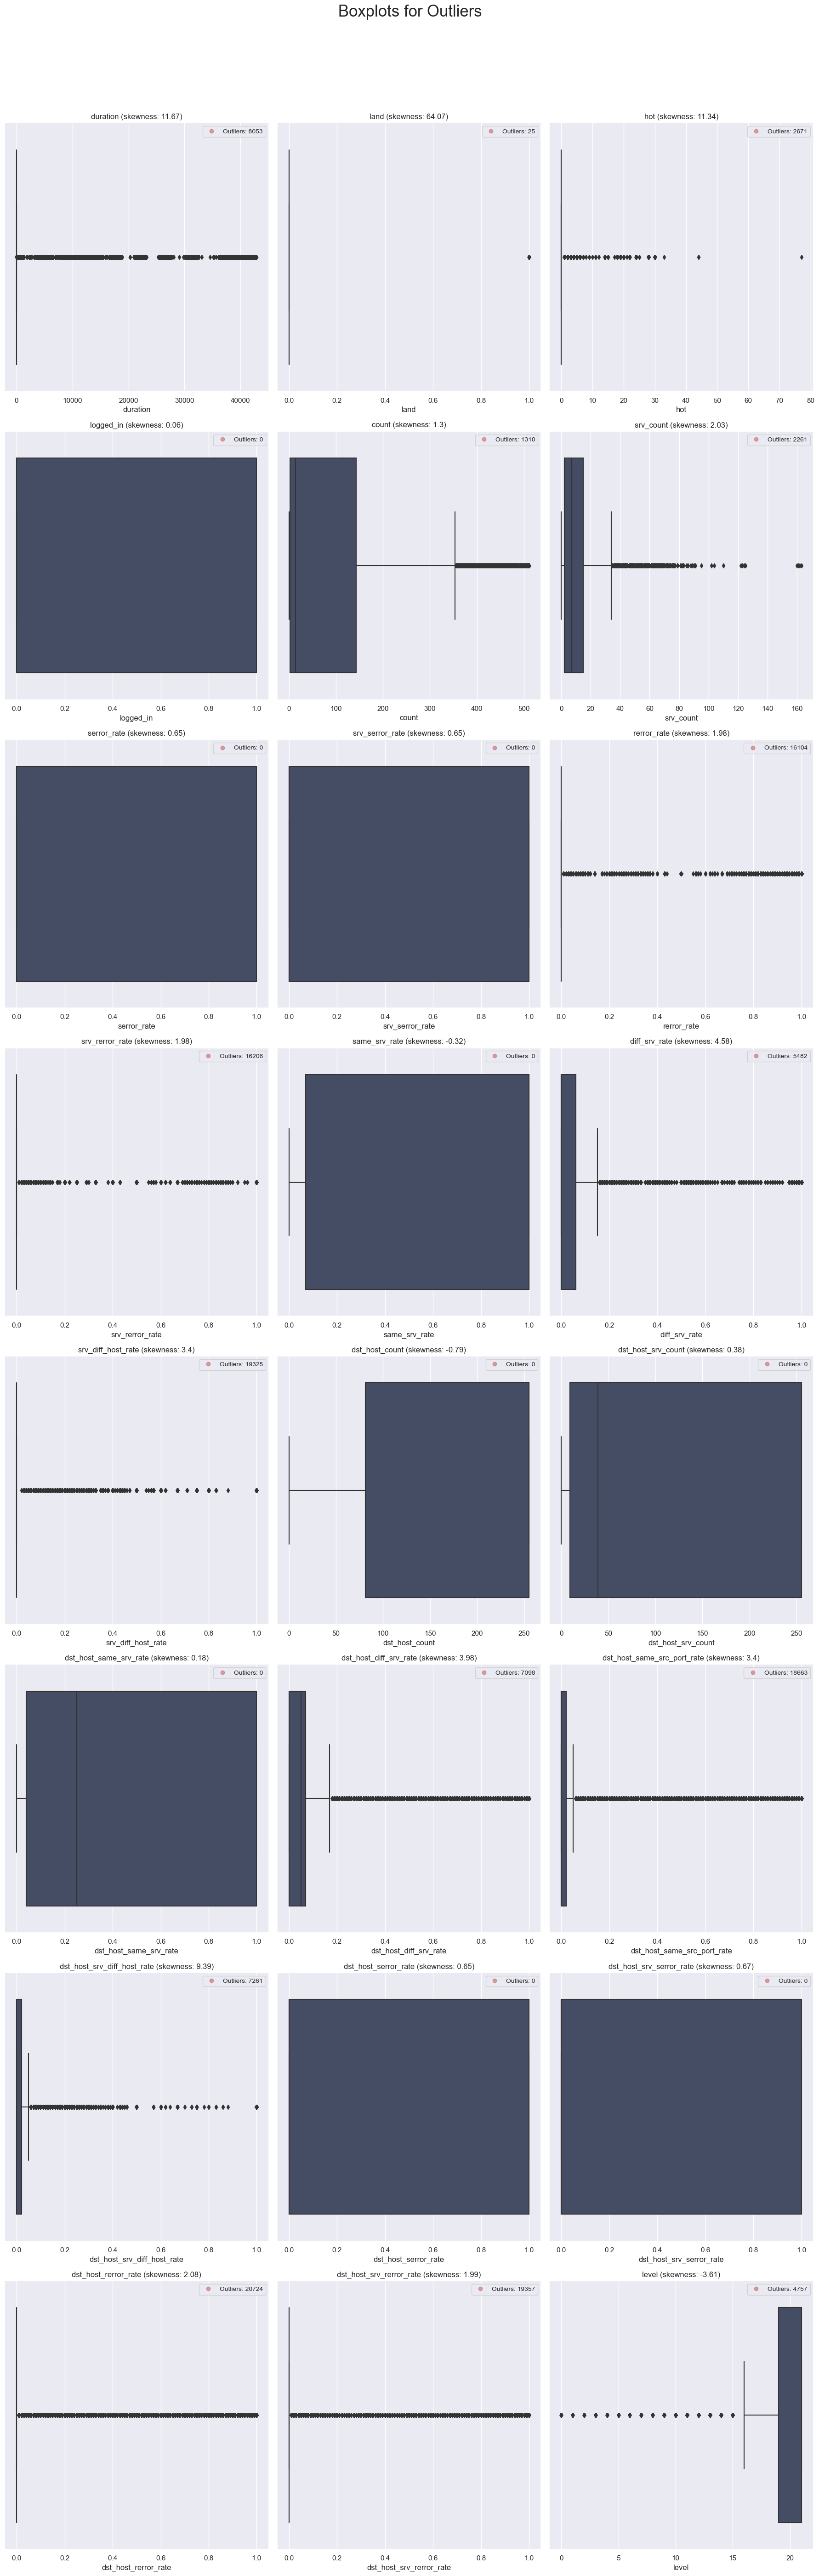

In [51]:
def plot_numerical_features_boxplots(data, columns_list, title):
    num_features = len(columns_list)
    cols = 3
    rows = (num_features + cols - 1) // cols

    sns.set_style('darkgrid')
    fig, axs = plt.subplots(rows, cols, figsize=(18, 7 * rows), sharey=True)
    fig.suptitle(title, fontsize=25, y=1)

    plt.subplots_adjust(hspace=0.5)

    axs = axs.flatten()

    outliers_df = pd.DataFrame(columns=['Column', 'Outlier_index', 'Outlier_values'])

    for i, col in enumerate(columns_list):
        sns.boxplot(x=data[col], color='#404B69', ax=axs[i])
        axs[i].set_title(f'{col} (skewness: {round(float(data[col].skew()), 2)})', fontsize=12)

        #----------------------------
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR)))
        outliers_index = data[outliers].index.tolist()
        outliers_values = data[col][outliers].tolist()

    
        outliers_df = pd.concat([outliers_df, pd.DataFrame({'Column': [col], 'Outlier_index': [outliers_index], 'Outlier_values': [outliers_values]})], ignore_index=True)

        axs[i].plot([], [], 'ro', alpha=0.5, label=f'Outliers: {outliers.sum()}')
        axs[i].legend(loc='upper right', fontsize=10)

    for i in range(num_features, rows * cols):
        axs[i].axis('off')

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust the layout
    return outliers_df

outliers_df_result = plot_numerical_features_boxplots(data=filtered_data_numerical, columns_list=filtered_data_numerical.columns, title='Boxplots for Outliers')


<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- If we take a close look at the boxplots above, we'll see the number of calculted outliers within each feature is shown to the upper left of the chart. We can see that there variables with 0 outliers hopefully but there features with huge number of outliers that surpasses 20000 in some cases (dst_rerror_rate).

We defined blow functions to remove outliers from both training and test sets. But they are momental until we define better functions to deal with outliers.

In [52]:
# Function to identify and remove outliers based on IQR
def remove_outliers(data, k=1.5):
    outliers = pd.DataFrame()
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR

        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])

    return outliers

# Identify and remove outliers
# outliers = remove_outliers(filtered_data_numerical)
# filtered_data_no_outliers = filtered_data_numerical[~filtered_data_numerical.index.isin(outliers.index)]

# Display the first few rows of the dataset without outliers
#filtered_data_no_outliers.head()

In [53]:
# Function to identify and remove outliers based on IQR
def test_remove_outliers(data, k=1.5):
    outliers = pd.DataFrame()
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR

        column_outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outliers = pd.concat([outliers, column_outliers])

    return outliers

# Identify and remove outliers
# test_outliers = remove_outliers(test_filtered_data_numerical)
# test_filtered_data_no_outliers = test_filtered_data_numerical[~test_filtered_data_numerical.index.isin(test_outliers.index)]

# Display the first few rows of the dataset without outliers
#test_filtered_data_no_outliers.head()

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Feature engineering</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
Sometimes, data is in a format that can’t be processed by machines. For instance, a column with string values, like names, will mean nothing to a model that depends only on numbers. So, we need to process the data to help the model interpret it.

We will begin by removing protocol_type since it's contains only the tcp value.

In [54]:
encoded_filtered_data = filtered_data.drop('protocol_type', axis = 1)

In [55]:
encoded_filtered_data.shape

(102689, 24)

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- We can see that the final number features that we will deal with after all data preprocessing is 24. It will not decrease more in rest of the notebook.

In [56]:
test_encoded_filtered_data = test_filtered_data.drop('protocol_type', axis = 1)

In [57]:
test_encoded_filtered_data.shape

(18880, 24)

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- We've got the same number also for tests 24. Our preprocessing went well for both train and test.

In [58]:
encoded_filtered_data.head()

duration  land  hot  logged_in  count  srv_count  serror_rate  \
0         0     0    0          0      2          2          0.0   
2         0     0    0          0    123          6          1.0   
3         0     0    0          1      5          5          0.2   
4         0     0    0          1     30         32          0.0   
5         0     0    0          0    121         19          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  ...  dst_host_srv_count  \
0              0.0          0.0              0.0  ...                  25   
2              1.0          0.0              0.0  ...                  26   
3              0.2          0.0              0.0  ...                 255   
4              0.0          0.0              0.0  ...                 255   
5              0.0          1.0              1.0  ...                  19   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
2                    0.10                    0.05   
3                    1.00                    0.00   
4                    1.00                    0.00   
5                    0.07                    0.07   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   
5                         0.00                         0.00   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   
5                  0.00                      0.00                  1.00   

   dst_host_srv_rerror_rate  level  
0                      0.00     20  
2                      0.00     19  
3                      0.01     21  
4                      0.00     21  
5                      1.00     21  

[5 rows x 24 columns]

In [59]:
test_encoded_filtered_data.head()

duration  land  hot  logged_in  count  srv_count  serror_rate  \
0         0     0    0          0    229         10          0.0   
1         0     0    0          0    136          1          0.0   
2         2     0    0          0      1          1          0.0   
4         1     0    0          0      1          8          0.0   
5         0     0    0          1      4          4          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  ...  dst_host_srv_count  \
0             0.00          1.0              1.0  ...                  10   
1             0.00          1.0              1.0  ...                   1   
2             0.00          0.0              0.0  ...                  86   
4             0.12          1.0              0.5  ...                  86   
5             0.00          0.0              0.0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1                    0.00                    0.06   
2                    0.61                    0.04   
4                    0.31                    0.17   
5                    1.00                    0.00   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.00                         0.00   
1                         0.00                         0.00   
2                         0.61                         0.02   
4                         0.03                         0.02   
5                         0.01                         0.03   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                       0.0                  1.00   
1                  0.00                       0.0                  1.00   
2                  0.00                       0.0                  0.00   
4                  0.00                       0.0                  0.83   
5                  0.01                       0.0                  0.00   

   dst_host_srv_rerror_rate  level  
0                      1.00     21  
1                      1.00     21  
2                      0.00     21  
4                      0.71     11  
5                      0.00     21  

[5 rows x 24 columns]

We will pass now to the binary classifcation step where we to categorize our label into two classes (normal and abnormal for the the family attacks)

#### Binary Classification

In [60]:
encoded_filtered_data = encoded_filtered_data.join(train['xAttack'])
test_encoded_filtered_data = test_encoded_filtered_data.join(test['xAttack'])

In [61]:
bin_label = pd.DataFrame(encoded_filtered_data.xAttack.map(lambda x:'normal' if x=='normal' else 'abnormal'))
test_bin_label = pd.DataFrame(test_encoded_filtered_data.xAttack.map(lambda x:'normal' if x=='normal' else 'abnormal'))

In [62]:
bin_data = encoded_filtered_data.copy()
bin_data['xAttack'] = bin_label

test_bin_data = test_encoded_filtered_data.copy()
test_bin_data['xAttack'] = test_bin_label

We visualize a pie chart to see the distribution of normal and abnormal labels of our binary data.

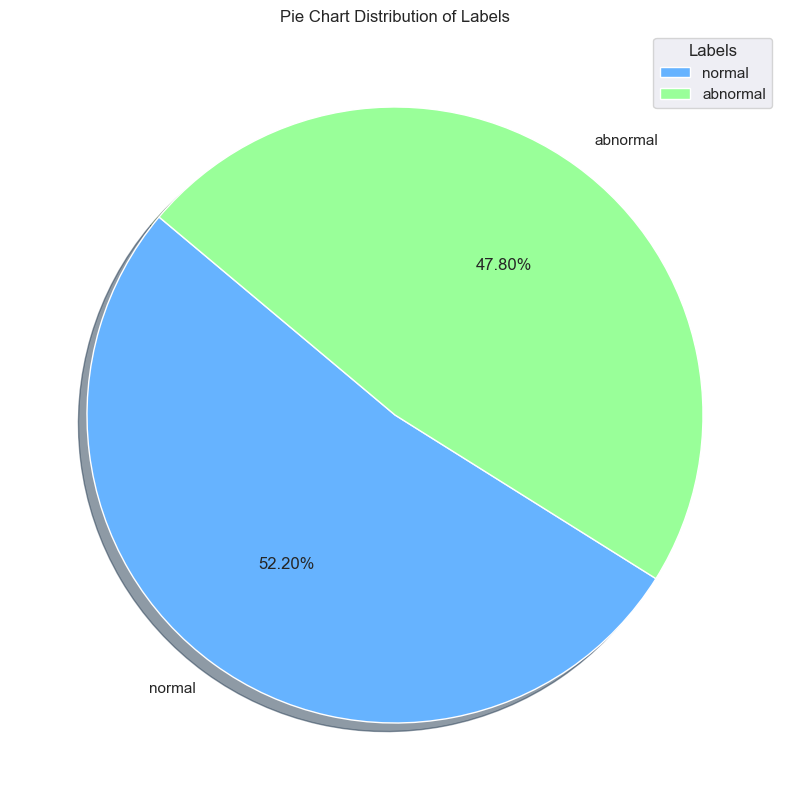

In [63]:
label_counts = bin_data.xAttack.value_counts()

colors = ['#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6']

plt.figure(figsize=(10, 10))
plt.pie(label_counts, labels=label_counts.index, autopct='%0.2f%%', colors=colors, shadow=True, startangle=140)

plt.title("Pie Chart Distribution of Labels")
plt.legend(title="Labels", loc="upper right")
plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Our dataset is balanced. The normal and abnormal value percentages are close.

We will encode our binary labels using LabelEncoder:
- normal: 0
- abnormal: 1 

In [64]:
le1 = LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['xAttack_encoded'] = enc_label
training_data = bin_data.drop('xAttack', axis=1)

test_le1 = LabelEncoder()
test_enc_label = test_bin_label.apply(test_le1.fit_transform)
test_bin_data['xAttack_encoded'] = test_enc_label
test_data = test_bin_data.drop('xAttack', axis=1)

We will visualize the distribution of our label regarding all other features after encoding using violinplot.

In [66]:
num_rows = (len(bin_data.columns) - 1 + 2) // 3  # Exclude the 'xAttack' column
num_cols = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 6), facecolor='#F2F4F4')
fig.subplots_adjust(wspace=0.2, hspace=0.5)

axes = axes.flatten()

for i, feature in enumerate(bin_data.columns[:-1]):  # Exclude the 'xAttack' column
    sns.violinplot(x='xAttack_encoded', y=feature, data=bin_data, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {feature} for Normal and Abnormal') 

if (len(bin_data.columns) - 1) % 3 != 0:
    for i in range(len(bin_data.columns) - 1, num_rows * num_cols):
        fig.delaxes(axes[i])

plt.show()

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- By interpreting these plots, we can see balanced distrubtion of normal and abnormal attacks in some features.
- Because of their low importance to the our target, certain features have an almost empty distribution of the attacks.

In [67]:
training_data.head(10)

duration  land  hot  logged_in  count  srv_count  serror_rate  \
0          0     0    0          0      2          2          0.0   
2          0     0    0          0    123          6          1.0   
3          0     0    0          1      5          5          0.2   
4          0     0    0          1     30         32          0.0   
5          0     0    0          0    121         19          0.0   
6          0     0    0          0    166          9          1.0   
7          0     0    0          0    117         16          1.0   
8          0     0    0          0    270         23          1.0   
9          0     0    0          0    133          8          1.0   
10         0     0    0          0    205         12          0.0   

    srv_serror_rate  rerror_rate  srv_rerror_rate  ...  \
0               0.0          0.0              0.0  ...   
2               1.0          0.0              0.0  ...   
3               0.2          0.0              0.0  ...   
4               0.0          0.0              0.0  ...   
5               0.0          1.0              1.0  ...   
6               1.0          0.0              0.0  ...   
7               1.0          0.0              0.0  ...   
8               1.0          0.0              0.0  ...   
9               1.0          0.0              0.0  ...   
10              0.0          1.0              1.0  ...   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.17                    0.03   
2                     0.10                    0.05   
3                     1.00                    0.00   
4                     1.00                    0.00   
5                     0.07                    0.07   
6                     0.04                    0.05   
7                     0.06                    0.07   
8                     0.09                    0.05   
9                     0.05                    0.06   
10                    0.05                    0.07   

    dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.17                         0.00   
2                          0.00                         0.00   
3                          0.03                         0.04   
4                          0.00                         0.00   
5                          0.00                         0.00   
6                          0.00                         0.00   
7                          0.00                         0.00   
8                          0.00                         0.00   
9                          0.00                         0.00   
10                         0.00                         0.00   

    dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.00                      0.00                  0.05   
2                   1.00                      1.00                  0.00   
3                   0.03                      0.01                  0.00   
4                   0.00                      0.00                  0.00   
5                   0.00                      0.00                  1.00   
6                   1.00                      1.00                  0.00   
7                   1.00                      1.00                  0.00   
8                   1.00                      1.00                  0.00   
9                   1.00                      1.00                  0.00   
10                  0.00                      0.00                  1.00   

    dst_host_srv_rerror_rate  level  xAttack_encoded  
0                       0.00     20                1  
2                       0.00     19                0  
3                       0.01     21                1  
4                       0.00     21                1  
5                       1.00     21                0  
6                       0.00     21                0  
7                       0.00     21                0  
8                       0.00

In [68]:
test_data.head(10)

duration  land  hot  logged_in  count  srv_count  serror_rate  \
0          0     0    0          0    229         10          0.0   
1          0     0    0          0    136          1          0.0   
2          2     0    0          0      1          1          0.0   
4          1     0    0          0      1          8          0.0   
5          0     0    0          1      4          4          0.0   
6          0     0    0          1      1          3          0.0   
7          0     0    0          0      1          1          0.0   
8          0     0    0          1     33         47          0.0   
9          0     0    0          0      1          1          0.0   
10         0     0    0          0      1          1          0.0   

    srv_serror_rate  rerror_rate  srv_rerror_rate  ...  \
0              0.00          1.0              1.0  ...   
1              0.00          1.0              1.0  ...   
2              0.00          0.0              0.0  ...   
4              0.12          1.0              0.5  ...   
5              0.00          0.0              0.0  ...   
6              0.00          0.0              0.0  ...   
7              0.00          0.0              0.0  ...   
8              0.00          0.0              0.0  ...   
9              0.00          0.0              0.0  ...   
10             0.00          0.0              0.0  ...   

    dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     0.04                    0.06   
1                     0.00                    0.06   
2                     0.61                    0.04   
4                     0.31                    0.17   
5                     1.00                    0.00   
6                     0.11                    0.72   
7                     1.00                    0.00   
8                     1.00                    0.00   
9                     0.50                    0.08   
10                    0.50                    0.01   

    dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.00                         0.00   
1                          0.00                         0.00   
2                          0.61                         0.02   
4                          0.03                         0.02   
5                          0.01                         0.03   
6                          0.00                         0.00   
7                          0.00                         0.00   
8                          0.01                         0.03   
9                          0.02                         0.00   
10                         0.00                         0.00   

    dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                   0.00                      0.00                  1.00   
1                   0.00                      0.00                  1.00   
2                   0.00                      0.00                  0.00   
4                   0.00                      0.00                  0.83   
5                   0.01                      0.00                  0.00   
6                   0.00                      0.00                  0.72   
7                   0.01                      0.01                  0.02   
8                   0.00                      0.00                  0.00   
9                   0.00                      0.00                  0.00   
10                  0.00                      0.00                  0.66   

    dst_host_srv_rerror_rate  level  xAttack_encoded  
0                       1.00     21                0  
1                       1.00     21                0  
2                       0.00     21                1  
4                       0.71     11                0  
5                       0.00     21                1  
6                       0.04     21                1  
7                       0.02     15                0  
8                       0.00

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Generating datasets</p> 

In this step, we will be generating different datasets from the original one in the purpose of applying different models on them and finding the best one based on the final evaluation results.

The generated datasets will include normalization, PCA and GMM.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">d_raw</p>

This one is the original NSL-KDD dataset without any transformation of the numerical values.

In [421]:
d_raw_train = training_data.copy()
d_raw_test = test_data.copy()

In [422]:
d_raw_train.head()

duration  land  hot  logged_in  count  srv_count  serror_rate  \
0         0     0    0          0      2          2          0.0   
2         0     0    0          0    123          6          1.0   
3         0     0    0          1      5          5          0.2   
4         0     0    0          1     30         32          0.0   
5         0     0    0          0    121         19          0.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  ...  dst_host_same_srv_rate  \
0              0.0          0.0              0.0  ...                    0.17   
2              1.0          0.0              0.0  ...                    0.10   
3              0.2          0.0              0.0  ...                    1.00   
4              0.0          0.0              0.0  ...                    1.00   
5              0.0          1.0              1.0  ...                    0.07   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   
5                    0.07                         0.00   

   dst_host_srv_diff_host_rate  dst_host_serror_rate  \
0                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   
5                         0.00                  0.00   

   dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   
5                      0.00                  1.00                      1.00   

   level  xAttack_encoded  
0     20                1  
2     19                0  
3     21                1  
4     21                1  
5     21                0  

[5 rows x 25 columns]

We will exclude our target data for training and testing now so everything will be prepared for modeling later.

In [423]:
train_target = d_raw_train['xAttack_encoded']
d_raw_train.drop('xAttack_encoded',inplace=True,axis=1)

test_target = d_raw_test['xAttack_encoded']
d_raw_test.drop('xAttack_encoded',inplace=True,axis=1)

We will define a dataset that only contains the normal attack values. It will be considered for specific models later on.

In [505]:
d_raw_train['xAttack_encoded'] = train_target
d_raw_train_normal = d_raw_train[d_raw_train['xAttack_encoded'] == 0]
d_raw_train_normal.drop(['xAttack_encoded'], inplace=True, axis = 1)
d_raw_train.drop(['xAttack_encoded'], inplace=True, axis = 1)
d_raw_train_normal.head()

C:\Users\hamdi\AppData\Local\Temp\ipykernel_26140\2800170134.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_raw_train_normal.drop(['xAttack_encoded'], inplace=True, axis = 1)


duration  land  hot  logged_in  count  srv_count  serror_rate  \
2         0     0    0          0    123          6          1.0   
5         0     0    0          0    121         19          0.0   
6         0     0    0          0    166          9          1.0   
7         0     0    0          0    117         16          1.0   
8         0     0    0          0    270         23          1.0   

   srv_serror_rate  rerror_rate  srv_rerror_rate  ...  dst_host_srv_count  \
2              1.0          0.0              0.0  ...                  26   
5              0.0          1.0              1.0  ...                  19   
6              1.0          0.0              0.0  ...                   9   
7              1.0          0.0              0.0  ...                  15   
8              1.0          0.0              0.0  ...                  23   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
2                    0.10                    0.05   
5                    0.07                    0.07   
6                    0.04                    0.05   
7                    0.06                    0.07   
8                    0.09                    0.05   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
2                          0.0                          0.0   
5                          0.0                          0.0   
6                          0.0                          0.0   
7                          0.0                          0.0   
8                          0.0                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
2                   1.0                       1.0                   0.0   
5                   0.0                       0.0                   1.0   
6                   1.0                       1.0                   0.0   
7                   1.0                       1.0                   0.0   
8                   1.0                       1.0                   0.0   

   dst_host_srv_rerror_rate  level  
2                       0.0     19  
5                       1.0     21  
6                       0.0     21  
7                       0.0     21  
8                       0.0     21  

[5 rows x 24 columns]

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">d_raw_probs</p>

We apply the FGMPM to the original NSL dataset values and change each feature value for the occurrence probability of each feature in the normal model.

In [425]:
def GMM_Row_Transform(data, values, threshold):
    probs = []
    for idx in range(len(data.columns)):
        mean = np.array(data.iloc[:,idx]).mean()
        std = np.array(data.iloc[:,idx]).std()

        z_score = (values[idx] - mean)/std
        prob = (1-norm.cdf(z_score))*100
        probs.append(prob)
    return probs

In [426]:
def GMM_Matrix_Transform(origin_data, data, threshold):
    matrix = []
    for i in tqdm(range(len(data))):
        row = GMM_Row_Transform(origin_data, data.iloc[i,:], threshold)
        
        matrix.append(row)
    return matrix

In [449]:
def GMM_Prob_Transform(data, threshold):
    gmm = GaussianMixture(n_components=2, random_state=0)
    gmm.fit(data)

    # Get probabilities of belonging to each cluster for each sample
    probs = gmm.predict_proba(data)

    # Extract probabilities of belonging to the normal cluster
    normal_probs = probs[:, 0]

    # Transform original data based on the occurrence probability of each feature in the normal model
    transformed_data = data.copy()

    for col_idx in range(data.shape[1]):
        # Replace original values with NaN based on the normal cluster probabilities
        mask = np.random.choice([True, False], size=len(data), p=[normal_probs[col_idx], 1 - normal_probs[col_idx]])
        transformed_data.iloc[:, col_idx] = np.where(mask, np.nan, transformed_data.iloc[:, col_idx])

    # Replace NaN values with the mean of the original data
    transformed_data.fillna(data.mean(), inplace=True)

    return transformed_data

In [506]:
d_raw_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_raw_train, d_raw_train, 50))
d_raw_probs_test =  pd.DataFrame(GMM_Matrix_Transform(d_raw_train, d_raw_test, 50))

100%|██████████| 18880/18880 [03:21<00:00, 93.66it/s]


We also generate the probability data with only normal attacks.

In [508]:
d_raw_probs_train_normal = pd.DataFrame(GMM_Matrix_Transform(d_raw_train_normal, d_raw_train_normal, 50))

100%|██████████| 49089/49089 [05:19<00:00, 153.87it/s]


<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">d_raw_pca</p>

We will generate the uncorrelated version of the original NSL-KDD dataset with the same number of features.

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

📌**Principal Component Analysis (PCA)** is a technique used to reduce the dimensions of a dataset while minimizing information loss. It does this by combining information from all variables into Principal Components (PCs) that are uncorrelated with each other. <blockquote>For example, a dataset with 10 variables will yield 10 PCs, each of which aims to summarize the information contained in the original variables while minimizing redundancy or correlation.<blockquote>
    
- PCA allows us to reduce the number of dimensions while retaining as much information as possible. We can choose to discard some of the PCs and use the remaining ones as our variables. This results in a dataset with fewer dimensions, but without any significant loss of information. Additionally, the new variables created through PCA are uncorrelated, which can be useful for downstream analysis.
-----    
- Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

In [80]:
def PCA_transformation(data, dim = None):
    pca = PCA()
    pca.fit(data)
    cum_vars = np.cumsum(pca.explained_variance_ratio_)
    for i in range(len(cum_vars)):
        if cum_vars[i] == 0.999:
            break
    if dim:
        pca = PCA(dim)
        data = pca.fit_transform(data)
        return pd.DataFrame(data)
    
    pca = PCA(i)
    data = pca.fit_transform(data)
    return pd.DataFrame(data), i

In [81]:
d_raw_pca_train, dim = PCA_transformation(d_raw_train)
d_raw_pca_test = PCA_transformation(d_raw_test, dim)

We also generate the uncorrelated data with only normal attacks.

In [82]:
d_raw_pca_train_normal, _ = PCA_transformation(d_raw_train_normal)

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">d_norm</p>

We will generate the original NSL-KDD dataset with the normal training values normalized to the range [0-1] and the remaining values normalized according to the previous scaler.

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

📌Data scaling is necessary when the range of values differs across columns. By scaling the data, we ensure that each column has the same range or standardization of values. Standardization is important because higher scales may result in greater variance or covariance values, which can lead to bias. Therefore, we will begin by standardizing the features.

In [83]:
def normalizing(data):
    for idx in range(len(data.columns)):
        if data.nunique()[idx] != 2:
            data.iloc[:,idx] = normalize([np.array(data.iloc[:,idx])]).reshape(-1)
    return data

In [84]:
d_norm_train = normalizing(d_raw_train)
d_norm_test = normalizing(d_raw_test)

We also generate the normalized data with only normal attacks.

In [85]:
d_norm_train_normal = normalizing(d_raw_train_normal)

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">d_norm_pca</p>

We will generate the uncorrelated version of the normalized dataset.

In [266]:
d_norm_pca_train, dim = PCA_transformation(normalizing(d_raw_train))
d_norm_pca_test = PCA_transformation(normalizing(d_raw_test), dim)

We also generate the uncorrelated version of the normalized data with only normal attacks.

In [267]:
d_norm_pca_train_normal, dim = PCA_transformation(normalizing(d_raw_train_normal))

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">d_raw_pca_probs</p>

We apply the FGMPM to the uncorrelated version of the original dataset and obtain the occurrence probabilities for this uncorrelated values of the features.

In [509]:
d_raw_pca_probs_train, dim = PCA_transformation(d_raw_train)
d_raw_pca_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_probs_train, d_raw_pca_probs_train, 50))

d_raw_pca_probs_test = PCA_transformation(d_raw_test, dim )
d_raw_pca_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_probs_train, d_raw_pca_probs_test, 50))

100%|██████████| 18880/18880 [02:56<00:00, 106.67it/s]


We generate the probability uncorrelated data with only normal attacks.

In [510]:
d_raw_pca_probs_train_normal, dim = PCA_transformation(d_raw_train_normal)
d_raw_pca_probs_train_normal = pd.DataFrame(GMM_Matrix_Transform(d_raw_pca_probs_train_normal, d_raw_pca_probs_train_normal, 50))

100%|██████████| 49089/49089 [04:33<00:00, 179.31it/s]


<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">d_norm_probs</p>

We apply the FGPM to the normalized version of the dataset.

In [511]:
d_norm_probs_train = normalizing(d_raw_train)
d_norm_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_norm_probs_train, d_norm_probs_train, 50))

d_norm_probs_test = normalizing(d_raw_test)
d_norm_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_norm_probs_train, d_norm_probs_test, 50))

100%|██████████| 18880/18880 [03:07<00:00, 100.73it/s]


We generate the probability normalized data with only normal attacks.

In [512]:
d_norm_probs_train_normal = normalizing(d_raw_train_normal)
d_norm_probs_train_normal = pd.DataFrame(GMM_Matrix_Transform(d_norm_probs_train_normal, d_norm_probs_train_normal, 50))

100%|██████████| 49089/49089 [05:05<00:00, 160.56it/s]


<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">d_norm_pca_probs</p>

The occurrence probabilities of the uncorrelated features of the normalized dataset.

In [513]:
d_norm_pca_probs_train = normalizing(d_raw_train)
d_norm_pca_probs_train, dim = PCA_transformation(d_norm_pca_probs_train)
d_norm_pca_probs_train = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_probs_train, d_norm_pca_probs_train, 50))

d_norm_pca_probs_test = normalizing(d_raw_test)
d_norm_pca_probs_test, dim = PCA_transformation(d_norm_pca_probs_test)
d_norm_pca_probs_test = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_probs_train, d_norm_pca_probs_test, 50))

100%|██████████| 18880/18880 [02:57<00:00, 106.07it/s]


Only normal attacks

In [514]:
d_norm_pca_probs_train_normal = normalizing(d_raw_train_normal)
d_norm_pca_probs_train_normal, dim = PCA_transformation(d_norm_pca_probs_train_normal)
d_norm_pca_probs_train_normal = pd.DataFrame(GMM_Matrix_Transform(d_norm_pca_probs_train_normal, d_norm_pca_probs_train_normal, 50))

100%|██████████| 49089/49089 [04:48<00:00, 170.08it/s]


<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Modeling</p> 

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">

In this stage of the process one has to apply mathematical, computer science, and business knowledge to train a Machine Learning algorithm that will make predictions based on the provided data. It is a crucial step that will determine the quality and accuracy of future predictions in new situations

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Voting</p>

We proposed a voting scheme method for anomaly detection that can only be applied to the probability datasets.

In [516]:
def GMM_vote(data, values, threshold):
    no = 0
    for idx in range(len(data.columns)):
        mean = np.array(data.iloc[:,idx]).mean()
        std = np.array(data.iloc[:,idx]).std()

        z_score = (values[idx] - mean)/std
        prob = (1-norm.cdf(z_score))*100
        if prob <= threshold:
            no += 1
    return no

In [517]:
def voting(data_train, data_test, min_abnormal_features = 10, threshold = 50):
    preds = []
    for idx in tqdm(range(len(data_test))):
        values = list(data_test.iloc[idx,:])
        no = GMM_vote(data_train, values, threshold)
        if no > min_abnormal_features:
            preds.append(1)
        else:
            preds.append(0)
    return preds

We created a plot confusion matrix fucntion that renders a confusion matrix that will be applied to each of the models which we will consider.

In [518]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    classes = [0, 1] 
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

We also created a plot roc curve function that will be applied to each of the models which we will consider.

In [519]:
def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

### d_raw_probs

In [520]:
voting_d_raw_probs_preds = voting(d_raw_probs_train_normal, d_raw_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [01:54<00:00, 165.12it/s]


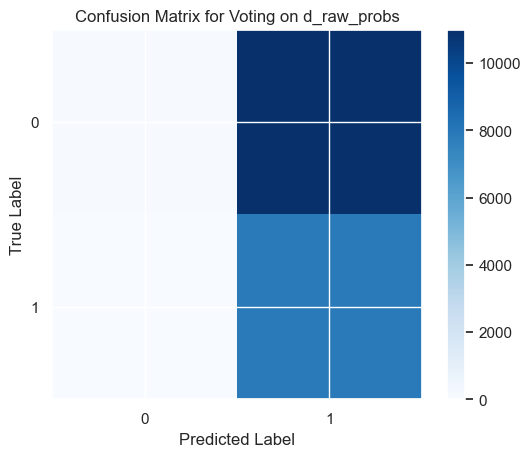

In [521]:
plot_confusion_matrix(test_target, voting_d_raw_probs_preds, title='Confusion Matrix for Voting on d_raw_probs')

In [522]:
plot_roc_curve(test_target, voting_d_raw_probs_preds, title='ROC Curve for Voting on d_raw_pros')

### d_raw_pca_probs

In [523]:
voting_d_raw_pca_probs_preds = voting(d_raw_pca_probs_train_normal, d_raw_pca_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [01:48<00:00, 173.39it/s]


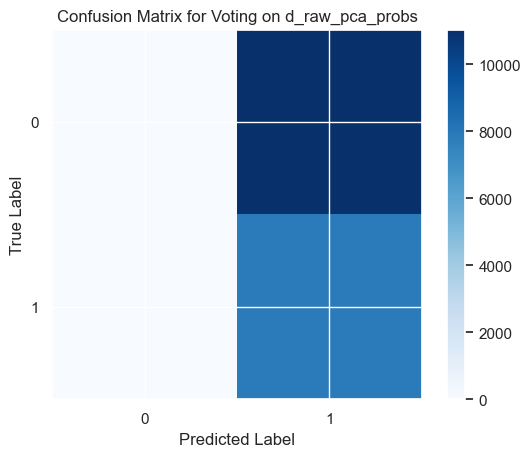

In [524]:
plot_confusion_matrix(test_target, voting_d_raw_pca_probs_preds, title='Confusion Matrix for Voting on d_raw_pca_probs')

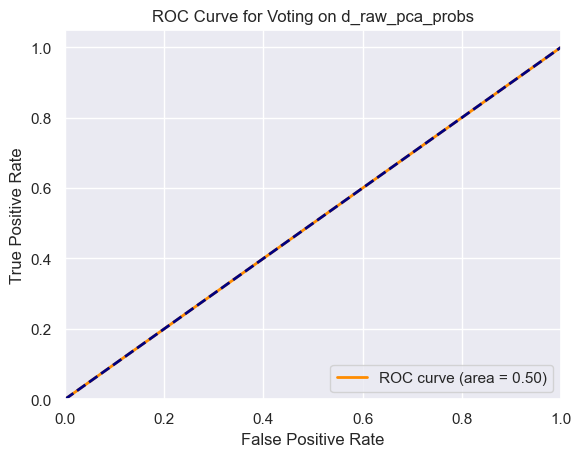

In [525]:
plot_roc_curve(test_target, voting_d_raw_pca_probs_preds, title='ROC Curve for Voting on d_raw_pca_probs')

### d_norm_probs

In [526]:
voting_d_norm_probs_preds = voting(d_norm_probs_train_normal, d_norm_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [01:52<00:00, 167.62it/s]


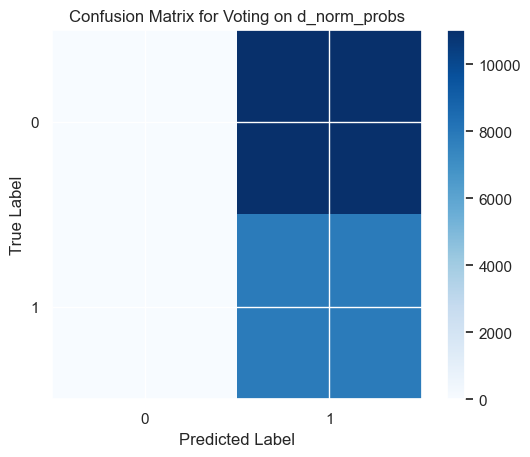

In [527]:
plot_confusion_matrix(test_target, voting_d_norm_probs_preds, title='Confusion Matrix for Voting on d_norm_probs')

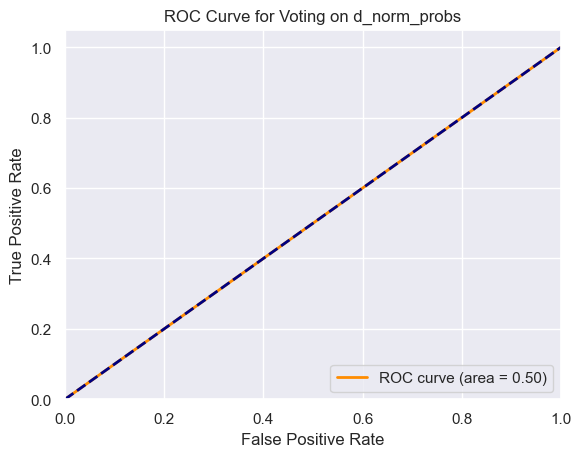

In [528]:
plot_roc_curve(test_target, voting_d_norm_probs_preds, title='ROC Curve for Voting on d_norm_probs')

### d_norm_pca_probs

In [529]:
voting_d_norm_pca_probs_preds = voting(d_norm_pca_probs_train_normal, d_norm_pca_probs_test, min_abnormal_features = 10, threshold = 50)

100%|██████████| 18880/18880 [01:48<00:00, 174.48it/s]


In [530]:
plot_confusion_matrix(test_target, voting_d_norm_pca_probs_preds, title='Confusion Matrix for Voting on d_norm_pca_probs')

In [531]:
plot_roc_curve(test_target, voting_d_raw_pca_probs_preds, title='ROC Curve for Voting on d_norm_pca_probs')

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Either the probability datasets are badly transformed or the voting function is not well defined. We can see that all predictions of the voting is equal to '1' and all the roc curves are equal to 0.5.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Decision Tree</p>

We fined a default decision tree classifier. We also applied GridSearch to find the best hyparameters for our decision tree model and we defined a function that takes a DecisionTreeClassfier sklearn class using the best hyperparameters.

In [532]:
def best_dt_params(train_data, test_data):
    param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(1,10)}
    grid = GridSearchCV(tree.DecisionTreeClassifier(random_state=1), param_grid=param_grid, cv=5)
    grid.fit(train_data, train_target)
    best_params = grid.best_params_
    return best_params

In [533]:
def dt_model(train_data, test_data, best_params):
    model = tree.DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'])
    model.fit(train_data, train_target)
    preds = model.predict(test_data)
    
    return preds

### d_raw

In [534]:
best_dt_params_d_raw = best_dt_params(d_raw_train, d_raw_test)

In [535]:
dt_d_raw_preds = dt_model(d_raw_train, d_raw_test,best_dt_params_d_raw)

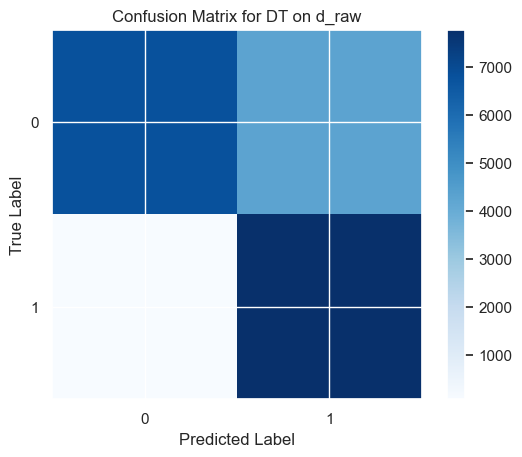

In [536]:
plot_confusion_matrix(test_target, dt_d_raw_preds, title='Confusion Matrix for DT on d_raw')

In [537]:
plot_roc_curve(test_target, dt_d_raw_preds, title='ROC Curve for DT on d_raw')

### d_raw_probs

In [538]:
best_dt_params_d_raw_probs = best_dt_params(d_raw_probs_train, d_raw_probs_test)

In [539]:
dt_d_raw_probs_preds = dt_model(d_raw_probs_train, d_raw_probs_test, best_dt_params_d_raw_probs)

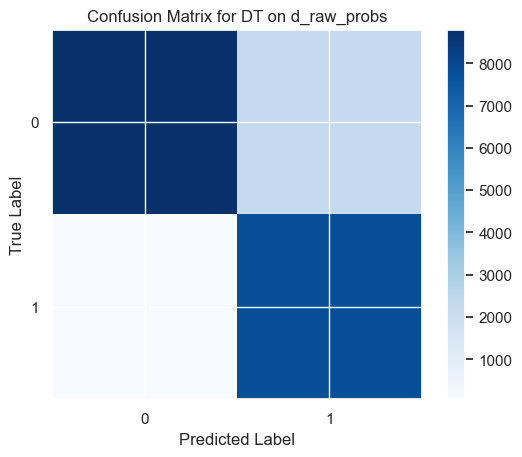

In [540]:
plot_confusion_matrix(test_target, dt_d_raw_probs_preds, title='Confusion Matrix for DT on d_raw_probs')

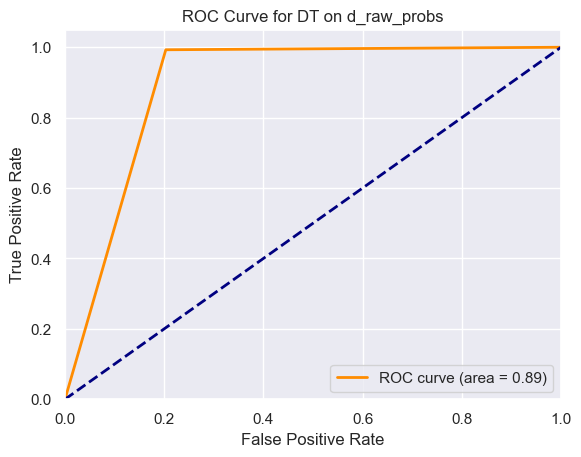

In [541]:
plot_roc_curve(test_target, dt_d_raw_probs_preds, title='ROC Curve for DT on d_raw_probs')

### d_raw_pca

In [542]:
best_dt_params_d_raw_pca = best_dt_params(d_raw_pca_train, d_raw_pca_test)

In [543]:
dt_d_raw_pca_preds = dt_model(d_raw_pca_train, d_raw_pca_test, best_dt_params_d_raw_pca)

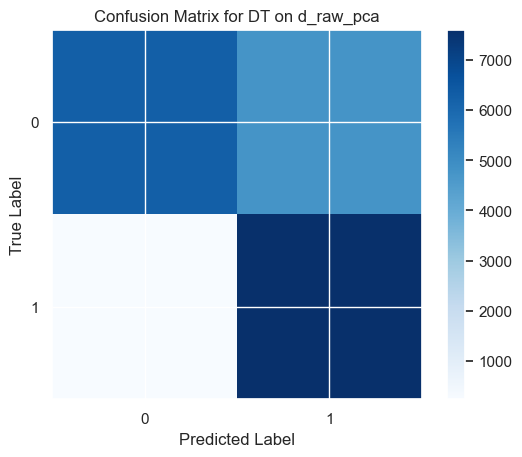

In [544]:
plot_confusion_matrix(test_target, dt_d_raw_pca_preds, title='Confusion Matrix for DT on d_raw_pca')

In [545]:
plot_roc_curve(test_target, dt_d_raw_pca_preds, title='ROC Curve for DT on d_raw_pca')

### d_raw_pca_probs

In [546]:
best_dt_params_d_raw_pca_probs = best_dt_params(d_raw_pca_probs_train, d_raw_pca_probs_test)

In [547]:
dt_d_raw_pca_probs_preds = dt_model(d_raw_pca_probs_train, d_raw_pca_probs_test, best_dt_params_d_raw_pca_probs)

In [548]:
plot_confusion_matrix(test_target, dt_d_raw_pca_probs_preds, title='Confusion Matrix for DT on d_raw_pca_probs')

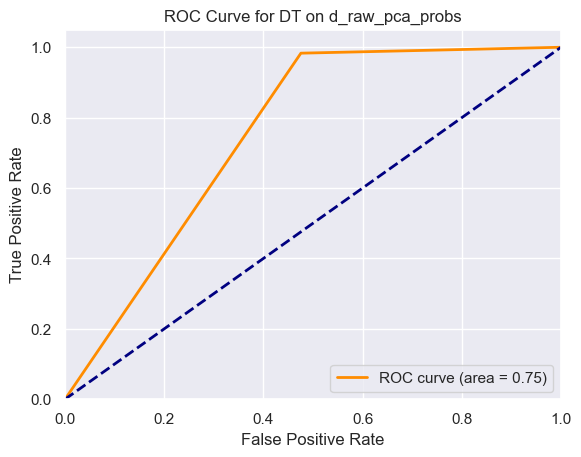

In [549]:
plot_roc_curve(test_target, dt_d_raw_pca_probs_preds, title='ROC Curve for DT on d_raw_pca_probs')

### d_norm

In [550]:
best_dt_params_d_raw_pca = best_dt_params(d_raw_pca_train, d_raw_pca_test)

In [551]:
dt_d_norm_preds = dt_model(d_norm_train, d_norm_test, best_dt_params_d_raw_pca)

In [552]:
plot_confusion_matrix(test_target, dt_d_norm_preds, title='Confusion Matrix for DT on d_norm')

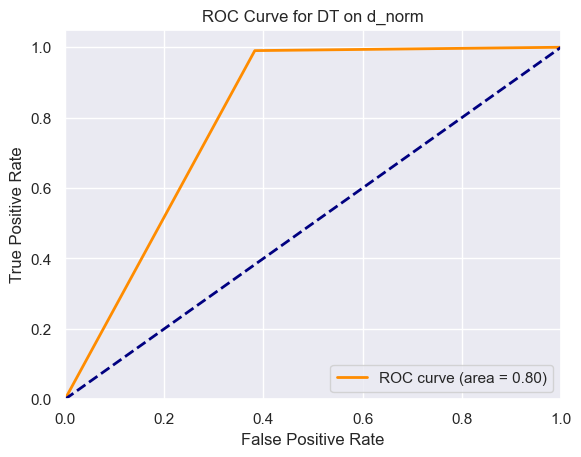

In [553]:
plot_roc_curve(test_target, dt_d_norm_preds, title='ROC Curve for DT on d_norm')

### d_norm_probs

In [554]:
best_dt_params_d_norm_probs = best_dt_params(d_norm_probs_train, d_norm_probs_test)

In [555]:
dt_d_norm_probs_preds = dt_model(d_norm_probs_train, d_norm_probs_test, best_dt_params_d_norm_probs)

In [556]:
plot_confusion_matrix(test_target, dt_d_norm_probs_preds, title='Confusion Matrix for DT on d_norm_probs')

In [557]:
plot_roc_curve(test_target, dt_d_norm_probs_preds, title='ROC Curve for DT on d_norm_probs')

### d_norm_pca

In [558]:
best_dt_params_d_norm_pca_probs = best_dt_params(d_norm_pca_train, d_norm_pca_test)

In [559]:
dt_d_norm_pca_preds = dt_model(d_norm_pca_train, d_norm_pca_test, best_dt_params_d_norm_pca_probs)

In [560]:
plot_confusion_matrix(test_target, dt_d_norm_pca_preds, title='Confusion Matrix for DT on d_norm_pca')

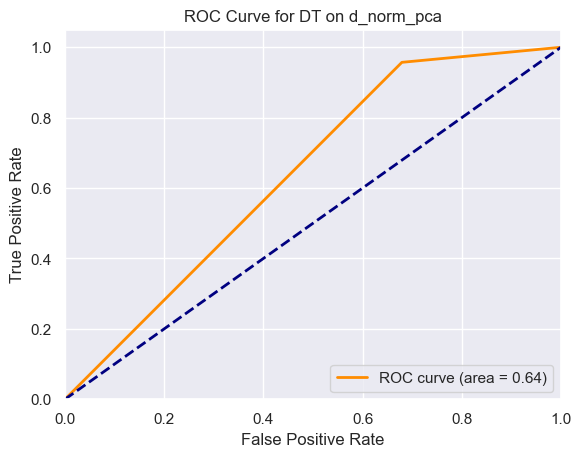

In [561]:
plot_roc_curve(test_target, dt_d_norm_pca_preds, title='ROC Curve for DT on d_norm_pca')

### d_norm_pca_probs

In [562]:
best_dt_params_d_norm_pca_probs = best_dt_params(d_norm_pca_probs_train, d_norm_pca_probs_test)

In [563]:
dt_d_norm_pca_probs_preds = dt_model(d_norm_pca_probs_train, d_norm_pca_probs_test, best_dt_params_d_norm_pca_probs)

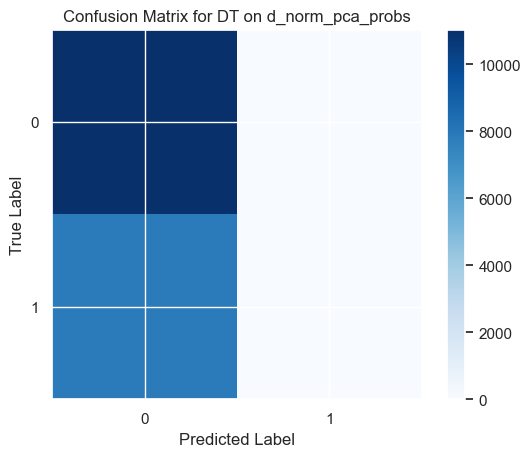

In [564]:
plot_confusion_matrix(test_target, dt_d_norm_pca_probs_preds, title='Confusion Matrix for DT on d_norm_pca_probs')

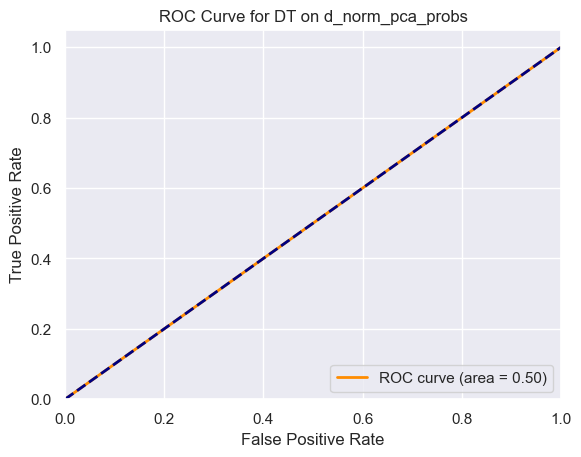

In [565]:
plot_roc_curve(test_target, dt_d_norm_pca_probs_preds, title='ROC Curve for DT on d_norm_pca_probs')

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Looking at the models at confusion matrixes and roc curve plots, we can see that decision tree model is well fit to almost all the datasets. This is due to vulnerability of this algorithm to certain data transformation techniques.
- The worst datasets according to the plots is the d_norm_probs and d_norm_pca_probs.
 

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Support Vector Machine</p>

We will use this algorithm with the objective of obtaining a membership decision boundary for only one class of data. Wwe we defined a function that takes the SVC class of sklearn with empty parame.

In [605]:
def SVM_model(train_data, test_data):
    model = SVC()
    model.fit(train_data, train_target)
    preds = model.predict(test_data)
    return preds

### d_raw

In [606]:
svm_d_raw_preds = SVM_model(d_raw_train, d_raw_test)

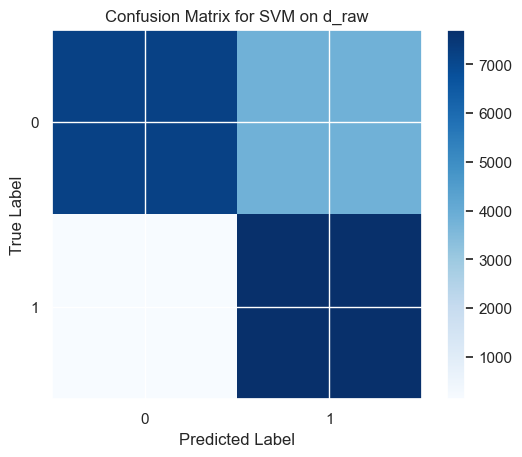

In [607]:
plot_confusion_matrix(test_target, svm_d_raw_preds, title='Confusion Matrix for SVM on d_raw')

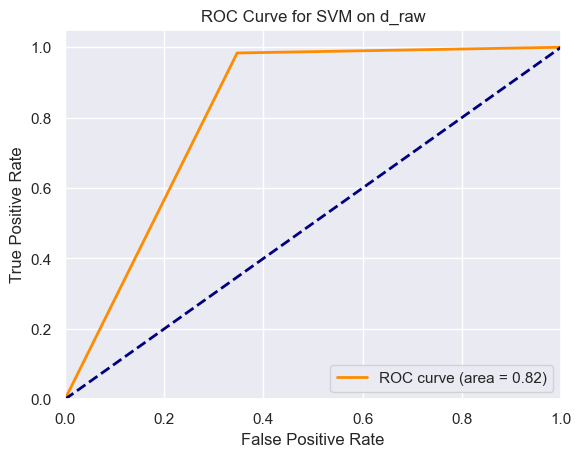

In [608]:
plot_roc_curve(test_target, svm_d_raw_preds, title='ROC Curve for SVM on d_raw')

### d_raw_probs

In [609]:
svm_d_raw_probs_preds = SVM_model(d_raw_probs_train, d_raw_probs_test)

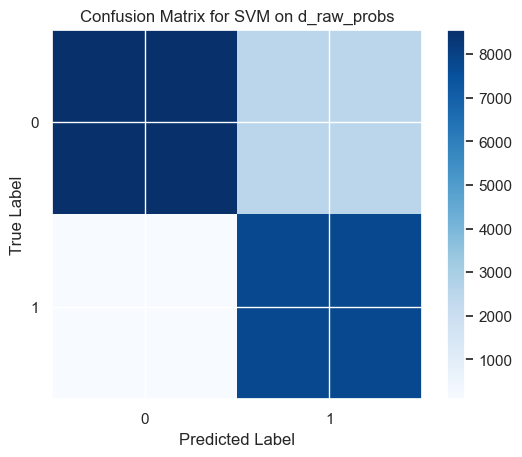

In [610]:
plot_confusion_matrix(test_target, svm_d_raw_probs_preds, title='Confusion Matrix for SVM on d_raw_probs')

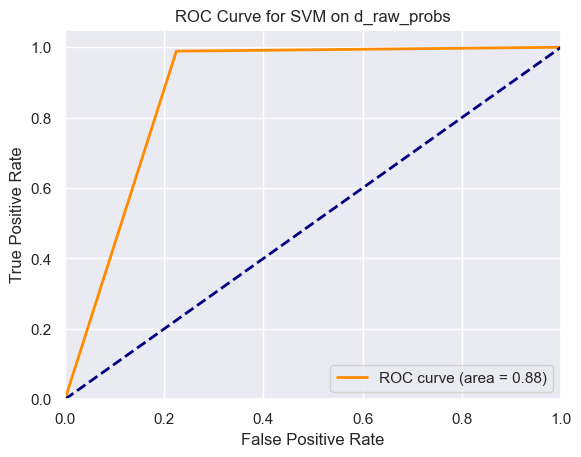

In [611]:
plot_roc_curve(test_target, svm_d_raw_probs_preds, title='ROC Curve for SVM on d_raw_probs')

### d_raw_pca

In [612]:
svm_d_raw_pca_preds = SVM_model(d_raw_pca_train, d_raw_pca_test)

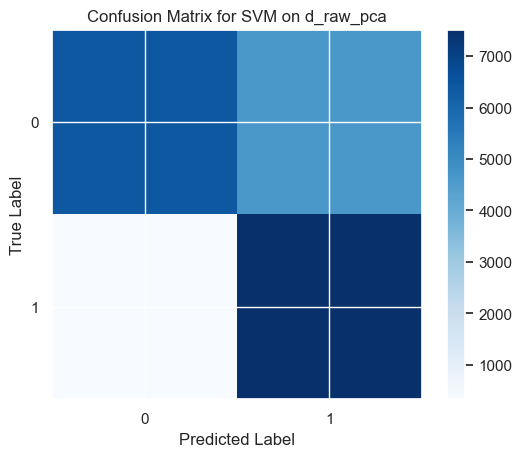

In [613]:
plot_confusion_matrix(test_target, svm_d_raw_pca_preds, title='Confusion Matrix for SVM on d_raw_pca')

In [614]:
plot_roc_curve(test_target, svm_d_raw_pca_preds, title='ROC Curve for SVM on d_raw_pca')

### d_raw_pca_probs

In [615]:
svm_d_raw_pca_probs_preds = SVM_model(d_raw_pca_probs_train, d_raw_pca_probs_test)

In [616]:
plot_confusion_matrix(test_target, svm_d_raw_pca_probs_preds, title='Confusion Matrix for SVM on d_raw_pca_probs')

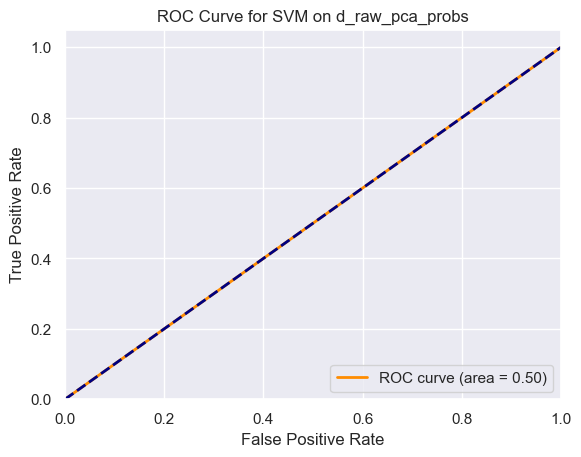

In [617]:
plot_roc_curve(test_target, svm_d_raw_pca_probs_preds, title='ROC Curve for SVM on d_raw_pca_probs')

### d_norm

In [618]:
svm_d_norm_preds = SVM_model(d_norm_train, d_norm_test)

In [619]:
plot_confusion_matrix(test_target, svm_d_norm_preds, title='Confusion Matrix for SVM on d_norm')

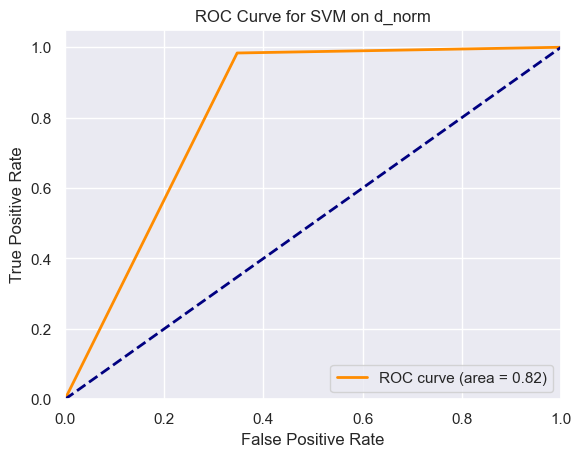

In [620]:
plot_roc_curve(test_target, svm_d_norm_preds, title='ROC Curve for SVM on d_norm')

### d_norm_probs

In [622]:
svm_d_norm_probs_preds = SVM_model(d_norm_probs_train, d_norm_probs_test)

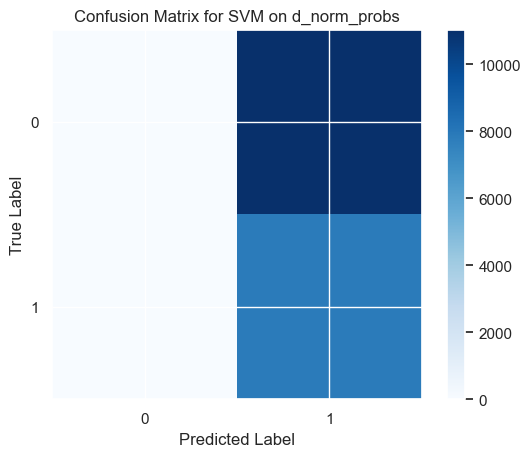

In [623]:
plot_confusion_matrix(test_target, svm_d_norm_probs_preds, title='Confusion Matrix for SVM on d_norm_probs')

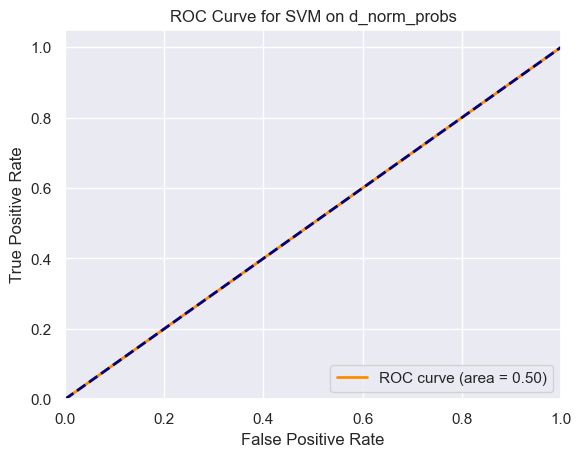

In [624]:
plot_roc_curve(test_target, svm_d_norm_probs_preds, title='ROC Curve for SVM on d_norm_probs')

### d_norm_pca

In [625]:
svm_d_norm_pca_preds = SVM_model(d_norm_pca_train, d_norm_pca_test)

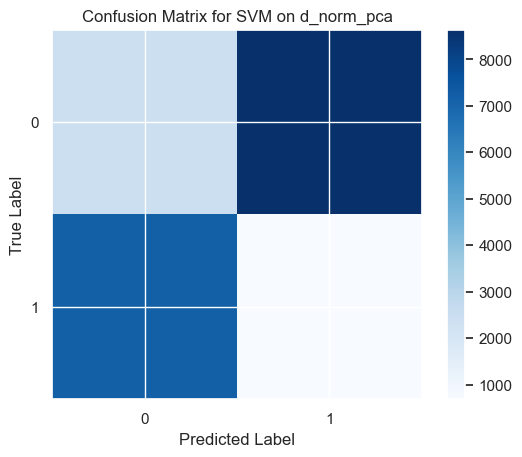

In [626]:
plot_confusion_matrix(test_target, svm_d_norm_pca_preds, title='Confusion Matrix for SVM on d_norm_pca')

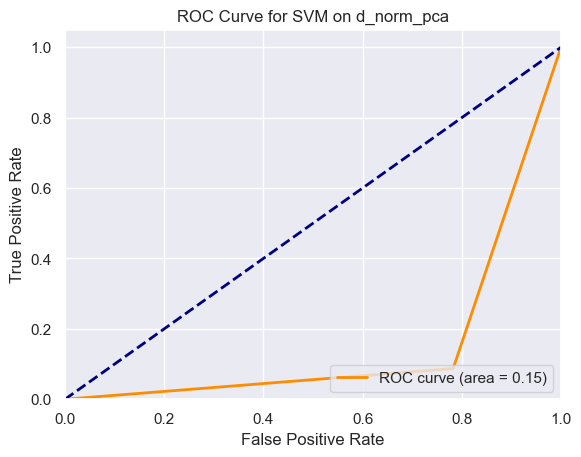

In [627]:
plot_roc_curve(test_target, svm_d_norm_pca_preds, title='ROC Curve for SVM on d_norm_pca')

### d_norm_pca_probs

In [628]:
svm_d_norm_pca_probs_preds = SVM_model(d_norm_pca_probs_train, d_norm_pca_probs_test)

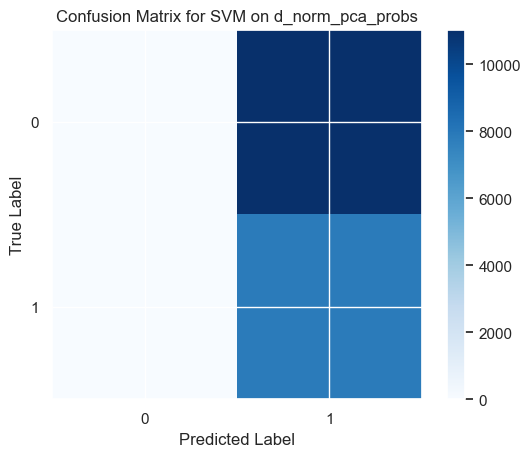

In [629]:
plot_confusion_matrix(test_target, svm_d_norm_pca_probs_preds, title='Confusion Matrix for SVM on d_norm_pca_probs')

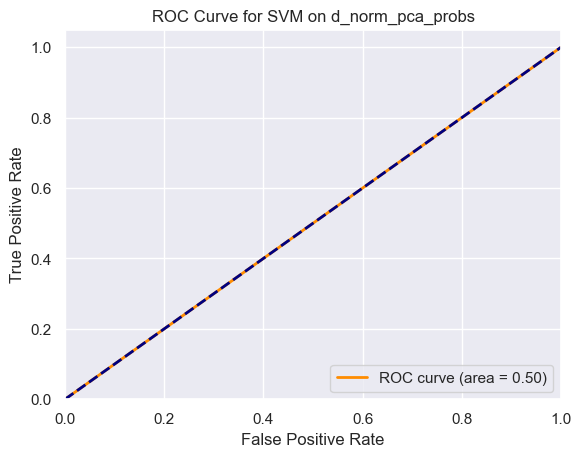

In [630]:
plot_roc_curve(test_target, svm_d_norm_pca_probs_preds, title='ROC Curve for SVM on d_norm_pca_probs')

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- SVM is acting strong on half of the datasets. Further models application will tell us which datasets have the same problem with all the models.
- We considered hyperparameter tuning using GridSearch but it took a lot of time to compile.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Multi Layer Perceptron</p>

We will create a simple multilayer perceptron model with a hidden layer of 100 neurons and an output layer with 2 cells: attack or non-attack. We defined a simple function that takes a standard MLPClassfier sklearn class with 300 max iterations as a parameter.

In [631]:
def mlp_model(train_data, test_data):
    model = MLPClassifier(max_iter=300).fit(train_data, train_target)
    preds = model.predict(test_data)
    return preds

### d_raw

In [632]:
mlp_d_raw_preds = mlp_model(d_raw_train, d_raw_test)

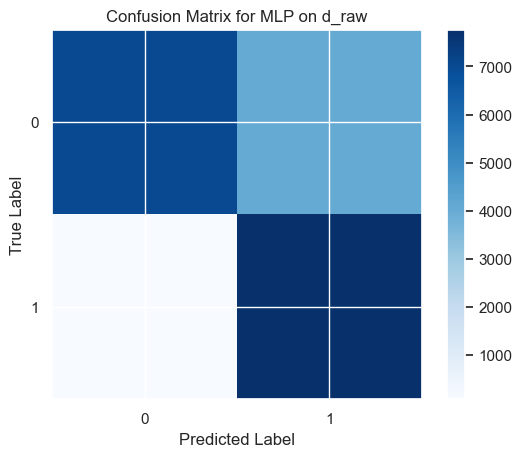

In [633]:
plot_confusion_matrix(test_target, mlp_d_raw_preds, title='Confusion Matrix for MLP on d_raw')

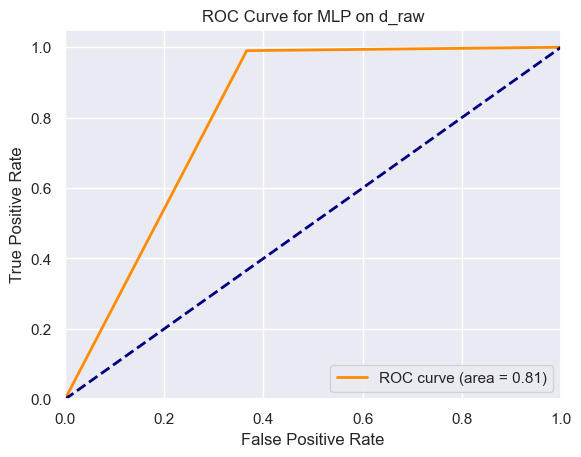

In [634]:
plot_roc_curve(test_target, mlp_d_raw_preds, title='ROC Curve for MLP on d_raw')

### d_raw_probs

In [635]:
mlp_d_raw_probs_preds = mlp_model(d_raw_probs_train, d_raw_probs_test)

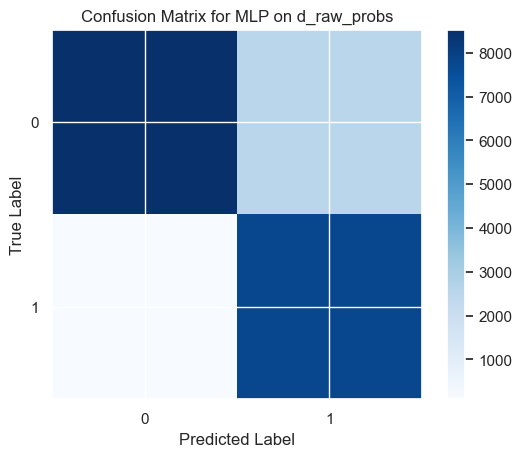

In [636]:
plot_confusion_matrix(test_target, mlp_d_raw_probs_preds, title='Confusion Matrix for MLP on d_raw_probs')

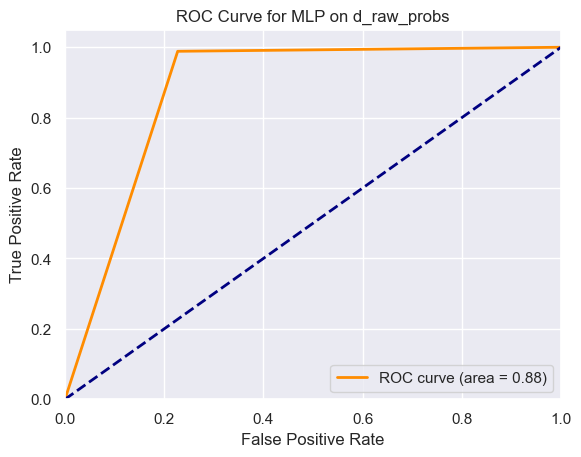

In [637]:
plot_roc_curve(test_target, mlp_d_raw_probs_preds, title='ROC Curve for MLP on d_raw_probs')

### d_raw_pca

In [638]:
mlp_d_raw_pca_preds = mlp_model(d_raw_pca_train, d_raw_pca_test)

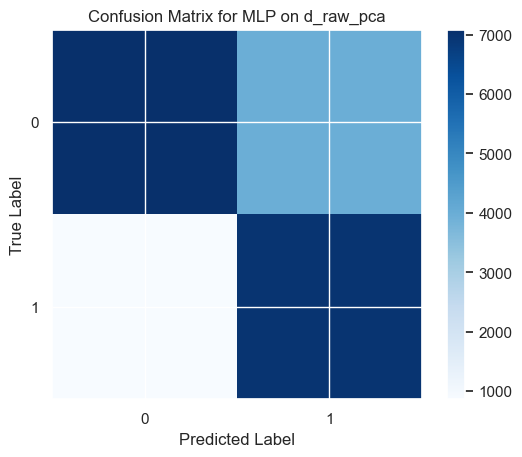

In [639]:
plot_confusion_matrix(test_target, mlp_d_raw_pca_preds, title='Confusion Matrix for MLP on d_raw_pca')

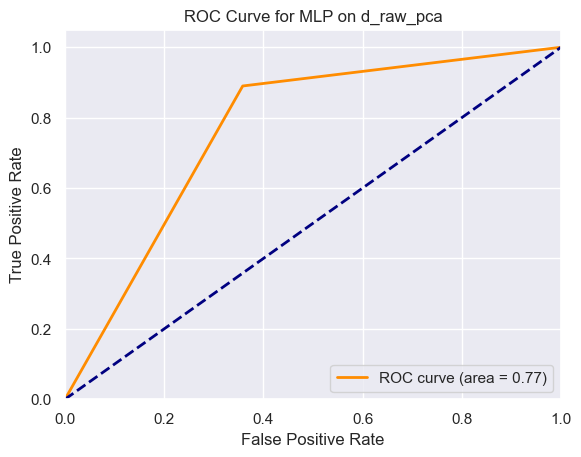

In [640]:
plot_roc_curve(test_target, mlp_d_raw_pca_preds, title='ROC Curve for MLP on d_raw_pca')

### d_raw_pca_probs

In [641]:
mlp_d_raw_pca_probs_preds = mlp_model(d_raw_pca_probs_train, d_raw_pca_probs_test)

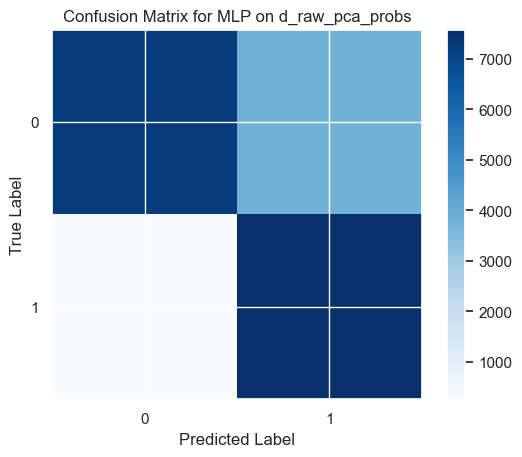

In [642]:
plot_confusion_matrix(test_target, mlp_d_raw_pca_probs_preds, title='Confusion Matrix for MLP on d_raw_pca_probs')

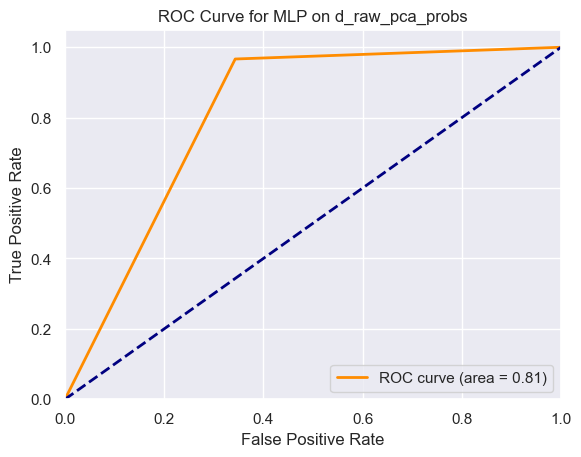

In [643]:
plot_roc_curve(test_target, mlp_d_raw_pca_probs_preds, title='ROC Curve for MLP on d_raw_pca_probs')

### d_norm

In [644]:
mlp_d_norm_preds = mlp_model(d_norm_train, d_norm_test)

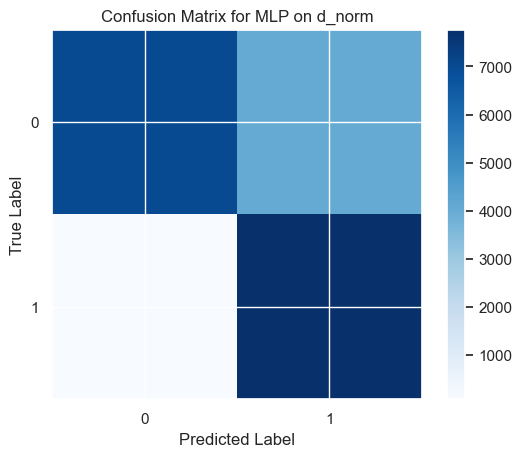

In [645]:
plot_confusion_matrix(test_target, mlp_d_norm_preds, title='Confusion Matrix for MLP on d_norm')

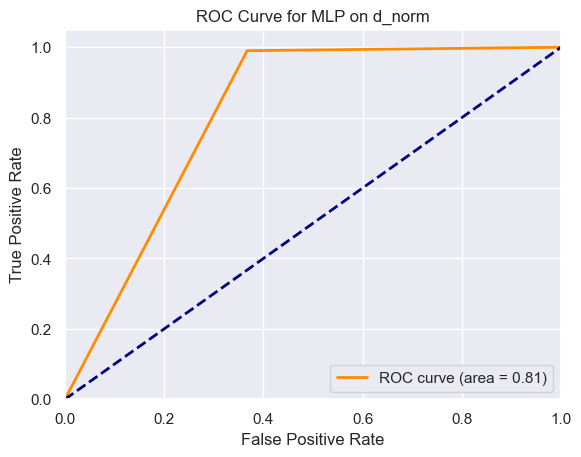

In [646]:
plot_roc_curve(test_target, mlp_d_norm_preds, title='ROC Curve for MLP on d_norm')

### d_norm_probs

In [647]:
mlp_d_norm_probs_preds = mlp_model(d_norm_probs_train, d_norm_probs_test)

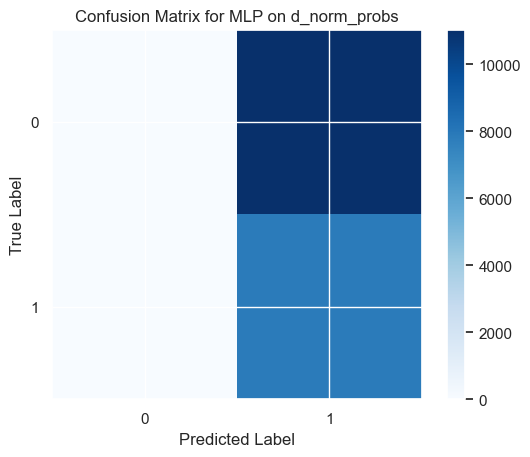

In [648]:
plot_confusion_matrix(test_target, mlp_d_norm_probs_preds, title='Confusion Matrix for MLP on d_norm_probs')

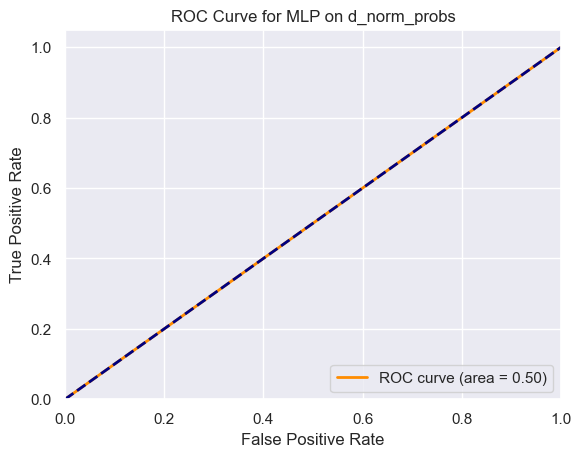

In [649]:
plot_roc_curve(test_target, mlp_d_norm_probs_preds, title='ROC Curve for MLP on d_norm_probs')

### d_norm_pca

In [650]:
mlp_d_norm_pca_preds = mlp_model(d_norm_pca_train, d_norm_pca_test)

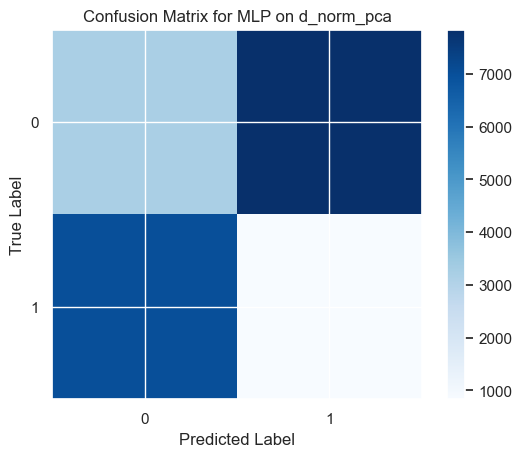

In [651]:
plot_confusion_matrix(test_target, mlp_d_norm_pca_preds, title='Confusion Matrix for MLP on d_norm_pca')

In [652]:
plot_roc_curve(test_target, mlp_d_norm_pca_preds, title='ROC Curve for MLP on d_norm_pca')

### d_norm_pca_probs

In [653]:
mlp_d_norm_pca_probs_preds = mlp_model(d_norm_pca_probs_train, d_norm_pca_probs_test)

In [654]:
plot_confusion_matrix(test_target, mlp_d_norm_pca_probs_preds, title='Confusion Matrix for MLP on d_norm_pca_probs')

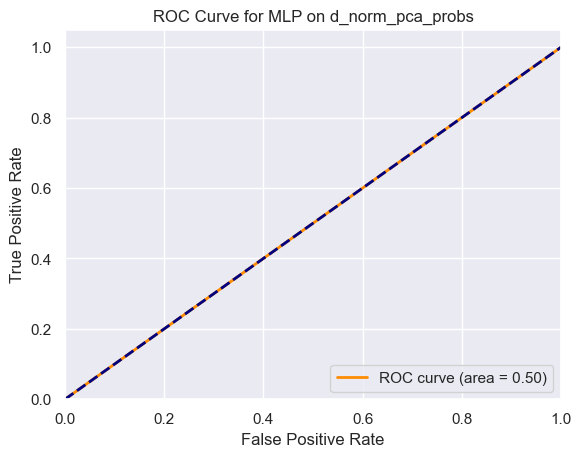

In [655]:
plot_roc_curve(test_target, mlp_d_norm_pca_probs_preds, title='ROC Curve for MLP on d_norm_pca_probs')

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Until now, we think Mlp has the best average score on all the datasets. It performs well in almost all of them.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">K-Means (euclidean distance)</p>

We will use the well known K-Means algorithm using the anomaly detection approach with the squared euclidean distances. 
We defined a function that manually calculates the distance between a point and a cluster center.

In [566]:
def K_means_Distance(test_idx, test_data, model):
    c1 = np.array(test_data.iloc[test_idx,:])
    c2 = model.cluster_centers_[0]
    temp = c1 - c2
    euclid_dist = np.sqrt(np.dot(temp.T, temp))
    euclid_dist
    return euclid_dist

In [567]:
def kmd_model(test_data, train_data, model, threshold_dis):
    kmd_d_raw_preds  = [] 
    for idx in tqdm(range(len(test_data))):
        dis = K_means_Distance(idx, test_data, model)
        if dis > threshold_dis:
            kmd_d_raw_preds.append(1)
        else:
            kmd_d_raw_preds.append(0)
    return kmd_d_raw_preds

### d_raw

In [568]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_raw_train_normal)
kmd_d_raw_preds = kmd_model( d_raw_test, d_raw_train_normal, kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 17665.05it/s]


In [569]:
plot_roc_curve(test_target, kmd_d_raw_preds, title='ROC Curve for K-means-D on d_raw')

### d_raw_probs

In [803]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_raw_probs_train_normal)
kmd_d_raw_probs_preds = kmd_model( d_raw_probs_test, d_raw_probs_train_normal, kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 11829.89it/s]


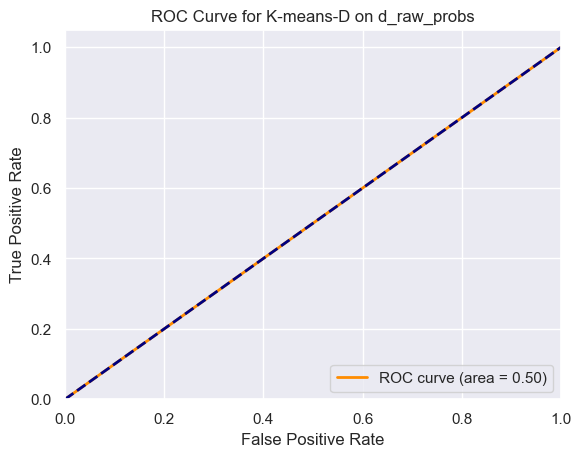

In [804]:
plot_roc_curve(test_target, kmd_d_raw_probs_preds, title='ROC Curve for K-means-D on d_raw_probs')

### d_raw_pca

In [572]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_raw_pca_train_normal)
kmd_d_raw_pca_preds = kmd_model( d_raw_pca_test, d_raw_pca_train_normal, kmeans, 0.8)

100%|██████████| 18880/18880 [00:00<00:00, 29256.02it/s]


In [573]:
plot_roc_curve(test_target, kmd_d_raw_pca_preds, title='ROC Curve for K-means-D on d_raw_pca')

### d_raw_pca_probs

In [574]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_raw_pca_probs_train_normal)
kmd_d_raw_pca_probs_preds = kmd_model( d_raw_pca_probs_test, d_raw_pca_probs_train_normal, kmeans, 0.8)

100%|██████████| 18880/18880 [00:00<00:00, 30310.85it/s]


In [575]:
plot_roc_curve(test_target, kmd_d_raw_pca_probs_preds, title='ROC Curve for K-means-D on d_raw_pca_probs')

### d_norm

In [576]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_norm_train_normal)
kmd_d_norm_preds = kmd_model( d_norm_test, d_norm_train_normal, kmeans, 0.8)

100%|██████████| 18880/18880 [00:01<00:00, 17973.23it/s]


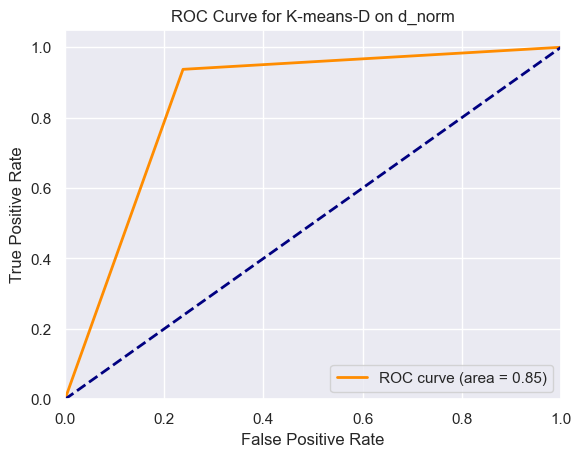

In [577]:
plot_roc_curve(test_target, kmd_d_norm_preds, title='ROC Curve for K-means-D on d_norm')

### d_norm_probs

In [578]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_norm_probs_train_normal)
kmd_d_norm_probs_preds = kmd_model( d_norm_probs_test, d_norm_probs_train_normal, kmeans, 0.8)

100%|██████████| 18880/18880 [00:00<00:00, 29128.16it/s]


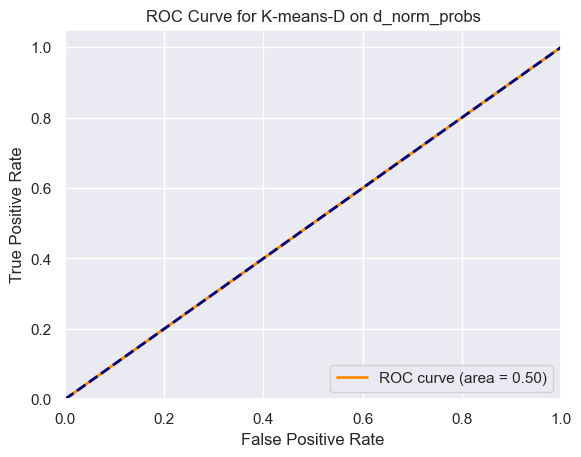

In [579]:
plot_roc_curve(test_target, kmd_d_norm_probs_preds, title='ROC Curve for K-means-D on d_norm_probs')

### d_norm_pca

In [580]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_norm_pca_train_normal)
kmd_d_norm_pca_preds = kmd_model( d_norm_pca_test, d_norm_pca_train_normal, kmeans, 0.8)

100%|██████████| 18880/18880 [00:00<00:00, 28628.90it/s]


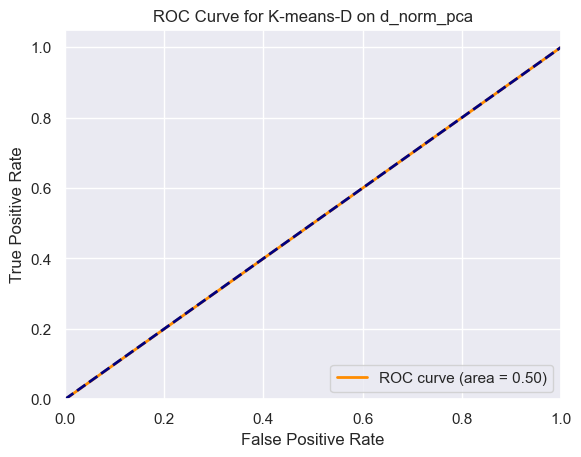

In [581]:
plot_roc_curve(test_target, kmd_d_norm_pca_preds, title='ROC Curve for K-means-D on d_norm_pca')

### d_norm_pca_probs

In [582]:
kmeans = KMeans(n_clusters=1, random_state=0, n_init="auto").fit(d_norm_pca_probs_train_normal)
kmd_d_norm_pca_probs_preds = kmd_model( d_norm_pca_probs_test, d_norm_pca_probs_train_normal, kmeans, 0.8)

100%|██████████| 18880/18880 [00:00<00:00, 29242.50it/s]


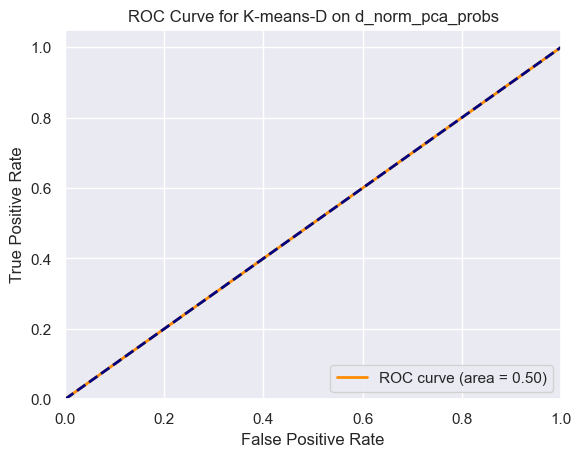

In [583]:
plot_roc_curve(test_target, kmd_d_norm_pca_probs_preds, title='ROC Curve for K-means-D on d_norm_pca_probs')

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- K-Means-D is one of our worst performing models. It is showing good result in only 2 datasets. We should either change the model parameters like distance threshold or generate newer datasets.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">K-Means (standard)</p>

We will be applying K-Means algorithm in its standard clustering approach on each of the generated datasets.

In [585]:
def kmean_C_model(train_data, test_data):
    kmeans = KMeans(n_clusters=2,init='random', n_init=3, max_iter=300, random_state=None).fit(train_data)
    preds = kmeans.predict(test_data)
    return preds

### d_raw

In [586]:
kmean_d_raw_preds = kmean_C_model(d_raw_train, d_raw_test)

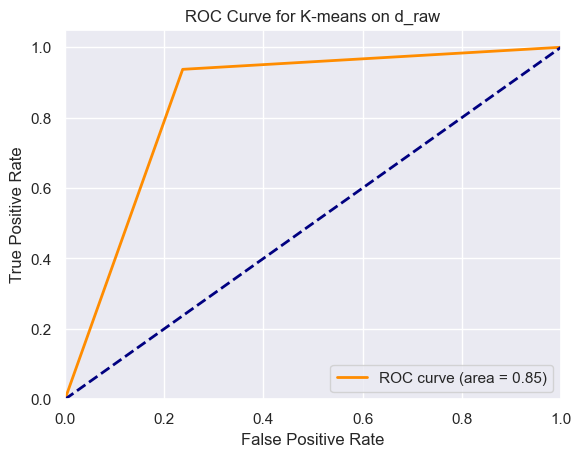

In [587]:
plot_roc_curve(test_target, kmean_d_raw_preds, title='ROC Curve for K-means on d_raw')

### d_raw_probs

In [588]:
kmean_d_raw_probs_preds = kmean_C_model(d_raw_probs_train, d_raw_probs_test)

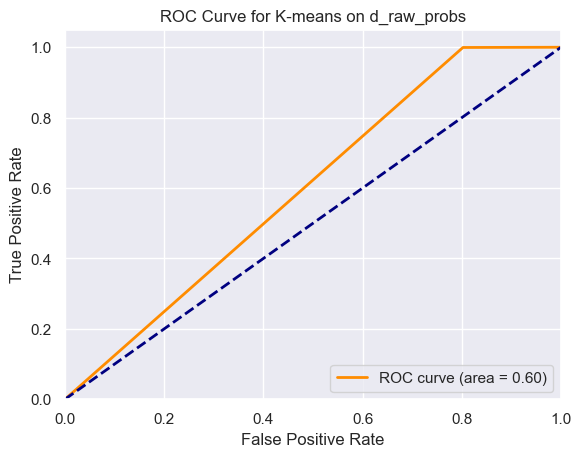

In [589]:
plot_roc_curve(test_target, kmean_d_raw_probs_preds, title='ROC Curve for K-means on d_raw_probs')

### d_raw_pca

In [590]:
kmean_d_raw_pca_preds = kmean_C_model(d_raw_pca_train, d_raw_pca_test)

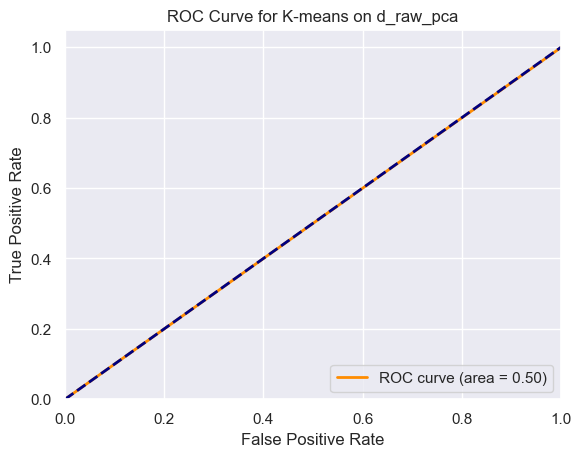

In [591]:
plot_roc_curve(test_target, kmean_d_raw_pca_preds, title='ROC Curve for K-means on d_raw_pca')

### d_raw_pca_probs

In [592]:
kmean_d_raw_pca_probs_preds = kmean_C_model(d_raw_pca_probs_train, d_raw_pca_probs_test)

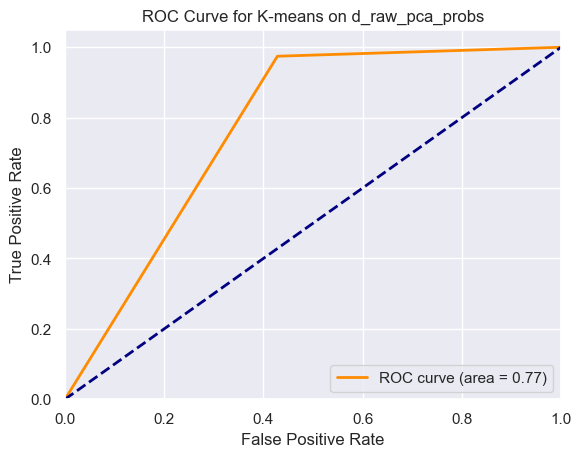

In [593]:
plot_roc_curve(test_target, kmean_d_raw_pca_probs_preds, title='ROC Curve for K-means on d_raw_pca_probs')

### d_norm

In [594]:
kmean_d_norm_preds = kmean_C_model(d_norm_train, d_norm_test)

In [595]:
plot_roc_curve(test_target, kmean_d_norm_preds, title='ROC Curve for K-means on d_norm')

### d_norm_probs

In [596]:
kmean_d_norm_probs_preds = kmean_C_model(d_norm_probs_train, d_norm_probs_test)

In [597]:
plot_roc_curve(test_target, kmean_d_norm_probs_preds, title='ROC Curve for K-means on d_norm_probs')

### d_norm_pca

In [598]:
kmean_d_norm_pca_preds = kmean_C_model(d_norm_pca_train, d_norm_pca_test)

In [600]:
plot_roc_curve(test_target, kmean_d_norm_pca_preds, title='ROC Curve for K-means on d_norm_pca')

### d_norm_pca_probs

In [601]:
kmean_d_norm_pca_probs_preds = kmean_C_model(d_norm_pca_probs_train, d_norm_pca_probs_test)

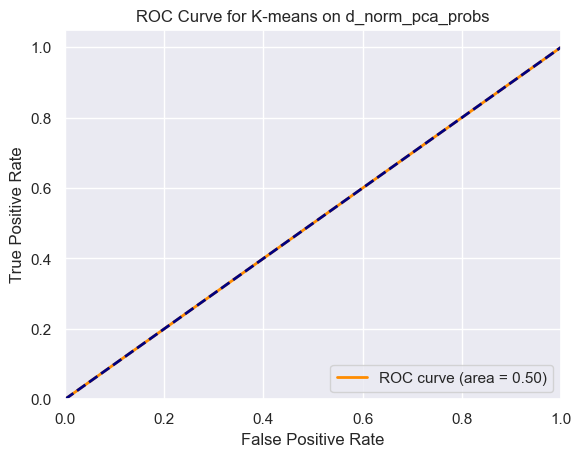

In [602]:
plot_roc_curve(test_target, kmean_d_norm_pca_probs_preds, title='ROC Curve for K-means on d_norm_pca_probs')

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- We can see that see that standard kmeans is fitting good to half of the datasets. We have to consider a major change to the parameters after.
- I think d_norm_probs and d_norm_pca has a universal problem between all the models. We will confirm it by using other metrics in later evaluations.

<a id="1"></a> 
# <p style="padding:15px;background-color:#283149;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:500">Evaluation</p> 

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
**Evaluation** is the process that uses some metrics which help us to analyze the performance of the model. This Evaluation approach assists us in determining which algorithm best matches the provided dataset for addressing a certain problem.

Before proceeding with the evaluation metrics, we gave a simple name to each generated dataset:

* El: d_norm
* E2: d_norm_probs
* E3: d_norm_pca
* E4: d_norm_pca_probs
* E5: d_raw
* E6: d_raw_probs
* E7: d_raw_pca
* E8: d_raw_pca_probs

The metric we'll be using at first is f1 score.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">F1 Score</p>

<div style="background-color:#DBEDF3; padding:20px; font-size:15px">
    
**F1 score** is a machine learning evaluation metric that measures a model’s accuracy. It combines the precision and recall scores of a model.

We defined a simple function that uses the f1_score class.

In [656]:
def f1(y_true, y_pred):
    return f1_score(y_true, y_pred)

We will be applying f1 score to each model on every generated dataset. We will follow the order of dataset list provided above.

### E1

#### K-Means-D

In [327]:
f1_kmd_d_norm = f1(test_target, kmd_d_norm_preds)
f1_kmd_d_norm

0.8250084184532496

#### SVM

In [525]:
f1_svm_d_norm = f1(test_target, svm_d_norm_preds)
f1_svm_d_norm

0.7957909939650281

#### K-Means-C

In [328]:
f1_kmean_d_norm = f1(test_target, kmean_d_norm_preds)
f1_kmean_d_norm

0.8253326595923867

#### DT

In [492]:
f1_dt_d_norm = f1(test_target, dt_d_norm_preds)
f1_dt_d_norm

0.8067077630341656

#### MLP

In [309]:
f1_mlp_d_norm = f1(test_target, mlp_d_norm_preds)
f1_mlp_d_norm

0.8050046724120029

### E2

#### Voting

In [657]:
f1_voting_d_norm_probs = f1(test_target, voting_d_norm_probs_preds)
f1_voting_d_norm_probs

0.5869321158595914

#### K-Means-D

In [405]:
f1_kmd_d_norm_probs = f1(test_target, kmd_d_norm_probs_preds)
f1_kmd_d_norm_probs

0.5869321158595914

#### SVM

In [658]:
f1_svm_d_norm_probs = f1(test_target, svm_d_norm_probs_preds)
f1_svm_d_norm_probs

0.5869321158595914

#### K-Means-C

In [659]:
f1_kmean_d_norm_probs = f1(test_target, kmean_d_norm_probs_preds)
f1_kmean_d_norm_probs

0.5869321158595914

#### DT

In [660]:
f1_dt_d_norm_probs = f1(test_target, dt_d_norm_probs_preds)
f1_dt_d_norm_probs

0.5869321158595914

#### MLP

In [382]:
f1_mlp_d_norm_probs = f1(test_target, mlp_d_norm_probs_preds)
f1_mlp_d_norm_probs

0.5869321158595914

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Our hyptohesis is confirmed. d_norm_probs is showing the same f1 score results between all the models. We might reconsider generating again this dataset.

### E3

#### K-Means-D

In [762]:
f1_kmd_d_norm_pca = f1(test_target, kmd_d_norm_pca_preds)
f1_kmd_d_norm_pca

0.00025477707006369424

#### SVM

In [662]:
f1_svm_d_norm_pca = f1(test_target, svm_d_norm_pca_preds)
f1_svm_d_norm_pca

0.07970170123514332

#### K-Means-C

In [761]:
f1_kmean_d_norm_pca = f1(test_target, kmean_d_norm_pca_preds)
f1_kmean_d_norm_pca

0.058735748821106666

#### DT

In [335]:
f1_dt_d_norm_pca = f1(test_target, dt_d_norm_pca_preds)
f1_dt_d_norm_pca

0.6066259247346413

#### MLP

In [763]:
f1_mlp_d_norm_pca = f1(test_target, mlp_d_norm_pca_preds)
f1_mlp_d_norm_pca

0.10100520770255542

### E4

#### Voting

In [685]:
f1_voting_d_norm_pca_probs = f1(test_target, voting_d_norm_pca_probs_preds)
f1_voting_d_norm_pca_probs

0.5869321158595914

#### K-Means-D

In [684]:
f1_kmd_d_norm_pca_probs = f1(test_target, kmd_d_norm_pca_probs_preds)
f1_kmd_d_norm_pca_probs

0.5869321158595914

#### SVM

In [683]:
f1_svm_d_norm_pca_probs = f1(test_target, svm_d_norm_pca_probs_preds)
f1_svm_d_norm_pca_probs

0.5869321158595914

#### K-Means-C

In [337]:
f1_kmean_d_norm_pca_probs = f1(test_target, kmean_d_norm_pca_probs_preds)
f1_kmean_d_norm_pca_probs

0.8253326595923867

#### DT

In [688]:
f1_dt_d_norm_pca_probs = f1(test_target, dt_d_norm_pca_probs_preds)
f1_dt_d_norm_pca_probs

0.0

#### MLP

In [682]:
f1_mlp_d_norm_pca_probs = f1(test_target, mlp_d_norm_pca_probs_preds)
f1_mlp_d_norm_pca_probs

0.5869321158595914

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- Our hyptohesis is confirmed. d_norm_pca is showing the same f1 score results between all the models. We might reconsider generating again this dataset.

### E5

#### K-Means-D

In [339]:
f1_kmd_d_raw= f1(test_target, kmd_d_raw_preds)
f1_kmd_d_raw

0.8250084184532496

#### SVM

In [320]:
f1_svm_d_raw= f1(test_target, svm_d_raw_preds)
f1_svm_d_raw

0.7957909939650281

#### K-Means-C

In [340]:
f1_kmean_d_raw= f1(test_target, kmean_d_raw_preds)
f1_kmean_d_raw

0.8253326595923867

#### DT

In [341]:
f1_dt_d_raw= f1(test_target, dt_d_raw_preds)
f1_dt_d_raw

0.8064347644416588

#### MLP

In [323]:
f1_mlp_d_raw= f1(test_target, mlp_d_raw_preds)
f1_mlp_d_raw

0.7850788515972503

### E6

#### Voting

In [668]:
f1_voting_d_raw_probs = f1(test_target, voting_d_raw_probs_preds)
f1_voting_d_raw_probs

0.5879221801551899

#### K-Means-D

In [410]:
f1_kmd_d_raw_probs = f1(test_target, kmd_d_raw_probs_preds)
f1_kmd_d_raw_probs

0.5869321158595914

#### SVM

In [326]:
f1_svm_d_raw_probs = f1(test_target, svm_d_raw_probs_preds)
f1_svm_d_raw_probs

0.7775002497752023

#### K-Means-C

In [669]:
f1_kmean_d_raw_probs = f1(test_target, kmean_d_raw_probs_preds)
f1_kmean_d_raw_probs

0.6388424699409008

#### DT

In [670]:
f1_dt_d_raw_probs = f1(test_target, dt_d_raw_probs_preds)
f1_dt_d_raw_probs

0.871355827877567

#### MLP

In [329]:
f1_mlp_d_raw_probs = f1(test_target, mlp_d_raw_probs_preds)
f1_mlp_d_raw_probs

0.7509386733416771

### E7

#### K-Means-D

In [413]:
f1_kmd_d_raw_pca = f1(test_target, kmd_d_raw_pca_preds)
f1_kmd_d_raw_pca

0.5869321158595914

#### SVM

In [331]:
f1_svm_d_raw_pca = f1(test_target, svm_d_raw_pca_preds)
f1_svm_d_raw_pca

0.7517006802721088

#### K-Means-C

In [414]:
f1_kmean_d_raw_pca = f1(test_target, kmean_d_raw_pca_preds)
f1_kmean_d_raw_pca

0.5865838137306282

#### DT

In [347]:
f1_dt_d_raw_pca = f1(test_target, dt_d_raw_pca_preds)
f1_dt_d_raw_pca

0.7641925777331997

#### MLP

In [334]:
f1_mlp_d_raw_pca = f1(test_target, mlp_d_raw_pca_preds)
f1_mlp_d_raw_pca

0.7748806060273371

### E8

#### Voting

In [680]:
f1_voting_d_raw_pca_probs = f1(test_target, voting_d_raw_pca_probs_preds)
f1_voting_d_raw_pca_probs

0.5869321158595914

#### K-Means-D

In [679]:
f1_kmd_d_raw_pca_probs = f1(test_target, kmd_d_raw_pca_probs_preds)
f1_kmd_d_raw_pca_probs

0.5869321158595914

#### SVM

In [678]:
f1_svm_d_raw_pca_probs = f1(test_target, svm_d_raw_pca_probs_preds)
f1_svm_d_raw_pca_probs

0.5869321158595914

#### K-Means-C

In [675]:
f1_kmean_d_raw_pca_probs = f1(test_target, kmean_d_raw_pca_probs_preds)
f1_kmean_d_raw_pca_probs

0.756221859383504

#### DT

In [676]:
f1_dt_d_raw_pca_probs = f1(test_target, dt_d_raw_pca_probs_preds)
f1_dt_d_raw_pca_probs

0.7412748774156331

#### MLP

In [677]:
f1_mlp_d_raw_pca_probs = f1(test_target, mlp_d_raw_pca_probs_preds)
f1_mlp_d_raw_pca_probs

0.7891723060905778

As a next metric, we'll be using CAP (Intrusion Detection Capacity).

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">CAP</p>

CAP is a more complex and sensitive metric that relates the PPV (Positive Predictive Value) and NPV (Negative Predictive Value) with B (Attack percentage in the whole testing dataset) and gives a very accurate idea of the complete performance of the model.

We defined a function to summarize the cap method.

In [689]:
def cap(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    tn = sum((y_true == 0) & (y_pred == 0))
    fp = sum((y_true == 0) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    tnr = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    if isinstance(y_pred, bool):
        attack_percentage = int(y_pred)
    else:
        attack_percentage = sum(y_pred) / len(y_pred) if len(y_pred) > 0 else 0.0

    cap_score = (tpr + tnr) * (1 - abs(tpr - tnr)) * (1 - attack_percentage)

    return cap_score

### E1

#### K-Means-D

In [690]:
cap_kmd_d_norm = cap(test_target, kmd_d_norm_preds)
cap_kmd_d_norm

0.0

#### SVM

In [691]:
cap_svm_d_norm = cap(test_target, svm_d_norm_preds)
cap_svm_d_norm

0.42552902871356063

#### K-Means-C

In [353]:
cap_kmean_d_norm = cap(test_target, kmean_d_norm_preds)
cap_kmean_d_norm

0.6623246177179549

#### DT

In [354]:
cap_dt_d_norm = cap(test_target, dt_d_norm_preds)
cap_dt_d_norm

0.460739923746941

#### MLP

In [692]:
cap_mlp_d_norm = cap(test_target, mlp_d_norm_preds)
cap_mlp_d_norm

0.38999482408369274

### E2

#### Voting

In [694]:
cap_voting_d_norm_probs = cap(test_target, voting_d_norm_probs_preds)
cap_voting_d_norm_probs

0.0

#### K-Means-D

In [695]:
cap_kmd_d_norm_probs = cap(test_target, kmd_d_norm_probs_preds)
cap_kmd_d_norm_probs

0.0

#### SVM

In [696]:
cap_svm_d_norm_probs = cap(test_target, svm_d_norm_probs_preds)
cap_svm_d_norm_probs

0.0

#### K-Means-C

In [697]:
cap_kmean_d_norm_probs = cap(test_target, kmean_d_norm_probs_preds)
cap_kmean_d_norm_probs

0.0

#### DT

In [698]:
cap_dt_d_norm_probs = cap(test_target, dt_d_norm_probs_preds)
cap_dt_d_norm_probs

0.0

#### MLP

In [699]:
cap_mlp_d_norm_probs = cap(test_target, mlp_d_norm_probs_preds)
cap_mlp_d_norm_probs

0.0

### E3

#### K-Means-D

In [700]:
cap_kmd_d_norm_pca = cap(test_target, kmd_d_norm_pca_preds)
cap_kmd_d_norm_pca

0.0

#### SVM

In [701]:
cap_svm_d_norm_pca = cap(test_target, svm_d_norm_pca_preds)
cap_svm_d_norm_pca

0.134148668790163

#### K-Means-C

In [702]:
cap_kmean_d_norm_pca = cap(test_target, kmean_d_norm_pca_preds)
cap_kmean_d_norm_pca

0.13076333744787724

#### DT

In [703]:
cap_dt_d_norm_pca = cap(test_target, dt_d_norm_pca_preds)
cap_dt_d_norm_pca

0.09543097556333864

#### MLP

In [704]:
cap_mlp_d_norm_pca = cap(test_target, mlp_d_norm_pca_preds)
cap_mlp_d_norm_pca

0.17492122392367035

### E4

#### Voting

In [706]:
cap_voting_d_norm_pca_probs = cap(test_target, mlp_d_norm_pca_probs_preds)
cap_voting_d_norm_pca_probs

0.0

#### K-Means-D

In [707]:
cap_kmd_d_norm_pca_probs = cap(test_target, kmd_d_norm_pca_probs_preds)
cap_kmd_d_norm_pca_probs

0.0

#### SVM

In [708]:
cap_svm_d_norm_pca_probs = cap(test_target, svm_d_norm_pca_probs_preds)
cap_svm_d_norm_pca_probs

0.0

#### K-Means-C

In [711]:
cap_kmean_d_norm_pca_probs = cap(test_target, kmean_d_norm_pca_probs_preds)
cap_kmean_d_norm_pca_probs

0.0

#### DT

In [710]:
cap_dt_d_norm_pca_probs = cap(test_target, dt_d_norm_pca_probs_preds)
cap_dt_d_norm_pca_probs

0.0

#### MLP

In [709]:
cap_mlp_d_norm_pca_probs = cap(test_target, mlp_d_norm_pca_probs_preds)
cap_mlp_d_norm_pca_probs

0.0

### E5

#### K-Means-D

In [712]:
cap_kmd_d_raw = cap(test_target, kmd_d_raw_preds)
cap_kmd_d_raw

0.0

#### SVM

In [713]:
cap_svm_d_raw = cap(test_target, svm_d_raw_preds)
cap_svm_d_raw

0.42552902871356063

#### K-Means-C

In [714]:
cap_kmean_d_raw = cap(test_target, kmean_d_raw_preds)
cap_kmean_d_raw

0.6623246177179549

#### DT

In [223]:
cap_dt_d_raw = cap(test_target, dt_d_raw_preds)
cap_dt_d_raw

0.4577030199471644

#### MLP

In [715]:
cap_mlp_d_raw = cap(test_target, mlp_d_raw_preds)
cap_mlp_d_raw

0.39134623314208045

### E6

#### Voting

In [716]:
cap_voting_d_raw_probs = cap(test_target, voting_d_raw_probs_preds)
cap_voting_d_raw_probs

0.0

#### K-Means-D

In [717]:
cap_kmd_d_raw_probs = cap(test_target, kmd_d_raw_probs_preds)
cap_kmd_d_raw_probs

0.0

#### SVM

In [718]:
cap_svm_d_raw_probs = cap(test_target, svm_d_raw_probs_preds)
cap_svm_d_raw_probs

0.6356453868578117

#### K-Means-C

In [719]:
cap_kmean_d_raw_probs = cap(test_target, kmean_d_raw_probs_preds)
cap_kmean_d_raw_probs

0.02749916191258702

#### DT

In [720]:
cap_dt_d_raw_probs = cap(test_target, dt_d_raw_probs_preds)
cap_dt_d_raw_probs

0.6744958272275213

#### MLP

In [721]:
cap_mlp_d_raw_probs = cap(test_target, mlp_d_raw_probs_preds)
cap_mlp_d_raw_probs

0.6306691577455047

### E7

#### K-Means-D

In [722]:
cap_kmd_d_raw_pca = cap(test_target, kmd_d_raw_pca_preds)
cap_kmd_d_raw_pca

0.0

#### SVM

In [723]:
cap_svm_d_raw_pca = cap(test_target, svm_d_raw_pca_preds)
cap_svm_d_raw_pca

0.34094465796601064

#### K-Means-C

In [725]:
cap_kmean_d_raw_pca = cap(test_target, kmean_d_raw_pca_preds)
cap_kmean_d_raw_pca

4.1628685343619184e-07

#### DT

In [373]:
cap_dt_d_raw_pca = cap(test_target, dt_d_raw_pca_preds)
cap_dt_d_raw_pca

0.3502160567814432

#### MLP

In [726]:
cap_mlp_d_raw_pca = cap(test_target, mlp_d_raw_pca_preds)
cap_mlp_d_raw_pca

0.48458781302560316

### E8

#### Voting

In [727]:
cap_voting_d_raw_pca_probs = cap(test_target, voting_d_raw_pca_probs_preds)
cap_voting_d_raw_pca_probs

0.0

#### K-Means-D

In [728]:
cap_kmd_d_raw_pca_probs = cap(test_target, kmd_d_raw_pca_probs_preds)
cap_kmd_d_raw_pca_probs

0.0

#### SVM

In [729]:
cap_svm_d_raw_pca_probs = cap(test_target, svm_d_raw_pca_probs_preds)
cap_svm_d_raw_pca_probs

0.0

#### K-Means-C

In [730]:
cap_kmean_d_raw_pca_probs = cap(test_target, kmean_d_raw_pca_probs_preds)
cap_kmean_d_raw_pca_probs

0.31848235276564896

#### DT

In [731]:
cap_dt_d_raw_pca_probs = cap(test_target, dt_d_raw_pca_probs_preds)
cap_dt_d_raw_pca_probs

0.25582795169531264

#### MLP

In [732]:
cap_mlp_d_raw_pca_probs = cap(test_target, mlp_d_raw_pca_probs_preds)
cap_mlp_d_raw_pca_probs

0.44583819762078336

And finally we will conclude our evalution with the sensitivty metric.

<a id="1"></a>  
## <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Sensitivity</p>

In [733]:
def sensitivity(y_true, y_pred):
    tp = sum((y_true == 1) & (y_pred == 1))
    fn = sum((y_true == 1) & (y_pred == 0))

    sensitivity_score = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    return sensitivity_score

### E1

#### K-Means-D

In [734]:
sens_kmd_d_norm = sensitivity(test_target, kmd_d_norm_preds)
sens_kmd_d_norm

0.0

#### SVM

In [343]:
sens_svm_d_norm = sensitivity(test_target, svm_d_norm_preds)
sens_svm_d_norm

0.9836776332568222

#### K-Means-C

In [378]:
sens_kmean_d_norm = sensitivity(test_target, kmean_d_norm_preds)
sens_kmean_d_norm

0.9372609028309105

#### DT

In [473]:
sens_dt_d_norm = sensitivity(test_target, dt_d_norm_preds)
sens_dt_d_norm

0.9855904106095383

#### MLP

In [346]:
sens_mlp_d_norm = sensitivity(test_target, mlp_d_norm_preds)
sens_mlp_d_norm

0.9886508543738842

### E2

#### Voting

In [735]:
sens_voting_d_norm_probs = sensitivity(test_target, voting_d_norm_probs_preds)
sens_voting_d_norm_probs

0.0

#### K-Means-D

In [736]:
sens_kmd_d_norm_probs = sensitivity(test_target, kmd_d_norm_probs_preds)
sens_kmd_d_norm_probs

0.0

#### SVM

In [737]:
sens_svm_d_norm_probs = sensitivity(test_target, svm_d_norm_probs_preds)
sens_svm_d_norm_probs

1.0

#### K-Means-C

In [738]:
sens_kmean_d_norm_probs = sensitivity(test_target, kmean_d_norm_probs_preds)
sens_kmean_d_norm_probs

1.0

#### DT

In [739]:
sens_dt_d_norm_probs = sensitivity(test_target, dt_d_norm_probs_preds)
sens_dt_d_norm_probs

1.0

#### MLP

In [740]:
sens_mlp_d_norm_probs = sensitivity(test_target, mlp_d_norm_probs_preds)
sens_mlp_d_norm_probs

1.0

### E3

#### K-Means-D

In [741]:
sens_kmd_d_norm_pca = sensitivity(test_target, kmd_d_norm_pca_preds)
sens_kmd_d_norm_pca

0.0

#### SVM

In [742]:
sens_svm_d_norm_pca = sensitivity(test_target, svm_d_norm_pca_preds)
sens_svm_d_norm_pca

0.08722264728385616

#### K-Means-C

In [743]:
sens_kmean_d_norm_pca = sensitivity(test_target, kmean_d_norm_pca_preds)
sens_kmean_d_norm_pca

0.06273909716908951

#### DT

In [384]:
sens_dt_d_norm_pca = sensitivity(test_target, dt_d_norm_pca_preds)
sens_dt_d_norm_pca

0.8417495536852844

#### MLP

In [744]:
sens_mlp_d_norm_pca = sensitivity(test_target, mlp_d_norm_pca_preds)
sens_mlp_d_norm_pca

0.1063504208110176

### E4

#### Voting

In [745]:
sens_voting_d_norm_pca_probs = sensitivity(test_target, voting_d_norm_pca_probs_preds)
sens_voting_d_norm_pca_probs

0.0

#### K-Means-D

In [746]:
sens_kmd_d_norm_pca_probs = sensitivity(test_target, kmd_d_norm_pca_probs_preds)
sens_kmd_d_norm_pca_probs

0.0

#### SVM

In [747]:
sens_svm_d_norm_pca_probs = sensitivity(test_target, svm_d_norm_pca_probs_preds)
sens_svm_d_norm_pca_probs

1.0

#### K-Means-C

In [482]:
sens_kmean_d_norm_pca_probs = sensitivity(test_target, kmean_d_norm_pca_probs_preds)
sens_kmean_d_norm_pca_probs

0.9372609028309105

#### DT

In [483]:
sens_dt_d_norm_pca_probs = sensitivity(test_target, dt_d_norm_pca_probs_preds)
sens_dt_d_norm_pca_probs

0.8657230298393267

#### MLP

In [749]:
sens_mlp_d_norm_pca_probs = sensitivity(test_target, mlp_d_norm_pca_probs_preds)
sens_mlp_d_norm_pca_probs

1.0

### E5

#### K-Means-D

In [750]:
sens_kmd_d_raw = sensitivity(test_target, kmd_d_raw_preds)
sens_kmd_d_raw

0.0

#### SVM

In [360]:
sens_svm_d_raw = sensitivity(test_target, svm_d_raw_preds)
sens_svm_d_raw

0.9836776332568222

#### K-Means-C

In [387]:
sens_kmean_d_raw = sensitivity(test_target, kmean_d_raw_preds)
sens_kmean_d_raw

0.9372609028309105

#### DT

In [388]:
sens_dt_d_raw = sensitivity(test_target, dt_d_raw_preds)
sens_dt_d_raw

0.9844427441979087

#### MLP

In [363]:
sens_mlp_d_raw = sensitivity(test_target, mlp_d_raw_preds)
sens_mlp_d_raw

0.9903085947462382

### E6

#### Voting

In [751]:
sens_voting_d_raw_probs = sensitivity(test_target, voting_d_raw_probs_preds)
sens_voting_d_raw_probs

0.0

#### K-Means-D

In [752]:
sens_kmd_d_raw_probs = sensitivity(test_target, kmd_d_raw_probs_preds)
sens_kmd_d_raw_probs

0.0

#### SVM

In [366]:
sens_svm_d_raw_probs = sensitivity(test_target, svm_d_raw_probs_preds)
sens_svm_d_raw_probs

0.9923488905891354

#### K-Means-C

In [753]:
sens_kmean_d_raw_probs = sensitivity(test_target, kmean_d_raw_probs_preds)
sens_kmean_d_raw_probs

0.9993624075490947

#### DT

In [754]:
sens_dt_d_raw_probs = sensitivity(test_target, dt_d_raw_probs_preds)
sens_dt_d_raw_probs

0.9928589645498598

#### MLP

In [369]:
sens_mlp_d_raw_probs = sensitivity(test_target, mlp_d_raw_probs_preds)
sens_mlp_d_raw_probs

0.9946442234123948

### E7

#### K-Means-D

In [755]:
sens_kmd_d_raw_pca = sensitivity(test_target, kmd_d_raw_pca_preds)
sens_kmd_d_raw_pca

0.0

#### SVM

In [371]:
sens_svm_d_raw_pca = sensitivity(test_target, svm_d_raw_pca_preds)
sens_svm_d_raw_pca

0.958173935220607

#### K-Means-C

In [392]:
sens_kmean_d_raw_pca = sensitivity(test_target, kmean_d_raw_pca_preds)
sens_kmean_d_raw_pca

0.9991073705687324

#### DT

In [492]:
sens_dt_d_raw_pca = sensitivity(test_target, dt_d_raw_pca_preds)
sens_dt_d_raw_pca

0.9697781178270849

#### MLP

In [374]:
sens_mlp_d_raw_pca = sensitivity(test_target, mlp_d_raw_pca_preds)
sens_mlp_d_raw_pca

0.9000255036980362

### E8

#### Voting

In [756]:
sens_voting_d_raw_pca_probs = sensitivity(test_target, voting_d_raw_pca_probs_preds)
sens_voting_d_raw_pca_probs

0.0

#### K-Means-D

In [757]:
sens_kmd_d_raw_pca_probs = sensitivity(test_target, kmd_d_raw_pca_probs_preds)
sens_kmd_d_raw_pca_probs

0.0

#### SVM

In [760]:
sens_svm_d_raw_pca_probs = sensitivity(test_target, svm_d_raw_pca_probs_preds)
sens_svm_d_raw_pca_probs

1.0

#### K-Means-C

In [494]:
sens_kmean_d_raw_pca_probs = sensitivity(test_target, kmean_d_raw_pca_probs_preds)
sens_kmean_d_raw_pca_probs

0.9372609028309105

#### DT

In [495]:
sens_dt_d_raw_pca_probs = sensitivity(test_target, dt_d_raw_pca_probs_preds)
sens_dt_d_raw_pca_probs

0.8657230298393267

#### MLP

In [759]:
sens_mlp_d_raw_pca_probs = sensitivity(test_target, mlp_d_raw_pca_probs_preds)
sens_mlp_d_raw_pca_probs

0.966590155572558

<div style="border-radius:5px;border:#283149 solid;background-color:#FFFFFF; padding:20px; font-size:15px"> 
    
- To conclude our evaluation, we need to do more tests to the k-means-d and voting with cap and sensitivity metrics because they always generate 0 value.

In the next step, we will define classification reports of each model on every dataset.

<a id="1"></a>  
### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Classification Reports</p>

A classification report is a performance evaluation metric in machine learning. It is used to show the precision, recall, F1 Score, and support of your trained classification model.

### E1

In [764]:
classification_rep_kmd_d_norm = classification_report(test_target, kmd_d_norm_preds, output_dict=True)
classification_rep_svm_d_norm = classification_report(test_target, svm_d_norm_preds, output_dict=True)
classification_rep_kmean_d_norm = classification_report(test_target, kmean_d_norm_preds, output_dict=True)
classification_rep_dt_d_norm = classification_report(test_target, dt_d_norm_preds, output_dict=True)
classification_rep_mlp_d_norm = classification_report(test_target, mlp_d_norm_preds, output_dict=True)

In [765]:
models = ['K-Means-D', 'SVM', 'K-Means-C', 'DT', 'MLP']
classification_reports = [classification_rep_kmd_d_norm, classification_rep_svm_d_norm, classification_rep_dt_d_norm
                          , classification_rep_kmean_d_norm, classification_rep_mlp_d_norm]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    
    report = classification_reports[i-1]
    
    if isinstance(report, float):  
        sns.heatmap(pd.DataFrame({'Accuracy': [report]}), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    else:
        if 'accuracy' in report:
            report.pop('accuracy')  
        sns.heatmap(pd.DataFrame.from_dict(report, orient='index'), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    
    plt.title(f'{model} CF for d_norm ')

plt.tight_layout()
plt.show()

### E2

In [805]:
classification_rep_voting_d_norm_probs = classification_report(test_target, voting_d_norm_probs_preds, output_dict=True, zero_division=1)
classification_rep_kmd_d_norm_probs = classification_report(test_target, kmd_d_norm_probs_preds, output_dict=True, zero_division=1)
classification_rep_svm_d_norm_probs = classification_report(test_target, svm_d_norm_probs_preds, output_dict=True, zero_division=1)
classification_rep_kmean_d_norm_probs = classification_report(test_target, kmean_d_norm_probs_preds, output_dict=True, zero_division=1)
classification_rep_dt_d_norm_probs = classification_report(test_target, dt_d_norm_probs_preds, output_dict=True, zero_division=1)
classification_rep_mlp_d_norm_probs = classification_report(test_target, mlp_d_norm_probs_preds, output_dict=True, zero_division=1)

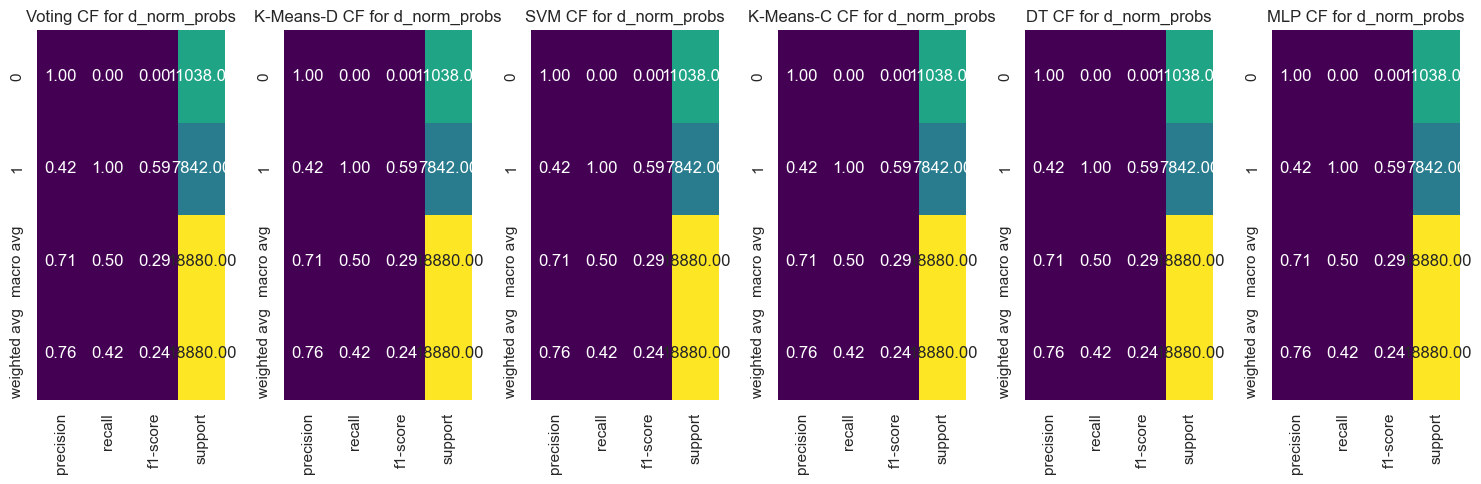

In [806]:
models = ['Voting', 'K-Means-D', 'SVM', 'K-Means-C', 'DT', 'MLP']
classification_reports = [classification_rep_voting_d_norm_probs, classification_rep_kmd_d_norm_probs
                          , classification_rep_svm_d_norm_probs
                          , classification_rep_kmean_d_norm_probs, classification_rep_dt_d_norm_probs
                          , classification_rep_mlp_d_norm_probs]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    
    report = classification_reports[i-1]
    
    if isinstance(report, float):  
        sns.heatmap(pd.DataFrame({'Accuracy': [report]}), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    else:
        if 'accuracy' in report:
            report.pop('accuracy')  
        sns.heatmap(pd.DataFrame.from_dict(report, orient='index'), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    
    plt.title(f'{model} CF for d_norm_probs')

plt.tight_layout()
plt.show()

### E3

In [768]:
classification_rep_kmd_d_norm_pca = classification_report(test_target, kmd_d_norm_pca_preds, output_dict=True)
classification_rep_svm_d_norm_pca = classification_report(test_target, svm_d_norm_pca_preds, output_dict=True)
classification_rep_kmean_d_norm_pca = classification_report(test_target, kmean_d_norm_pca_preds, output_dict=True)
classification_rep_dt_d_norm_pca = classification_report(test_target, dt_d_norm_pca_preds, output_dict=True)
classification_rep_mlp_d_norm_pca = classification_report(test_target, mlp_d_norm_pca_preds, output_dict=True)

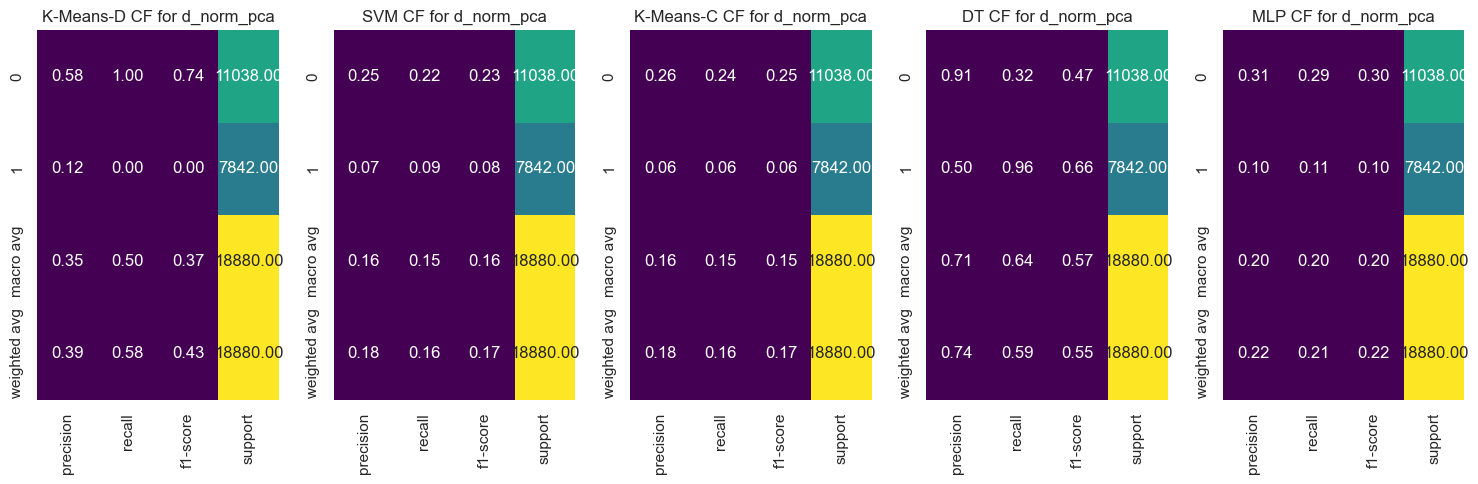

In [769]:
models = [ 'K-Means-D', 'SVM', 'K-Means-C', 'DT', 'MLP']
classification_reports = [classification_rep_kmd_d_norm_pca
                          , classification_rep_svm_d_norm_pca
                          , classification_rep_kmean_d_norm_pca, classification_rep_dt_d_norm_pca
                          , classification_rep_mlp_d_norm_pca]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    
    report = classification_reports[i-1]
    
    if isinstance(report, float):  
        sns.heatmap(pd.DataFrame({'Accuracy': [report]}), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    else:
        if 'accuracy' in report:
            report.pop('accuracy')  
        sns.heatmap(pd.DataFrame.from_dict(report, orient='index'), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    
    plt.title(f'{model} CF for d_norm_pca')

plt.tight_layout()
plt.show()

### E4

In [807]:
classification_rep_voting_d_norm_pca_probs = classification_report(test_target, voting_d_norm_pca_probs_preds, output_dict=True,zero_division=1)
classification_rep_kmd_d_norm_pca_probs = classification_report(test_target, kmd_d_norm_pca_probs_preds, output_dict=True,zero_division=1)
classification_rep_svm_d_norm_pca_probs = classification_report(test_target, svm_d_norm_pca_probs_preds, output_dict=True, zero_division=1)
classification_rep_kmean_d_norm_pca_probs = classification_report(test_target, kmean_d_norm_pca_probs_preds, output_dict=True, zero_division=1)
classification_rep_dt_d_norm_pca_probs = classification_report(test_target, dt_d_norm_pca_probs_preds, output_dict=True, zero_division=1)
classification_rep_mlp_d_norm_pca_probs = classification_report(test_target, mlp_d_norm_pca_probs_preds, output_dict=True, zero_division=1)

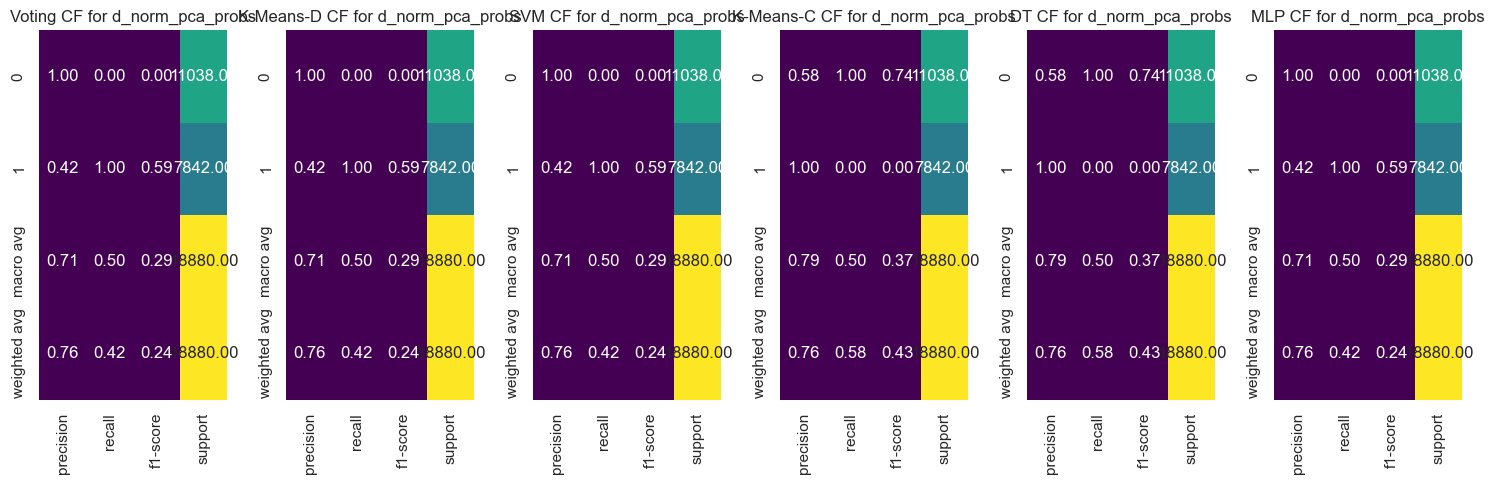

In [808]:
models = ['Voting', 'K-Means-D', 'SVM', 'K-Means-C', 'DT', 'MLP']
classification_reports = [classification_rep_voting_d_norm_pca_probs, classification_rep_kmd_d_norm_pca_probs
                          , classification_rep_svm_d_norm_pca_probs
                          , classification_rep_kmean_d_norm_pca_probs, classification_rep_dt_d_norm_pca_probs
                          , classification_rep_mlp_d_norm_pca_probs]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    
    report = classification_reports[i-1]
    
    if isinstance(report, float):  
        sns.heatmap(pd.DataFrame({'Accuracy': [report]}), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    else:
        if 'accuracy' in report:
            report.pop('accuracy')  
        sns.heatmap(pd.DataFrame.from_dict(report, orient='index'), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    
    plt.title(f'{model} CF for d_norm_pca_probs')

plt.tight_layout()
plt.show()

### E5

In [772]:
classification_rep_kmd_d_raw = classification_report(test_target, kmd_d_raw_preds, output_dict=True)
classification_rep_svm_d_raw = classification_report(test_target, svm_d_raw_preds, output_dict=True)
classification_rep_kmean_d_raw = classification_report(test_target, kmean_d_raw_preds, output_dict=True)
classification_rep_dt_d_raw = classification_report(test_target, dt_d_raw_preds, output_dict=True)
classification_rep_mlp_d_raw = classification_report(test_target, mlp_d_raw_preds, output_dict=True)

In [773]:
models = [ 'K-Means-D', 'SVM', 'K-Means-C', 'DT', 'MLP']
classification_reports = [classification_rep_kmd_d_raw, classification_rep_svm_d_raw
                          , classification_rep_kmean_d_raw
                          , classification_rep_dt_d_raw, classification_rep_mlp_d_raw
                          ]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    
    report = classification_reports[i-1]
    
    if isinstance(report, float):  
        sns.heatmap(pd.DataFrame({'Accuracy': [report]}), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    else:
        if 'accuracy' in report:
            report.pop('accuracy')  
        sns.heatmap(pd.DataFrame.from_dict(report, orient='index'), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    
    plt.title(f'{model} CF for d_raw')

plt.tight_layout()
plt.show()

### E6

In [809]:
classification_rep_voting_d_raw_probs = classification_report(test_target, voting_d_raw_probs_preds, output_dict=True,zero_division=1)
classification_rep_kmd_d_raw_probs = classification_report(test_target, kmd_d_raw_probs_preds, output_dict=True,zero_division=1)
classification_rep_svm_d_raw_probs = classification_report(test_target, svm_d_raw_probs_preds, output_dict=True, zero_division=1)
classification_rep_kmean_d_raw_probs = classification_report(test_target, kmean_d_raw_probs_preds, output_dict=True, zero_division=1)
classification_rep_dt_d_raw_probs = classification_report(test_target, dt_d_raw_probs_preds, output_dict=True, zero_division=1)
classification_rep_mlp_d_raw_probs = classification_report(test_target, mlp_d_raw_probs_preds, output_dict=True, zero_division=1)

In [810]:
models = ['Voting', 'K-Means-D', 'SVM', 'K-Means-C', 'DT', 'MLP']
classification_reports = [classification_rep_voting_d_raw_probs, classification_rep_kmd_d_raw_probs
                          , classification_rep_svm_d_raw_probs
                          , classification_rep_kmean_d_raw_probs, classification_rep_dt_d_raw_probs,
                          classification_rep_mlp_d_raw_probs
                          ]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    
    report = classification_reports[i-1]
    
    if isinstance(report, float):  
        sns.heatmap(pd.DataFrame({'Accuracy': [report]}), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    else:
        if 'accuracy' in report:
            report.pop('accuracy')  
        sns.heatmap(pd.DataFrame.from_dict(report, orient='index'), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    
    plt.title(f'{model} CF for d_raw_probs')

plt.tight_layout()
plt.show()

### E7

In [811]:
classification_rep_kmd_d_raw_pca = classification_report(test_target, kmd_d_raw_pca_preds, output_dict=True, zero_division=1)
classification_rep_svm_d_raw_pca = classification_report(test_target, svm_d_raw_pca_preds, output_dict=True, zero_division=1)
classification_rep_kmean_d_raw_pca = classification_report(test_target, kmean_d_raw_pca_preds, output_dict=True, zero_division=1)
classification_rep_dt_d_raw_pca = classification_report(test_target, dt_d_raw_pca_preds, output_dict=True, zero_division=1)
classification_rep_mlp_d_raw_pca = classification_report(test_target, mlp_d_raw_pca_preds, output_dict=True, zero_division=1)

In [812]:
models = [ 'K-Means-D', 'SVM', 'K-Means-C', 'DT', 'MLP']
classification_reports = [classification_rep_kmd_d_raw_pca, classification_rep_svm_d_raw_pca
                          , classification_rep_kmean_d_raw_pca
                          , classification_rep_dt_d_raw_pca, classification_rep_mlp_d_raw_pca
                          ]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    
    report = classification_reports[i-1]
    
    if isinstance(report, float):  
        sns.heatmap(pd.DataFrame({'Accuracy': [report]}), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    else:
        if 'accuracy' in report:
            report.pop('accuracy')  
        sns.heatmap(pd.DataFrame.from_dict(report, orient='index'), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    
    plt.title(f'{model} CF for d_raw_pca')

plt.tight_layout()
plt.show()

### E8

In [813]:
classification_rep_voting_d_raw_pca_probs = classification_report(test_target, voting_d_raw_pca_probs_preds, output_dict=True, zero_division=1)
classification_rep_kmd_d_raw_pca_probs = classification_report(test_target, kmd_d_raw_pca_probs_preds, output_dict=True, zero_division=1)
classification_rep_svm_d_raw_pca_probs = classification_report(test_target, svm_d_raw_pca_probs_preds, output_dict=True, zero_division=1)
classification_rep_kmean_d_raw_pca_probs = classification_report(test_target, kmean_d_raw_pca_probs_preds, output_dict=True, zero_division=1)
classification_rep_dt_d_raw_pca_probs = classification_report(test_target, dt_d_raw_pca_probs_preds, output_dict=True, zero_division=1)
classification_rep_mlp_d_raw_pca_probs = classification_report(test_target, mlp_d_raw_pca_probs_preds, output_dict=True, zero_division=1)

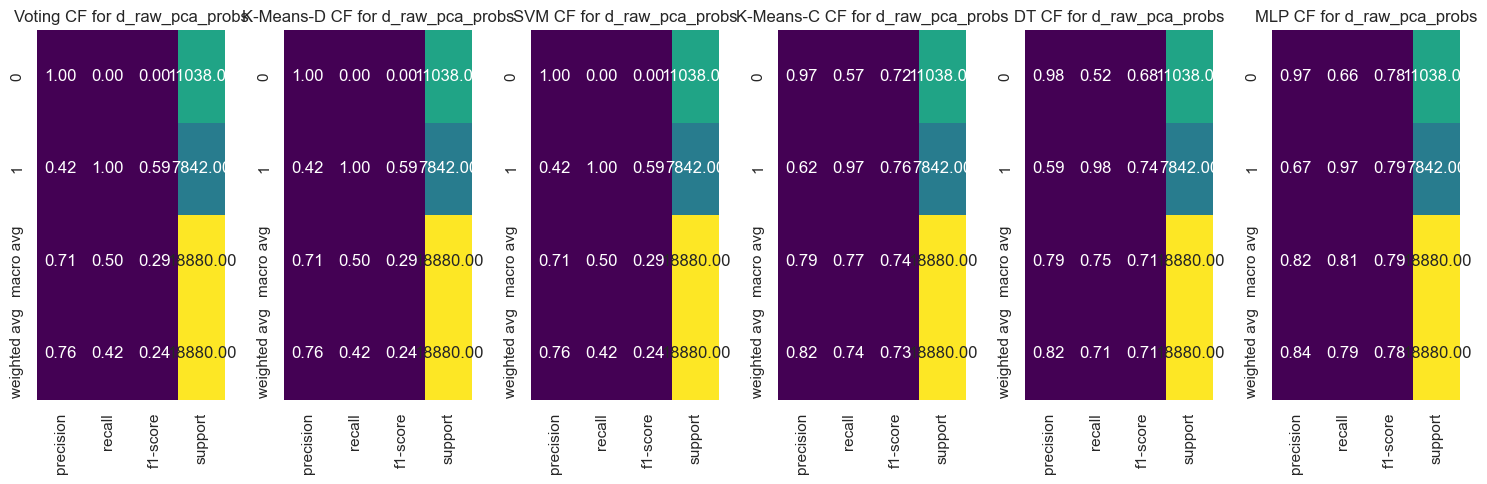

In [814]:
models = ['Voting', 'K-Means-D', 'SVM', 'K-Means-C', 'DT', 'MLP']
classification_reports = [classification_rep_voting_d_raw_pca_probs, classification_rep_kmd_d_raw_pca_probs
                          , classification_rep_svm_d_raw_pca_probs
                          , classification_rep_kmean_d_raw_pca_probs, classification_rep_dt_d_raw_pca_probs,
                          classification_rep_mlp_d_raw_pca_probs
                          ]

plt.figure(figsize=(15, 5))

for i, model in enumerate(models, 1):
    plt.subplot(1, len(models), i)
    
    report = classification_reports[i-1]
    
    if isinstance(report, float):  
        sns.heatmap(pd.DataFrame({'Accuracy': [report]}), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    else:
        if 'accuracy' in report:
            report.pop('accuracy')  
        sns.heatmap(pd.DataFrame.from_dict(report, orient='index'), annot=True, cmap='viridis', fmt='.2f', cbar=False)
    
    plt.title(f'{model} CF for d_raw_pca_probs')

plt.tight_layout()
plt.show()

<a id="1"></a>  
### <p style="padding:5px;background-color:#404B69;margin:0;color:#DBDBDB;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 5px 5px;overflow:hidden;font-weight:200">Model Comparison</p>

### E1

In [780]:
roc_auc_kmd_d_norm = roc_auc_score(test_target, kmd_d_norm_preds)
roc_auc_svm_d_norm = roc_auc_score(test_target, svm_d_norm_preds)
roc_auc_kmean_d_norm = roc_auc_score(test_target, kmean_d_norm_preds)
roc_auc_dt_d_norm = roc_auc_score(test_target, dt_d_norm_preds)
roc_auc_mlp_d_norm = roc_auc_score(test_target, mlp_d_norm_preds)

In [784]:
roc_auc_scores = [roc_auc_kmd_d_norm, roc_auc_svm_d_norm, roc_auc_kmean_d_norm, roc_auc_dt_d_norm, roc_auc_mlp_d_norm]

model_data = {'Model': ['K-Means-D','SVM','K-Means-C','DT','MLP'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('d_norm Model Comparison: Area under ROC Curve', fontsize=14)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### E2

In [782]:
roc_auc_voting_d_norm_probs = roc_auc_score(test_target, voting_d_norm_probs_preds)
roc_auc_kmd_d_norm_probs = roc_auc_score(test_target, kmd_d_norm_probs_preds)
roc_auc_svm_d_norm_probs = roc_auc_score(test_target, svm_d_norm_probs_preds)
roc_auc_kmean_d_norm_probs = roc_auc_score(test_target, kmean_d_norm_probs_preds)
roc_auc_dt_d_norm_probs = roc_auc_score(test_target, dt_d_norm_probs_preds)
roc_auc_mlp_d_norm_probs = roc_auc_score(test_target, mlp_d_norm_probs_preds)

In [783]:
roc_auc_scores = [roc_auc_voting_d_norm_probs, roc_auc_kmd_d_norm_probs, roc_auc_svm_d_norm_probs, roc_auc_kmean_d_norm_probs, 
                  roc_auc_dt_d_norm_probs, roc_auc_mlp_d_norm_probs]

model_data = {'Model': ['Voting','K-Means-D','SVM','K-Means-C','DT','MLP'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('d_norm_probs Model Comparison: Area under ROC Curve', fontsize=14)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### E3

In [785]:
roc_auc_kmd_d_norm_pca = roc_auc_score(test_target, kmd_d_norm_pca_preds)
roc_auc_svm_d_norm_pca = roc_auc_score(test_target, svm_d_norm_pca_preds)
roc_auc_kmean_d_norm_pca = roc_auc_score(test_target, kmean_d_norm_pca_preds)
roc_auc_dt_d_norm_pca = roc_auc_score(test_target, dt_d_norm_pca_preds)
roc_auc_mlp_d_norm_pca = roc_auc_score(test_target, mlp_d_norm_pca_preds)

In [786]:
roc_auc_scores = [ roc_auc_kmd_d_norm_pca, roc_auc_svm_d_norm_pca, roc_auc_kmean_d_norm_pca, 
                  roc_auc_dt_d_norm_pca, roc_auc_mlp_d_norm_pca]

model_data = {'Model': ['K-Means-D','SVM','K-Means-C','DT','MLP'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('d_norm_pca Model Comparison: Area under ROC Curve', fontsize=14)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### E4

In [787]:
roc_auc_voting_d_norm_pca_probs = roc_auc_score(test_target, voting_d_norm_pca_probs_preds)
roc_auc_kmd_d_norm_pca_probs = roc_auc_score(test_target, kmd_d_norm_pca_probs_preds)
roc_auc_svm_d_norm_pca_probs = roc_auc_score(test_target, svm_d_norm_pca_probs_preds)
roc_auc_kmean_d_norm_pca_probs = roc_auc_score(test_target, kmean_d_norm_pca_probs_preds)
roc_auc_dt_d_norm_pca_probs = roc_auc_score(test_target, dt_d_norm_pca_probs_preds)
roc_auc_mlp_d_norm_pca_probs = roc_auc_score(test_target, mlp_d_norm_pca_probs_preds)

In [788]:
roc_auc_scores = [ roc_auc_voting_d_norm_pca_probs, roc_auc_kmd_d_norm_pca_probs, roc_auc_svm_d_norm_pca_probs,
                  roc_auc_kmean_d_norm_pca_probs, roc_auc_dt_d_norm_pca_probs, roc_auc_mlp_d_norm_pca_probs]

model_data = {'Model': ['Voting','K-Means-D','SVM','K-Means-C','DT','MLP'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('d_norm_pca_probs Model Comparison: Area under ROC Curve', fontsize=14)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### E5

In [789]:
roc_auc_kmd_d_raw = roc_auc_score(test_target, kmd_d_raw_preds)
roc_auc_svm_d_raw = roc_auc_score(test_target, svm_d_raw_preds)
roc_auc_kmean_d_raw = roc_auc_score(test_target, kmean_d_raw_preds)
roc_auc_dt_d_raw = roc_auc_score(test_target, dt_d_raw_preds)
roc_auc_mlp_d_raw = roc_auc_score(test_target, mlp_d_raw_preds)

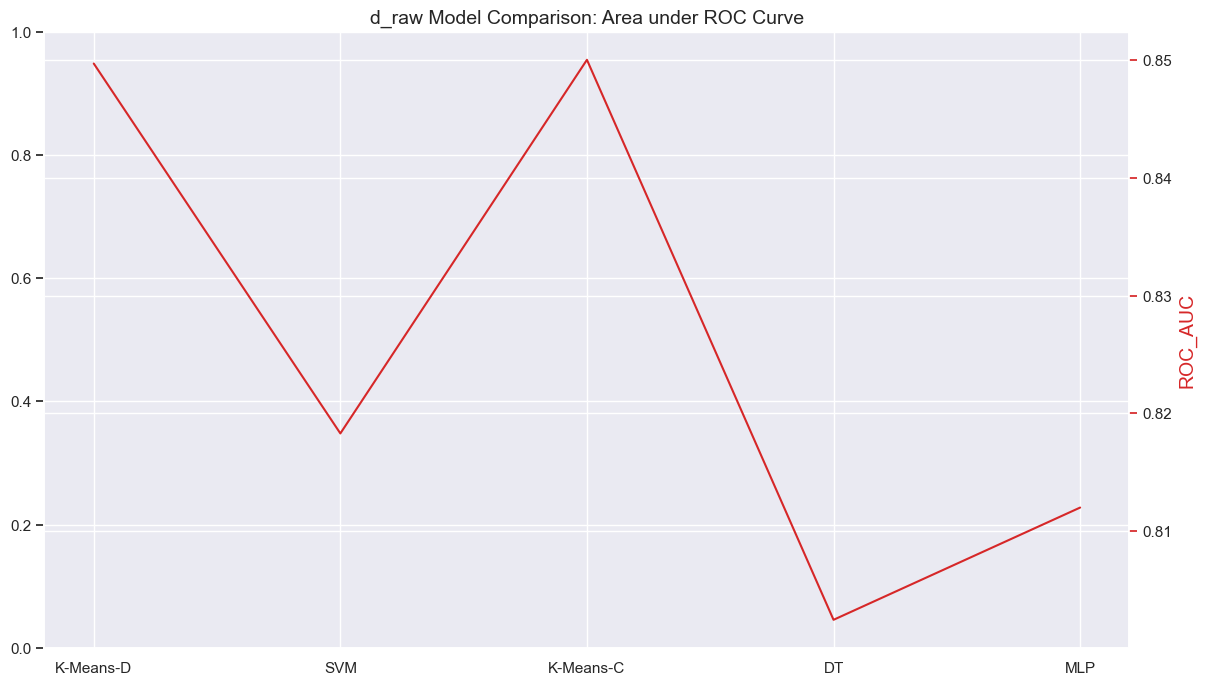

In [790]:
roc_auc_scores = [roc_auc_kmd_d_raw, roc_auc_svm_d_raw, roc_auc_kmean_d_raw, roc_auc_dt_d_raw, roc_auc_mlp_d_raw]

model_data = {'Model': ['K-Means-D','SVM','K-Means-C','DT','MLP'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('d_raw Model Comparison: Area under ROC Curve', fontsize=14)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### E6

In [791]:
roc_auc_voting_d_raw_probs = roc_auc_score(test_target, voting_d_raw_probs_preds)
roc_auc_kmd_d_raw_probs = roc_auc_score(test_target, kmd_d_raw_probs_preds)
roc_auc_svm_d_raw_probs = roc_auc_score(test_target, svm_d_raw_probs_preds)
roc_auc_kmean_d_raw_probs = roc_auc_score(test_target, kmean_d_raw_probs_preds)
roc_auc_dt_d_raw_probs = roc_auc_score(test_target, dt_d_raw_probs_preds)
roc_auc_mlp_d_raw_probs = roc_auc_score(test_target, mlp_d_raw_probs_preds)

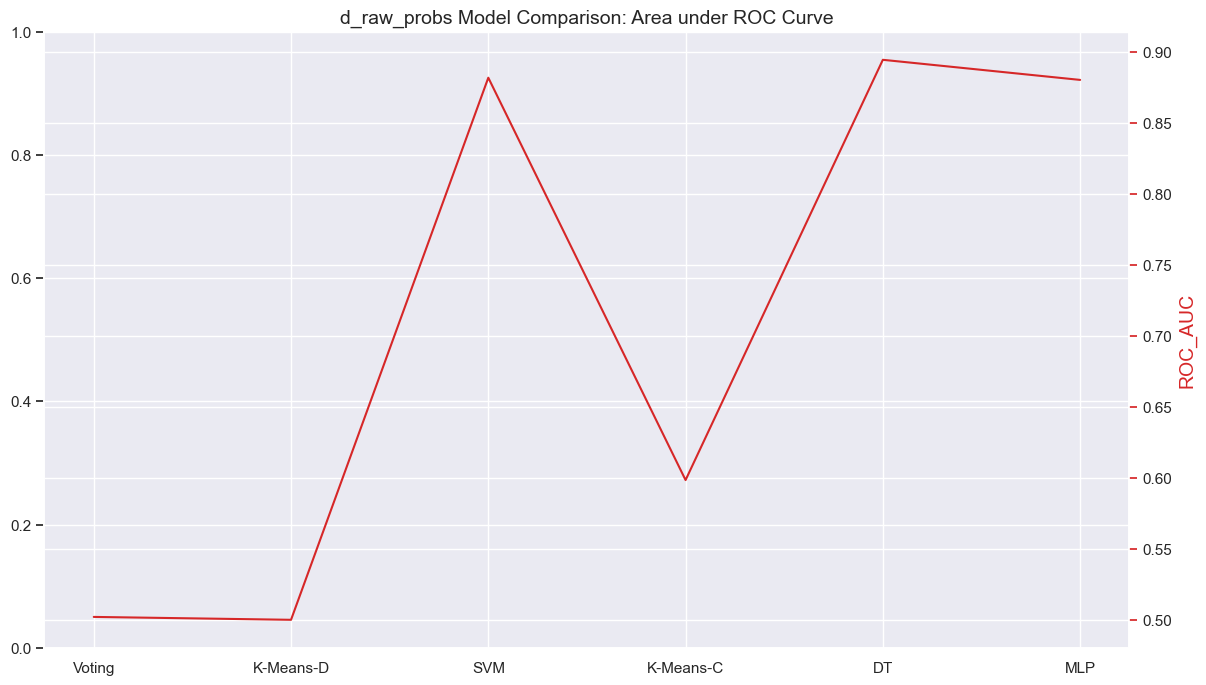

In [792]:
roc_auc_scores = [roc_auc_voting_d_raw_probs, roc_auc_kmd_d_raw_probs, roc_auc_svm_d_raw_probs, roc_auc_kmean_d_raw_probs,
                  roc_auc_dt_d_raw_probs, roc_auc_mlp_d_raw_probs]

model_data = {'Model': ['Voting','K-Means-D','SVM','K-Means-C','DT','MLP'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('d_raw_probs Model Comparison: Area under ROC Curve', fontsize=14)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### E7

In [793]:
roc_auc_kmd_d_raw_pca = roc_auc_score(test_target, kmd_d_raw_pca_preds)
roc_auc_svm_d_raw_pca = roc_auc_score(test_target, svm_d_raw_pca_preds)
roc_auc_kmean_d_raw_pca = roc_auc_score(test_target, kmean_d_raw_pca_preds)
roc_auc_dt_d_raw_pca = roc_auc_score(test_target, dt_d_raw_pca_preds)
roc_auc_mlp_d_raw_pca = roc_auc_score(test_target, mlp_d_raw_pca_preds)

In [794]:
roc_auc_scores = [roc_auc_kmd_d_raw_pca, roc_auc_svm_d_raw_pca, roc_auc_kmean_d_raw_pca, roc_auc_dt_d_raw_pca,
                  roc_auc_mlp_d_raw_pca]

model_data = {'Model': ['K-Means-D','SVM','K-Means-C','DT','MLP'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('d_raw_pca Model Comparison: Area under ROC Curve', fontsize=14)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

### E8

In [795]:
roc_auc_voting_d_raw_pca_probs = roc_auc_score(test_target, voting_d_raw_pca_probs_preds)
roc_auc_kmd_d_raw_pca_probs = roc_auc_score(test_target, kmd_d_raw_pca_probs_preds)
roc_auc_svm_d_raw_pca_probs = roc_auc_score(test_target, svm_d_raw_pca_probs_preds)
roc_auc_kmean_d_raw_pca_probs = roc_auc_score(test_target, kmean_d_raw_pca_probs_preds)
roc_auc_dt_d_raw_pca_probs = roc_auc_score(test_target, dt_d_raw_pca_probs_preds)
roc_auc_mlp_d_raw_pca_probs = roc_auc_score(test_target, mlp_d_raw_pca_probs_preds)

In [796]:
roc_auc_scores = [roc_auc_voting_d_raw_pca_probs, roc_auc_kmd_d_raw_pca_probs, roc_auc_svm_d_raw_pca_probs, 
                  roc_auc_kmean_d_raw_pca_probs, roc_auc_dt_d_raw_pca_probs, roc_auc_mlp_d_raw_pca_probs]

model_data = {'Model': ['Voting','K-Means-D','SVM','K-Means-C','DT','MLP'],
              'ROC_AUC': roc_auc_scores}
data = pd.DataFrame(model_data)
fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('d_raw_pca_probs Model Comparison: Area under ROC Curve', fontsize=14)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('ROC_AUC', fontsize=14, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)